In [253]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import PercentFormatter
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

## Getting the data

Reading data with sentiment analysis

In [188]:
gw_sent=pd.read_csv('data/sentiment_analysis/global_warming_sent.csv',index_col='Unnamed: 0')
ab_sent=pd.read_csv('data/sentiment_analysis/abortion_sent.csv',index_col='Unnamed: 0')
gi_sent=pd.read_csv('data/sentiment_analysis/gender_inequality_sent.csv',index_col='Unnamed: 0')
gc_sent=pd.read_csv('data/sentiment_analysis/gun_control_sent.csv',index_col='Unnamed: 0')

In [145]:
# Adding year column
gw_sent['year']=gw_sent['date'].apply(lambda x: x.split('-')[0])
ab_sent['year']=ab_sent['date'].apply(lambda x: x.split('-')[0])
gi_sent['year']=gi_sent['date'].apply(lambda x: x.split('-')[0])
gc_sent['year']=gc_sent['date'].apply(lambda x: x.split('-')[0])

# Adding month column
gw_sent['month']=gw_sent['date'].apply(lambda x: x.split('-')[1])
ab_sent['month']=ab_sent['date'].apply(lambda x: x.split('-')[1])
gi_sent['month']=gi_sent['date'].apply(lambda x: x.split('-')[1])
gc_sent['month']=gc_sent['date'].apply(lambda x: x.split('-')[1])

# Adding year-month column
str1 = ""
gw_sent['year-month']=gw_sent['date'].apply(lambda x: str1.join(x.split('-')[0:2]))
str1 = ""
ab_sent['year-month']=ab_sent['date'].apply(lambda x: str1.join(x.split('-')[0:2]))
str1 = ""
gi_sent['year-month']=gi_sent['date'].apply(lambda x: str1.join(x.split('-')[0:2]))
str1 = ""
gc_sent['year-month']=gc_sent['date'].apply(lambda x: str1.join(x.split('-')[0:2]))

Reading data with speakers attributes

In [189]:
gw=pd.read_csv('data/attributes/global_warming.csv',index_col='Unnamed: 0')
ab=pd.read_csv('data/attributes/abortion.csv',index_col='Unnamed: 0')
gi=pd.read_csv('data/attributes/gender_inequality.csv',index_col='Unnamed: 0')
gc=pd.read_csv('data/attributes/gun_control.csv',index_col='Unnamed: 0')

## Analysis over the data

### Global warming

In [83]:
gw_sent.head()

,quoteID,quotation,speaker,qids,date,probas,positive scores,negative scores,compound scores,year,month,year-month
Unnamed: 0,,,,,,,,,,,,
321,2018-08-09-003074,After growing up in a log cabin in the Mission...,Landon Gardner,['Q11752789'],2018-08-09 20:50:00,"[['Landon Gardner', '0.7438'], ['None', '0.256...",0.158,0.0,0.7650,2018,08,201808
828,2018-10-18-010126,As the UK heads towards an important new chapt...,Stewart Wingate,['Q23463543'],2018-10-18 16:34:49,"[['Stewart Wingate', '0.9579'], ['None', '0.04...",0.096,0.0,0.1901,2018,10,201810
936,2018-11-30-010680,Basically since widespread catchment deforesta...,None,[],2018-11-30 16:00:00,"[['None', '0.9151'], ['Dave Allen', '0.0849']]",0.000,0.0,0.0000,2018,11,201811
1248,2018-05-22-013756,But there's still reason for optimism: We are ...,Michael Kelly,"['Q1385380', 'Q20811110', 'Q21458877', 'Q28824...",2018-05-22 11:00:00,"[['Michael Kelly', '0.9554'], ['None', '0.0446']]",0.150,0.0,0.6956,2018,05,201805
1395,2018-09-15-007731,Challenges to Both Left and Right in U.S. on G...,Andrew Revkin,['Q4758379'],2018-09-15 04:00:00,"[['Andrew Revkin', '0.8461'], ['None', '0.1539']]",0.244,0.0,0.2263,2018,09,201809


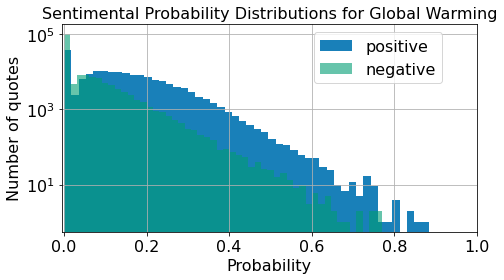

In [84]:
# Plotting Positive and Negative Probability Distributions

mpl.style.use('seaborn-colorblind')

fig = plt.figure(figsize=(7,4))

ax = fig.add_subplot(1, 1, 1)

plt.hist(gw_sent['positive scores'],label='positive', bins = 50, alpha=0.9)
plt.hist(gw_sent['negative scores'],label='negative', bins = 50, alpha=0.6)
plt.xlabel('Probability',fontsize = 16)
plt.ylabel('Number of quotes',fontsize = 16)
plt.xlim([-0.005,1])
plt.title('Sentimental Probability Distributions for Global Warming', fontsize = 16)
plt.grid()
ax.set_yscale('log')

# this controls where you put the legend with bbox_to_anchor
plt.figlegend(ncol = 1,loc = 1, fontsize = 16, bbox_to_anchor=(0.4, 0.4, 0.5, 0.5))

# this controls the grid labels size
plt.tick_params(axis='both', which='major', labelsize=16)

# this makes the plot tight
plt.tight_layout()


None

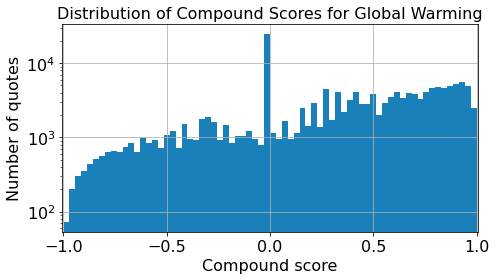

In [85]:
# Plotting the Compound Scores

fig = plt.figure(figsize=(7,4))

ax = fig.add_subplot(1, 1, 1)

plt.hist(gw_sent['compound scores'], bins = 70, alpha=0.9)
plt.xlabel('Compound score',fontsize = 16)
plt.ylabel('Number of quotes',fontsize = 16)
plt.xlim([-1.005,1.005])
plt.title('Distribution of Compound Scores for Global Warming', fontsize = 16)
plt.grid()
ax.set_yscale('log')

# this controls the grid labels size
plt.tick_params(axis='both', which='major', labelsize=16)

# this makes the plot tight
plt.tight_layout()

None

In [894]:
# splitting quotes into three categoreis: positive, negative, neutral
positive_gw=gw_sent[gw_sent['compound scores']>=0.05]
negative_gw=gw_sent[gw_sent['compound scores']<=-0.05]
neutral_gw=gw_sent[np.abs(gw_sent['compound scores']) < 0.05]

In [87]:
neutral_gw.describe()

,positive scores,negative scores,compound scores
count,26380.000000,26380.000000,26380.000000
mean,0.010279,0.009411,0.000332
std,0.033114,0.031387,0.008413
min,0.000000,0.000000,-0.049800
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,0.388000,0.324000,0.049800


In [88]:
positive_gw.describe()

,positive scores,negative scores,compound scores
count,110164.000000,110164.000000,110164.000000
mean,0.185977,0.018335,0.601341
std,0.095838,0.034598,0.258020
min,0.014000,0.000000,0.050000
25%,0.114000,0.000000,0.381800
50%,0.171000,0.000000,0.636900
75%,0.241000,0.029000,0.831600
max,0.884000,0.343000,0.998800


In [89]:
negative_gw.describe()

,positive scores,negative scores,compound scores
count,29821.000000,29821.000000,29821.000000
mean,0.042987,0.146590,-0.423574
std,0.050780,0.081922,0.236398
min,0.000000,0.012000,-0.998500
25%,0.000000,0.088000,-0.599400
50%,0.031000,0.129000,-0.381800
75%,0.075000,0.185000,-0.249800
max,0.419000,0.770000,-0.050000


In [90]:
# print total number of positive, negative and neutral quotes
print('Number of quotes with a positive sentiment: {0} ({1} %)'.format(positive_gw.shape[0],round(positive_gw.shape[0]*100/gw_sent.shape[0],2)))
print('Number of quotes with a negative sentiment: {0} ({1} %)'.format(negative_gw.shape[0],round(negative_gw.shape[0]*100/gw_sent.shape[0],2)))
print('Number of quotes with a neutral sentiment: {0} ({1} %)'.format(neutral_gw.shape[0], round(neutral_gw.shape[0]*100/gw_sent.shape[0],2)))

Number of quotes with a positive sentiment: 110164 (66.22 %)
Number of quotes with a negative sentiment: 29821 (17.93 %)
Number of quotes with a neutral sentiment: 26380 (15.86 %)


In [91]:
# Exracting an example
neutral_gw.iloc[4]['quotation']

'Temperatures go up every year, so we got to try and mitigate that,'

### Abortion


In [92]:
ab_sent.head()

,quoteID,quotation,speaker,qids,date,probas,positive scores,negative scores,compound scores,year,month,year-month
Unnamed: 0,,,,,,,,,,,,
1400011,2015-12-09-139783,"will push for energy development, beefed-up la...",Victor Davis Hanson,['Q1276395'],2015-12-09 06:33:51,"[['Victor Davis Hanson', '0.7887'], ['None', '...",0.064,0.104,-0.5719,2015,12,201512
1401214,2015-09-04-095700,"The revered Mother Teresa, who works in the st...",None,[],2015-09-04 21:09:20,"[['None', '0.8472'], ['Al Gore', '0.0952'], ['...",0.169,0.065,0.8350,2015,09,201509
1404392,2015-05-13-068629,We got done and she was standing on her head i...,Dennis Rodman,['Q201608'],2015-05-13 16:50:41,"[['Dennis Rodman', '0.6836'], ['Carmen Electra...",0.124,0.000,0.6249,2015,05,201505
1406420,2015-01-09-091216,while African Americans make up just 13 percen...,None,[],2015-01-09 23:38:13,"[['None', '0.9263'], ['Alveda King', '0.0737']]",0.000,0.000,0.0000,2015,01,201501
1409432,2015-09-23-016630,Conservatives worry about the way he seems to ...,Robert Royal,"['Q7349412', 'Q7349413']",2015-09-23 16:35:22,"[['Robert Royal', '0.8235'], ['None', '0.1318'...",0.092,0.249,-0.6486,2015,09,201509


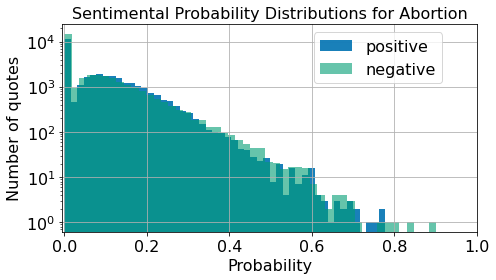

In [93]:
# Plotting Positive and Negative Probability Distributions
fig = plt.figure(figsize=(7,4))

ax = fig.add_subplot(1, 1, 1)

plt.hist(ab_sent['positive scores'],label='positive', bins = 50, alpha=0.9)
plt.hist(ab_sent['negative scores'],label='negative', bins = 50, alpha=0.6)
plt.xlabel('Probability',fontsize = 16)
plt.ylabel('Number of quotes',fontsize = 16)
plt.xlim([-0.005,1])
plt.title('Sentimental Probability Distributions for Abortion', fontsize = 16)
plt.grid()
ax.set_yscale('log')

# this controls where you put the legend with bbox_to_anchor
plt.figlegend(ncol = 1,loc = 1, fontsize = 16, bbox_to_anchor=(0.4, 0.4, 0.5, 0.5))

# this controls the grid labels size
plt.tick_params(axis='both', which='major', labelsize=16)

# this makes the plot tight
plt.tight_layout()


None

In [ ]:
# Plotting the Compound Scores

fig = plt.figure(figsize=(7,4))

ax = fig.add_subplot(1, 1, 1)

plt.hist(ab_sent['compound scores'], bins = 70, alpha=0.9)
plt.xlabel('Compound score',fontsize = 16)
plt.ylabel('Number of quotes',fontsize = 16)
plt.xlim([-1.005,1.005])
plt.title('Distribution of Compound Scores for Abortion', fontsize = 16)
plt.grid()
ax.set_yscale('log')

# this controls the grid labels size
plt.tick_params(axis='both', which='major', labelsize=16)

# this makes the plot tight
plt.tight_layout()

None

In [ ]:
# splitting quotes into three categoreis: positive, negative, neutral
positive_ab=ab_sent[ab_sent['compound scores']>=0.05]
negative_ab=ab_sent[ab_sent['compound scores']<=-0.05]
neutral_ab=ab_sent[np.abs(ab_sent['compound scores'])< 0.05]

In [309]:
neutral_ab.describe()

,positive scores,negative scores,compound scores
count,6801.000000,6801.000000,6801.000000
mean,0.010469,0.009852,0.000155
std,0.035739,0.034280,0.008437
min,0.000000,0.000000,-0.049800
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,0.358000,0.344000,0.049800


In [310]:
positive_ab.describe()

,positive scores,negative scores,compound scores
count,14568.000000,14568.000000,14568.000000
mean,0.169490,0.031016,0.519866
std,0.091705,0.045643,0.249167
min,0.013000,0.000000,0.050000
25%,0.103750,0.000000,0.328375
50%,0.153000,0.000000,0.510600
75%,0.216000,0.058000,0.726900
max,0.778000,0.413000,0.996900


In [311]:
negative_ab.describe()

,positive scores,negative scores,compound scores
count,10997.000000,10997.000000,10997.000000
mean,0.041669,0.178907,-0.507684
std,0.052215,0.100372,0.251306
min,0.000000,0.012000,-0.998700
25%,0.000000,0.107000,-0.718400
50%,0.000000,0.158000,-0.497600
75%,0.075000,0.227000,-0.296000
max,0.338000,0.902000,-0.050700


In [312]:
# print total number of positive, negative and neutral quotes
print('Number of quotes with a positive sentiment: {0} ({1} %)'.format(positive_ab.shape[0],round(positive_ab.shape[0]*100/ab_sent.shape[0],2)))
print('Number of quotes with a negative sentiment: {0} ({1} %)'.format(negative_ab.shape[0],round(negative_ab.shape[0]*100/ab_sent.shape[0],2)))
print('Number of quotes with a neutral sentiment: {0} ({1} %)'.format(neutral_ab.shape[0], round(neutral_ab.shape[0]*100/ab_sent.shape[0],2)))

Number of quotes with a positive sentiment: 14568 (45.01 %)
Number of quotes with a negative sentiment: 10997 (33.98 %)
Number of quotes with a neutral sentiment: 6801 (21.01 %)


### Gender Inequality

In [313]:
gi_sent.head()

,quoteID,quotation,speaker,qids,date,probas,positive scores,negative scores,compound scores,year,month,year-month
Unnamed: 0,,,,,,,,,,,,
3900322,2019-08-12-051728,Not only winning the World Cup with her amazin...,Taylor Swift,['Q26876'],2019-08-12 12:55:41,"[['Taylor Swift', '0.9038'], ['None', '0.0799'...",0.177,0.088,0.6717,2019,08,201908
3900920,2019-01-23-074654,"Our main mission is to breach the gender gap,",None,[],2019-01-23 05:46:04,"[['None', '0.9186'], ['Chang Liu', '0.0814']]",0.000,0.000,0.0000,2019,01,201901
3902699,2019-12-19-020869,"Growing up in Pakistan, I was a feminist befor...",Ziauddin Yousafzai,['Q8071389'],2019-12-19 17:03:35,"[['Ziauddin Yousafzai', '0.7561'], ['None', '0...",0.149,0.070,0.2144,2019,12,201912
3904083,2019-03-28-032705,"I didn't think I was breaking a trade secret, ...",Piers Morgan,['Q557758'],2019-03-28 04:09:36,"[['Piers Morgan', '0.8436'], ['None', '0.1361'...",0.000,0.000,0.0000,2019,03,201903
3904546,2019-01-25-095509,"The thing about misogyny is everyone does it,",None,[],2019-01-25 21:18:53,"[['None', '0.8255'], ['Karen Carpenter', '0.11...",0.000,0.000,0.0000,2019,01,201901


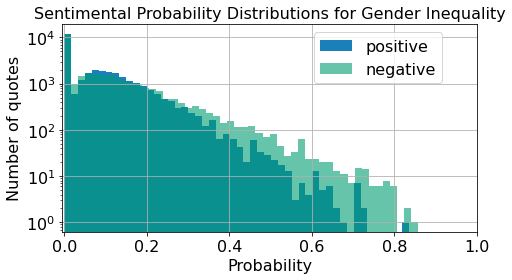

In [314]:
# Plotting Positive and Negative Probability Distributions

fig = plt.figure(figsize=(7,4))

ax = fig.add_subplot(1, 1, 1)

plt.hist(gi_sent['positive scores'],label='positive', bins = 50, alpha=0.9)
plt.hist(gi_sent['negative scores'],label='negative', bins = 50, alpha=0.6)
plt.xlabel('Probability',fontsize = 16)
plt.ylabel('Number of quotes',fontsize = 16)
plt.xlim([-0.005,1])
plt.title('Sentimental Probability Distributions for Gender Inequality', fontsize = 16)
plt.grid()
ax.set_yscale('log')

# this controls where you put the legend with bbox_to_anchor
plt.figlegend(ncol = 1,loc = 1, fontsize = 16, bbox_to_anchor=(0.4, 0.4, 0.5, 0.5))

# this controls the grid labels size
plt.tick_params(axis='both', which='major', labelsize=16)

# this makes the plot tight
plt.tight_layout()


None

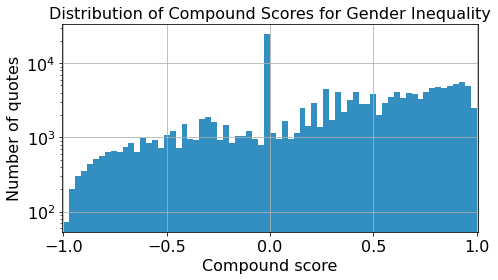

In [315]:
# Plotting the Compound Scores

fig = plt.figure(figsize=(7,4))

ax = fig.add_subplot(1, 1, 1)

plt.hist(gw_sent['compound scores'], bins = 70, alpha=0.8)
plt.xlabel('Compound score',fontsize = 16)
plt.ylabel('Number of quotes',fontsize = 16)
plt.xlim([-1.005,1.005])
plt.title('Distribution of Compound Scores for Gender Inequality', fontsize = 16)
plt.grid()
ax.set_yscale('log')

# this controls the grid labels size
plt.tick_params(axis='both', which='major', labelsize=16)

# this makes the plot tight
plt.tight_layout()

None

In [194]:
# splitting quotes into three categoreis: positive, negative, neutral
positive_gi=gi_sent[gi_sent['compound scores']>=0.05]
negative_gi=gi_sent[gi_sent['compound scores']<=-0.05]
neutral_gi=gi_sent[np.abs(gi_sent['compound scores'])< 0.05]

In [317]:
neutral_gi.describe()

,positive scores,negative scores,compound scores
count,5866.000000,5866.000000,5866.000000
mean,0.011061,0.010896,-0.000063
std,0.037339,0.036486,0.008252
min,0.000000,0.000000,-0.049800
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,0.321000,0.347000,0.049800


In [318]:
positive_gi.describe()

,positive scores,negative scores,compound scores
count,12594.000000,12594.000000,12594.000000
mean,0.172278,0.035152,0.539809
std,0.095089,0.047189,0.257657
min,0.018000,0.000000,0.050000
25%,0.104000,0.000000,0.340000
50%,0.153000,0.000000,0.540950
75%,0.219000,0.062000,0.764400
max,0.835000,0.360000,0.997700


In [319]:
negative_gi.describe()

,positive scores,negative scores,compound scores
count,12805.000000,12805.000000,12805.000000
mean,0.042013,0.208127,-0.545223
std,0.053827,0.123236,0.262920
min,0.000000,0.017000,-0.997600
25%,0.000000,0.120000,-0.771300
50%,0.000000,0.180000,-0.571900
75%,0.077000,0.264000,-0.339200
max,0.412000,0.858000,-0.050200


In [320]:
# print total number of positive, negative and neutral quotes
print('Number of quotes with a positive sentiment: {0} ({1} %)'.format(positive_gi.shape[0],round(positive_gi.shape[0]*100/gi_sent.shape[0],2)))
print('Number of quotes with a negative sentiment: {0} ({1} %)'.format(negative_gi.shape[0],round(negative_gi.shape[0]*100/gi_sent.shape[0],2)))
print('Number of quotes with a neutral sentiment: {0} ({1} %)'.format(neutral_gi.shape[0], round(neutral_gi.shape[0]*100/gi_sent.shape[0],2)))

Number of quotes with a positive sentiment: 12594 (40.28 %)
Number of quotes with a negative sentiment: 12805 (40.96 %)
Number of quotes with a neutral sentiment: 5866 (18.76 %)


### Gun Control

In [96]:
gc_sent.head()

,quoteID,quotation,speaker,qids,date,probas,positive scores,negative scores,compound scores,year,month,year-month
Unnamed: 0,,,,,,,,,,,,
408,2015-12-15-002818,a vitriolic attack on the twin pillars of Amer...,None,[],2015-12-15 07:34:41,"[['None', '0.5739'], ['Dana Loesch', '0.4261']]",0.188,0.277,-0.2500,2015,12,201512
3089,2015-02-20-038705,I'm in favor of students who have their concea...,Cary Smith,"['Q5047652', 'Q5047654']",2015-02-20 00:51:00,"[['Cary Smith', '0.7423'], ['None', '0.1626'],...",0.192,0.000,0.6124,2015,02,201502
7977,2015-09-19-042453,"scary sounding phrases like `assault weapons,'...",Donald Trump,"['Q22686', 'Q27947481']",2015-09-19 05:27:02,"[['Donald Trump', '0.7814'], ['None', '0.2186']]",0.095,0.561,-0.9042,2015,09,201509
8264,2015-10-13-054087,"It is a constitutionally-protected right, like...",Wendy Davis,"['Q3539529', 'Q47358063', 'Q59160484', 'Q79826...",2015-10-13 23:31:37,"[['Wendy Davis', '0.7397'], ['None', '0.2302']...",0.098,0.000,0.3612,2015,10,201510
11789,2015-04-19-040043,"This country, and especially the State of Texa...",None,[],2015-04-19 16:50:49,"[['None', '0.6643'], ['President Obama', '0.26...",0.117,0.161,-0.4449,2015,04,201504


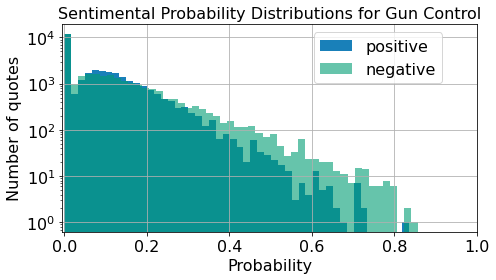

In [97]:
# Plotting Positive and Negative Probability Distributions

fig = plt.figure(figsize=(7,4))

ax = fig.add_subplot(1, 1, 1)

plt.hist(gi_sent['positive scores'],label='positive', bins = 50, alpha=0.9)
plt.hist(gi_sent['negative scores'],label='negative', bins = 50, alpha=0.6)
plt.xlabel('Probability',fontsize = 16)
plt.ylabel('Number of quotes',fontsize = 16)
plt.xlim([-0.005,1])
plt.title('Sentimental Probability Distributions for Gun Control', fontsize = 16)
plt.grid()
ax.set_yscale('log')

# this controls where you put the legend with bbox_to_anchor
plt.figlegend(ncol = 1,loc = 1, fontsize = 16, bbox_to_anchor=(0.4, 0.4, 0.5, 0.5))

# this controls the grid labels size
plt.tick_params(axis='both', which='major', labelsize=16)

# this makes the plot tight
plt.tight_layout()


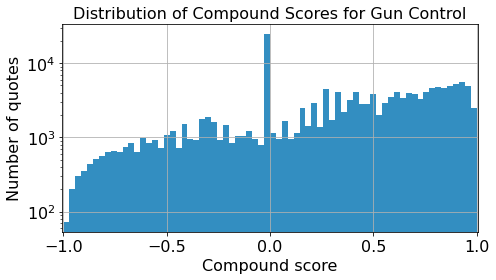

In [98]:
# Plotting the Compound Scores

fig = plt.figure(figsize=(7,4))

ax = fig.add_subplot(1, 1, 1)

plt.hist(gw_sent['compound scores'], bins = 70, alpha=0.8)
plt.xlabel('Compound score',fontsize = 16)
plt.ylabel('Number of quotes',fontsize = 16)
plt.xlim([-1.005,1.005])
plt.title('Distribution of Compound Scores for Gun Control', fontsize = 16)
plt.grid()
ax.set_yscale('log')

# this controls the grid labels size
plt.tick_params(axis='both', which='major', labelsize=16)

# this makes the plot tight
plt.tight_layout()

None

In [99]:
# splitting quotes into three categoreis: positive, negative, neutral
positive_gc=gc_sent[gc_sent['compound scores']>=0.05]
negative_gc=gc_sent[gc_sent['compound scores']<=-0.05]
neutral_gc=gc_sent[np.abs(gc_sent['compound scores'])< 0.05]

In [100]:
neutral_gc.describe()

,positive scores,negative scores,compound scores
count,1819.000000,1819.000000,1819.000000
mean,0.032789,0.032465,0.000151
std,0.062027,0.061559,0.013459
min,0.000000,0.000000,-0.049800
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.049500,0.048500,0.000000
max,0.321000,0.312000,0.049800


In [101]:
positive_gc.describe()

,positive scores,negative scores,compound scores
count,6244.000000,6244.000000,6244.000000
mean,0.191861,0.056182,0.494335
std,0.093287,0.062029,0.259323
min,0.020000,0.000000,0.050000
25%,0.124000,0.000000,0.273200
50%,0.175000,0.046000,0.486250
75%,0.244000,0.096000,0.709600
max,0.636000,0.338000,0.994400


In [102]:
negative_gc.describe()

,positive scores,negative scores,compound scores
count,10289.000000,10289.000000,10289.000000
mean,0.050132,0.237751,-0.586073
std,0.058104,0.127675,0.257664
min,0.000000,0.020000,-0.998700
25%,0.000000,0.145000,-0.822100
50%,0.035000,0.211000,-0.612400
75%,0.088000,0.300000,-0.340000
max,0.476000,0.906000,-0.050500


In [103]:
# print total number of positive, negative and neutral quotes
print('Number of quotes with a positive sentiment: {0} ({1} %)'.format(positive_gc.shape[0],round(positive_gc.shape[0]*100/gc_sent.shape[0],2)))
print('Number of quotes with a negative sentiment: {0} ({1} %)'.format(negative_gc.shape[0],round(negative_gc.shape[0]*100/gc_sent.shape[0],2)))
print('Number of quotes with a neutral sentiment: {0} ({1} %)'.format(neutral_gc.shape[0], round(neutral_gc.shape[0]*100/gc_sent.shape[0],2)))

Number of quotes with a positive sentiment: 6244 (34.02 %)
Number of quotes with a negative sentiment: 10289 (56.06 %)
Number of quotes with a neutral sentiment: 1819 (9.91 %)


#### Overall data

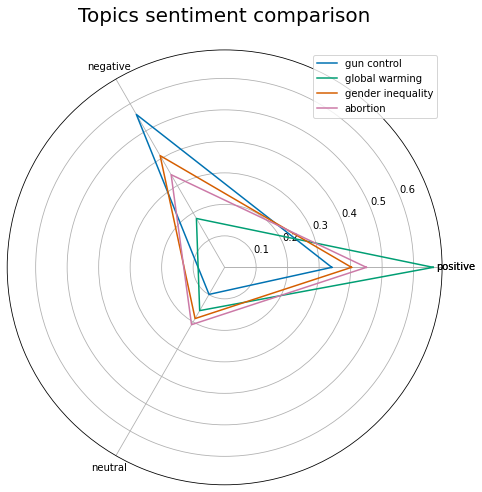

In [146]:
categories = ['positive','negative','neutral']
categories = [*categories, categories[0]]

gc_stat = [positive_gc.shape[0]/gc_sent.shape[0],negative_gc.shape[0]/gc_sent.shape[0],neutral_gc.shape[0]/gc_sent.shape[0]]
gw_stat = [positive_gw.shape[0]/gw_sent.shape[0],negative_gw.shape[0]/gw_sent.shape[0],neutral_gw.shape[0]/gw_sent.shape[0]]
gi_stat = [positive_gi.shape[0]/gi_sent.shape[0],negative_gi.shape[0]/gi_sent.shape[0],neutral_gi.shape[0]/gi_sent.shape[0]]
ab_stat = [positive_ab.shape[0]/ab_sent.shape[0],negative_ab.shape[0]/ab_sent.shape[0],neutral_ab.shape[0]/ab_sent.shape[0]]

gc_stat = [*gc_stat, gc_stat[0]]
gw_stat = [*gw_stat, gw_stat[0]]
gi_stat = [*gi_stat, gi_stat[0]]
ab_stat = [*ab_stat, ab_stat[0]]

label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(gc_stat))

fig = plt.figure(figsize=(6, 6))
plt.subplot(polar=True)
plt.plot(label_loc, gc_stat, label='gun control')
plt.plot(label_loc, gw_stat, label='global warming')
plt.plot(label_loc, gi_stat, label='gender inequality')
plt.plot(label_loc, ab_stat, label='abortion')
plt.title('Topics sentiment comparison', size=20, y=1.05)
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories, fontsize=12)
plt.figlegend(ncol = 1,loc = 1, fontsize = 16, bbox_to_anchor=(0.45, 0.44, 0.5, 0.5))
plt.tight_layout()
plt.show()


# Save figure
fig.savefig('Figures/Topics_sent_comp.jpeg', dpi=200)
fig.savefig('Figures/Topics_sent_comp.pdf')

## Analysis over the years

### Global warming

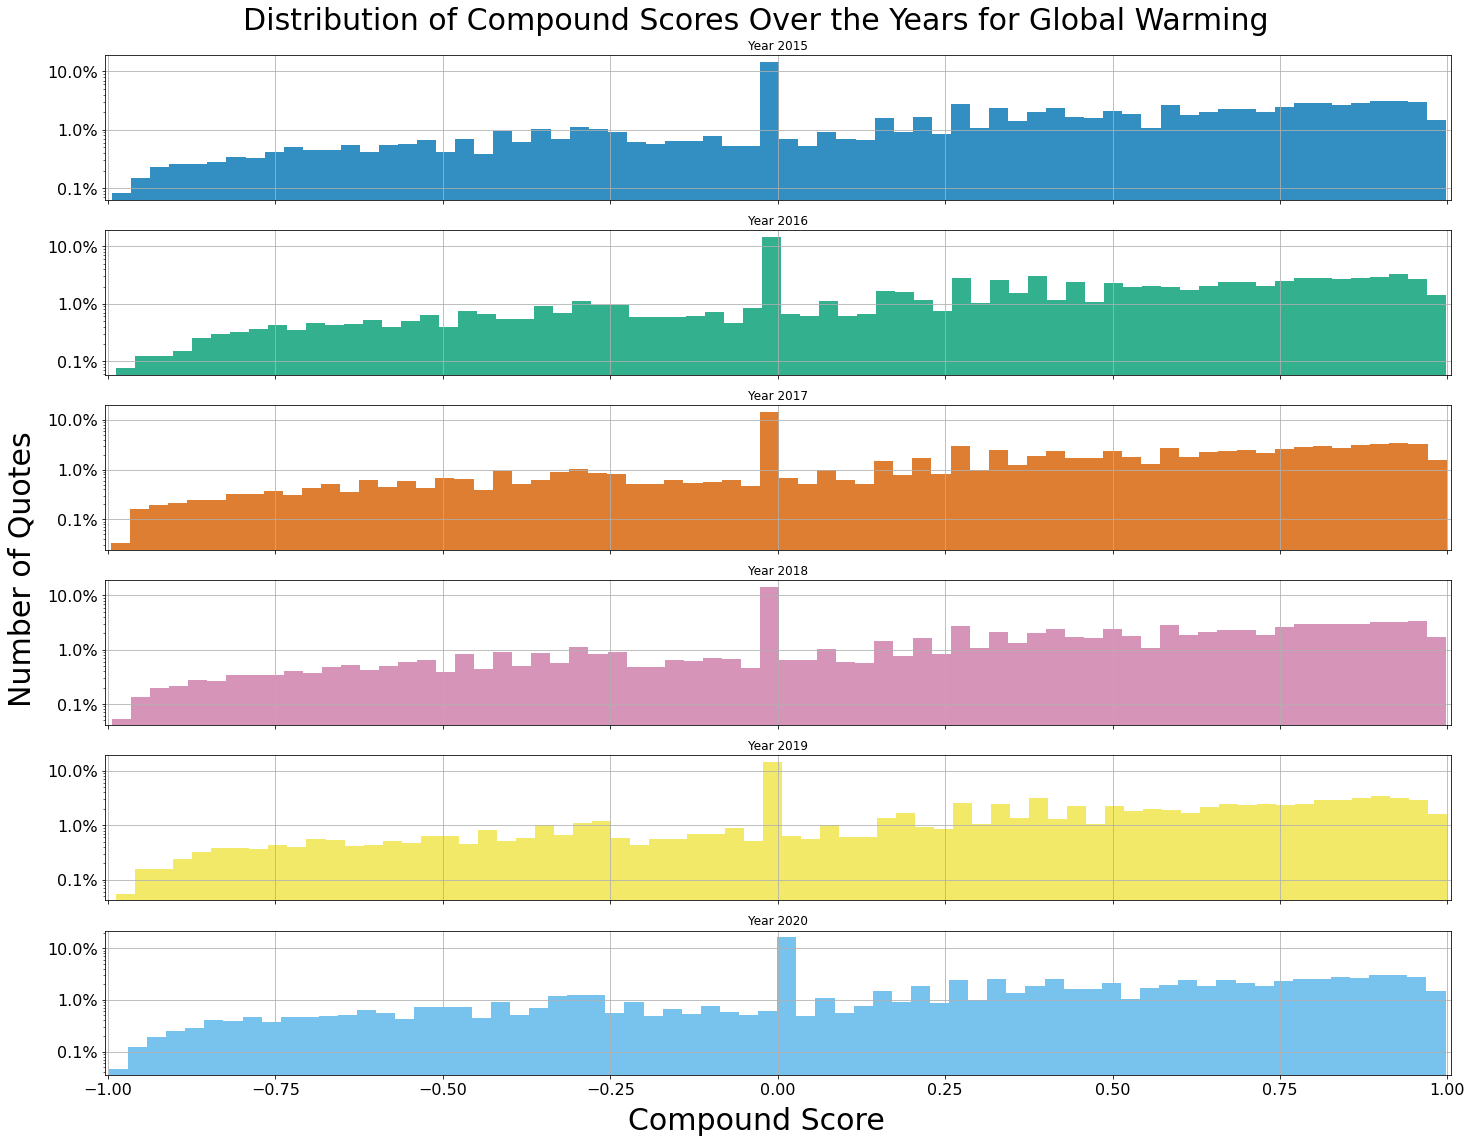

In [147]:
# Plotting the distribution of the compound scores peer year 
fig, axs = plt.subplots(6,figsize=(20,15), sharex=True)
for i in range(6):
    s=str(2015+i)
    # weights used to calculate the percentage
    weight = np.ones(gw_sent[gw_sent['year']==s]['compound scores'].shape[0]) / gw_sent[gw_sent['year']==s]['compound scores'].shape[0]
    axs[i].hist(gw_sent[gw_sent['year']==s]['compound scores'], bins=70, alpha = 0.8, color = 'C'+str(i),weights = weight)
    axs[i].grid()
    axs[i].set_yscale('log')
    axs[i].title.set_text('Year '+ s)
    axs[i].set_xlim([-1.005,1.005])
    
    # set yaxis to percentage
    axs[i].yaxis.set_major_formatter(PercentFormatter(1))

    axs[i].tick_params(axis='both', which='major', labelsize=16)
    
    
    
    # this makes the plot tight
    fig.tight_layout()
    
    
# Setting xlabel, ylabel
fig.text(0.5, -0.02, 'Compound Score', ha='center', fontsize=30)
fig.text(-0.02, 0.5, 'Number of Quotes', va='center', rotation='vertical', fontsize=30)
fig.suptitle('Distribution of Compound Scores Over the Years for Global Warming', fontsize = 30, x=0.5, y=1.02)
None

In [895]:
#  viewing number of quotes per year to take into account the comparison accross years
gw_sent.groupby('year').count()

,quoteID,quotation,speaker,qids,date,probas,positive scores,negative scores,compound scores,month,year-month
year,,,,,,,,,,,
2015,37901,37901,37901,37901,37901,37901,37901,37901,37901,37901,37901
2016,18773,18773,18773,18773,18773,18773,18773,18773,18773,18773,18773
2017,24328,24328,24328,24328,24328,24328,24328,24328,24328,24328,24328
2018,27929,27929,27929,27929,27929,27929,27929,27929,27929,27929,27929
2019,35820,35820,35820,35820,35820,35820,35820,35820,35820,35820,35820
2020,21614,21614,21614,21614,21614,21614,21614,21614,21614,21614,21614


### Abortion

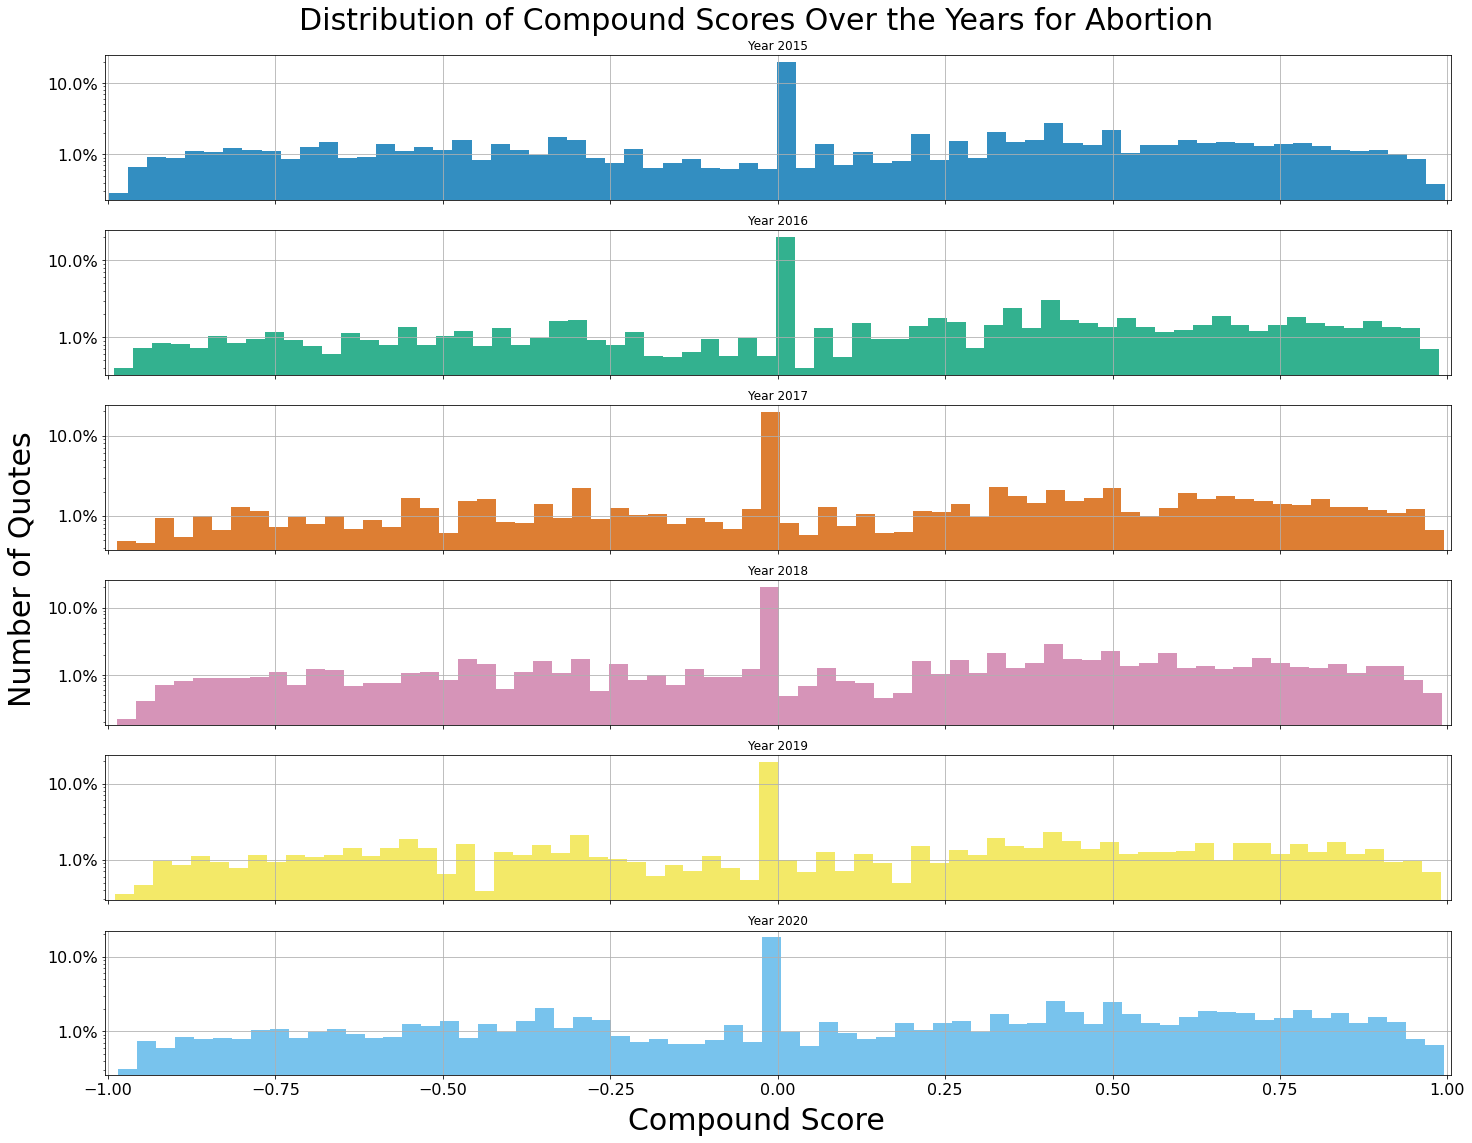

In [149]:
# Plotting the distribution of the compound scores peer year 
fig, axs = plt.subplots(6,figsize=(20,15), sharex=True)
for i in range(6):
    s=str(2015+i)
    # weights used to calculate the percentage
    weight = np.ones(ab_sent[ab_sent['year']==s]['compound scores'].shape[0]) / ab_sent[ab_sent['year']==s]['compound scores'].shape[0]
    axs[i].hist(ab_sent[ab_sent['year']==s]['compound scores'], bins=70, alpha = 0.8, color = 'C'+str(i),weights = weight)
    axs[i].grid()
    axs[i].set_yscale('log')
    axs[i].title.set_text('Year '+ s)
    axs[i].set_xlim([-1.005,1.005])
    
    # set yaxis to percentage
    axs[i].yaxis.set_major_formatter(PercentFormatter(1))

    axs[i].tick_params(axis='both', which='major', labelsize=16)
    
    
    
    # this makes the plot tight
    fig.tight_layout()
    
    
# Setting xlabel, ylabel
fig.text(0.5, -0.02, 'Compound Score', ha='center', fontsize=30)
fig.text(-0.02, 0.5, 'Number of Quotes', va='center', rotation='vertical', fontsize=30)
fig.suptitle('Distribution of Compound Scores Over the Years for Abortion', fontsize = 30, x=0.5, y=1.02)
None

In [150]:
#  viewing number of quotes per year to take into account the comparison accross years
ab_sent.groupby('year').count()

,quoteID,quotation,speaker,qids,date,probas,positive scores,negative scores,compound scores,month,year-month
year,,,,,,,,,,,
2015,16589,16589,16589,16589,16589,16589,16589,16589,16589,16589,16589
2016,3296,3296,3296,3296,3296,3296,3296,3296,3296,3296,3296
2017,3309,3309,3309,3309,3309,3309,3309,3309,3309,3309,3309
2018,2230,2230,2230,2230,2230,2230,2230,2230,2230,2230,2230
2019,2801,2801,2801,2801,2801,2801,2801,2801,2801,2801,2801
2020,4141,4141,4141,4141,4141,4141,4141,4141,4141,4141,4141


### Gender Inequality

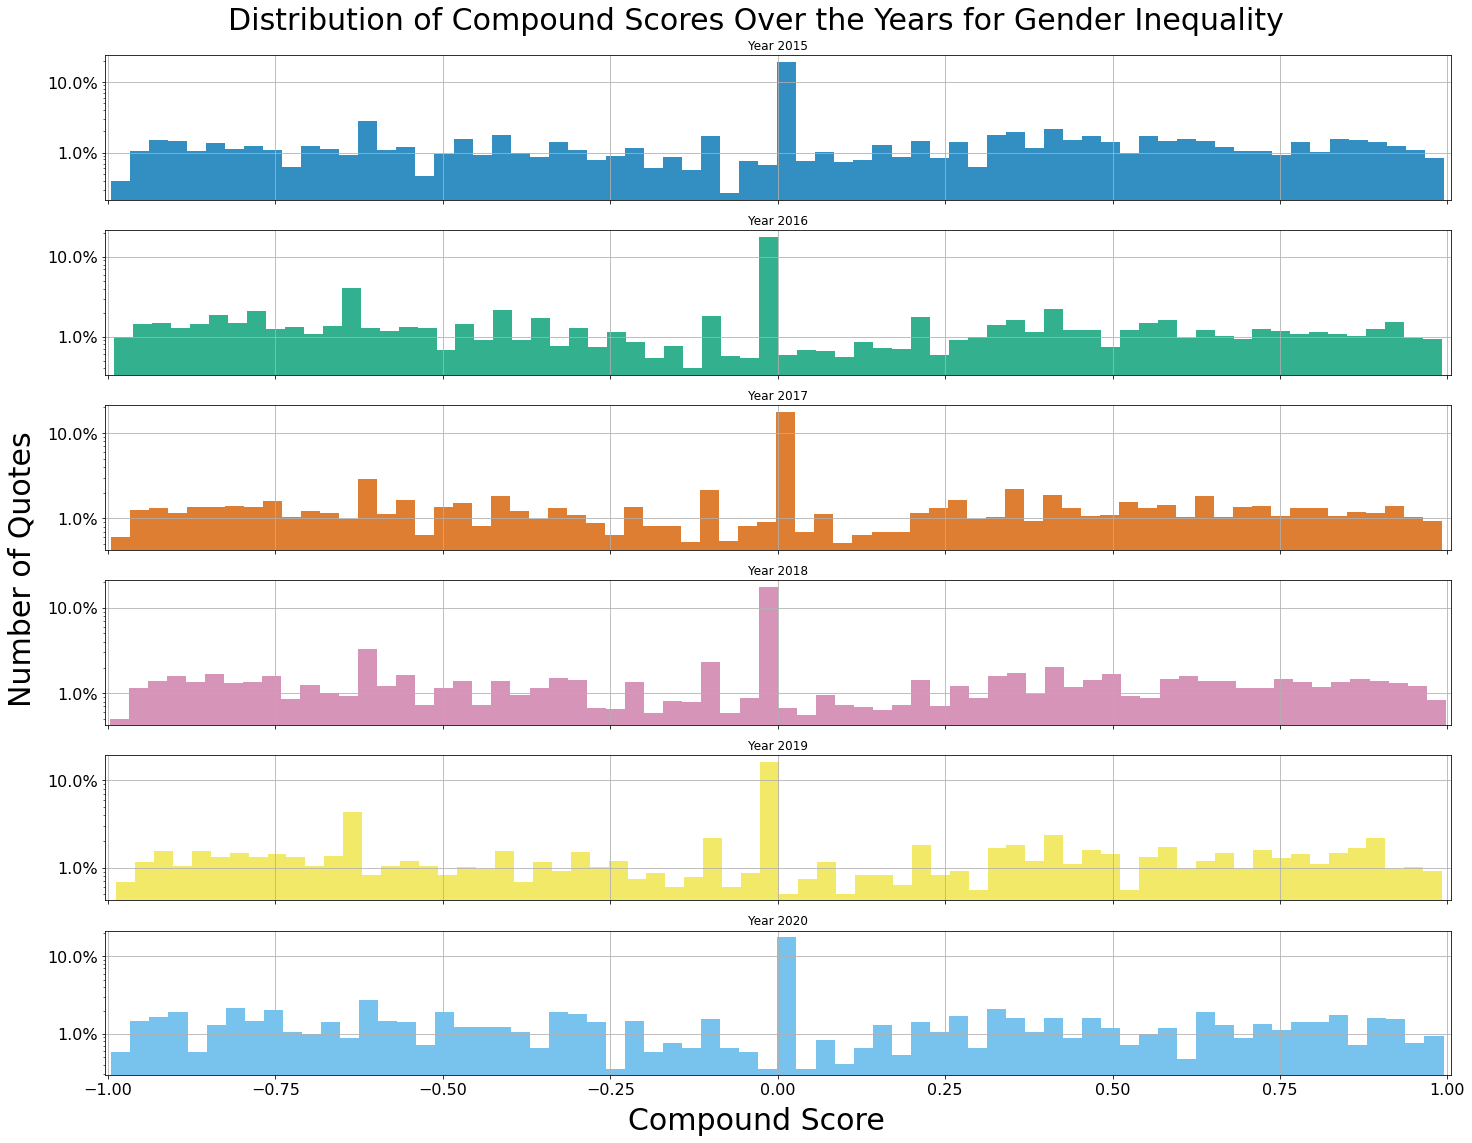

In [151]:
# Plotting the distribution of the compound scores peer year 
fig, axs = plt.subplots(6,figsize=(20,15), sharex=True)
for i in range(6):
    s=str(2015+i)
    # weights used to calculate the percentage
    weight = np.ones(gi_sent[gi_sent['year']==s]['compound scores'].shape[0]) / gi_sent[gi_sent['year']==s]['compound scores'].shape[0]
    axs[i].hist(gi_sent[gi_sent['year']==s]['compound scores'], bins=70, alpha = 0.8, color = 'C'+str(i),weights = weight)
    axs[i].grid()
    axs[i].set_yscale('log')
    axs[i].title.set_text('Year '+ s)
    axs[i].set_xlim([-1.005,1.005])
    
    # set yaxis to percentage
    axs[i].yaxis.set_major_formatter(PercentFormatter(1))

    axs[i].tick_params(axis='both', which='major', labelsize=16)
    
    
    
    # this makes the plot tight
    fig.tight_layout()
    
    
# Setting xlabel, ylabel
fig.text(0.5, -0.02, 'Compound Score', ha='center', fontsize=30)
fig.text(-0.02, 0.5, 'Number of Quotes', va='center', rotation='vertical', fontsize=30)
fig.suptitle('Distribution of Compound Scores Over the Years for Gender Inequality', fontsize = 30, x=0.5, y=1.02)
None

In [152]:
#  viewing number of quotes per year to take into account the comparison accross years
gi_sent.groupby('year').count()

,quoteID,quotation,speaker,qids,date,probas,positive scores,negative scores,compound scores,month,year-month
year,,,,,,,,,,,
2015,3011,3011,3011,3011,3011,3011,3011,3011,3011,3011,3011
2016,5229,5229,5229,5229,5229,5229,5229,5229,5229,5229,5229
2017,6488,6488,6488,6488,6488,6488,6488,6488,6488,6488,6488
2018,12669,12669,12669,12669,12669,12669,12669,12669,12669,12669,12669
2019,2174,2174,2174,2174,2174,2174,2174,2174,2174,2174,2174
2020,1694,1694,1694,1694,1694,1694,1694,1694,1694,1694,1694


### Gun Control

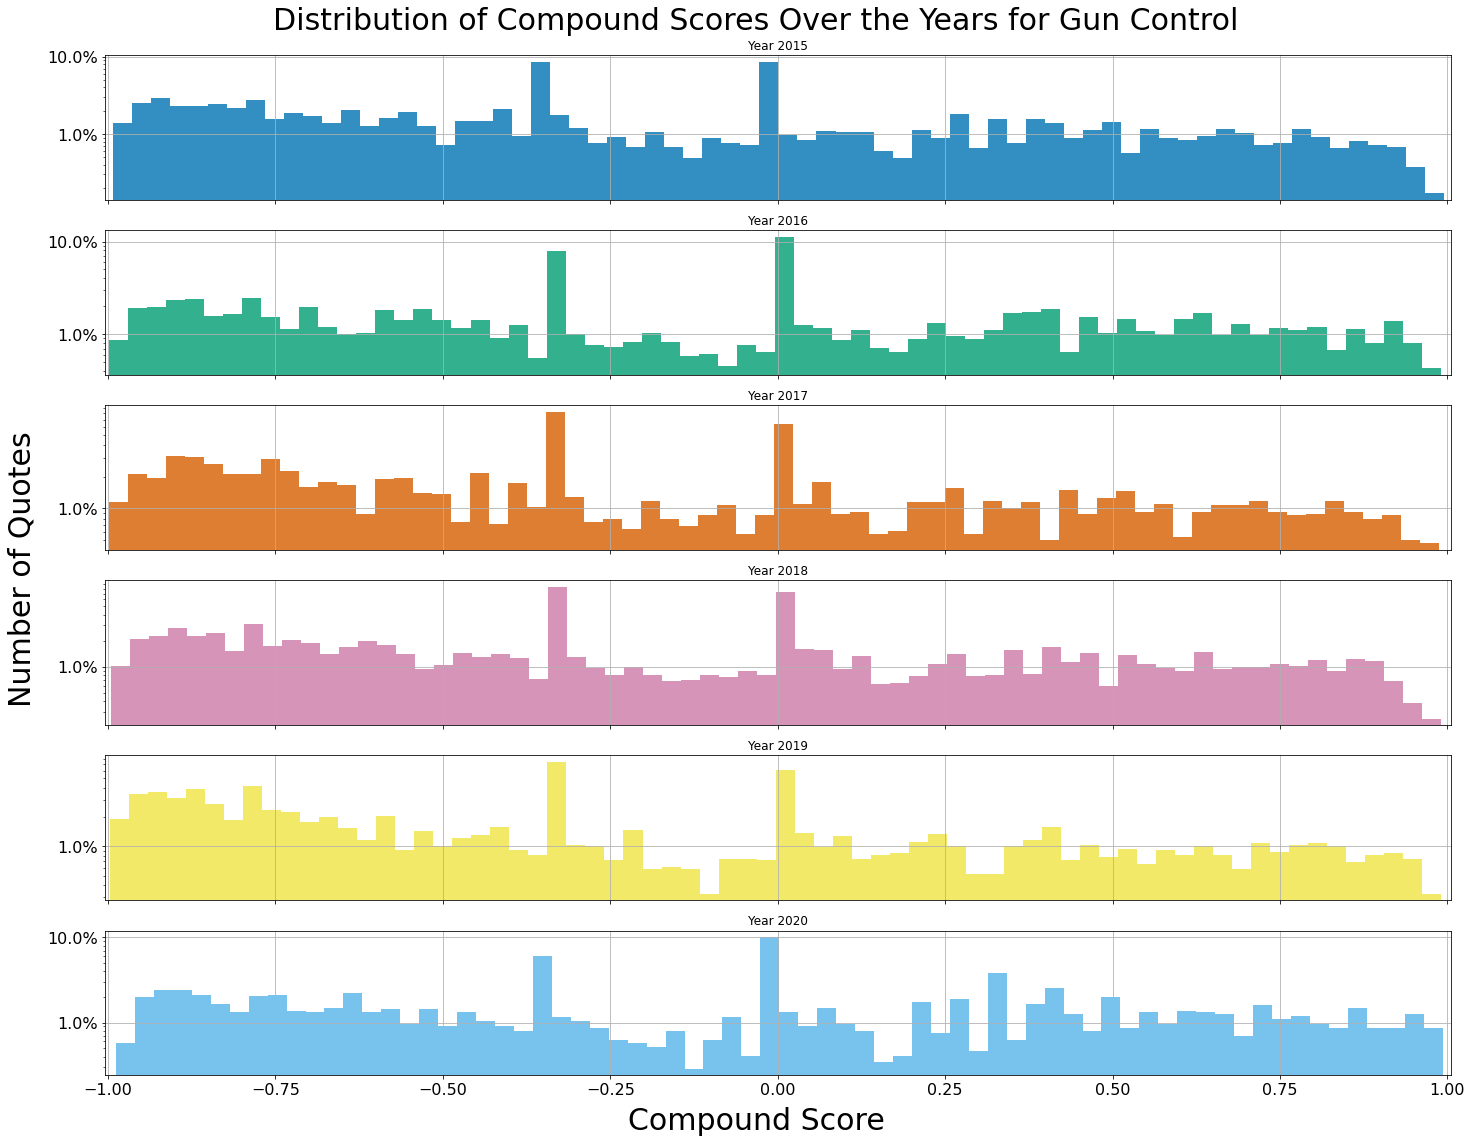

In [153]:
# Plotting the distribution of the compound scores peer year 
fig, axs = plt.subplots(6,figsize=(20,15), sharex=True)
for i in range(6):
    s=str(2015+i)
    # weights used to calculate the percentage
    weight = np.ones(gc_sent[gc_sent['year']==s]['compound scores'].shape[0]) / gc_sent[gc_sent['year']==s]['compound scores'].shape[0]
    axs[i].hist(gc_sent[gc_sent['year']==s]['compound scores'], bins=70, alpha = 0.8, color = 'C'+str(i),weights = weight)
    axs[i].grid()
    axs[i].set_yscale('log')
    axs[i].title.set_text('Year '+ s)
    axs[i].set_xlim([-1.005,1.005])
    
    # set yaxis to percentage
    axs[i].yaxis.set_major_formatter(PercentFormatter(1))

    axs[i].tick_params(axis='both', which='major', labelsize=16)
    
    # this makes the plot tight
    fig.tight_layout()
    
    
# Setting xlabel, ylabel
fig.text(0.5, -0.02, 'Compound Score', ha='center', fontsize=30)
fig.text(-0.02, 0.5, 'Number of Quotes', va='center', rotation='vertical', fontsize=30)
fig.suptitle('Distribution of Compound Scores Over the Years for Gun Control', fontsize = 30, x=0.5, y=1.02)
None

In [154]:
#  viewing number of quotes per year to take into account the comparison accross years
gc_sent.groupby('year').count()

,quoteID,quotation,speaker,qids,date,probas,positive scores,negative scores,compound scores,month,year-month
year,,,,,,,,,,,
2015,3493,3493,3493,3493,3493,3493,3493,3493,3493,3493,3493
2016,3275,3275,3275,3275,3275,3275,3275,3275,3275,3275,3275
2017,2801,2801,2801,2801,2801,2801,2801,2801,2801,2801,2801
2018,3968,3968,3968,3968,3968,3968,3968,3968,3968,3968,3968
2019,3072,3072,3072,3072,3072,3072,3072,3072,3072,3072,3072
2020,1743,1743,1743,1743,1743,1743,1743,1743,1743,1743,1743


### Overall years

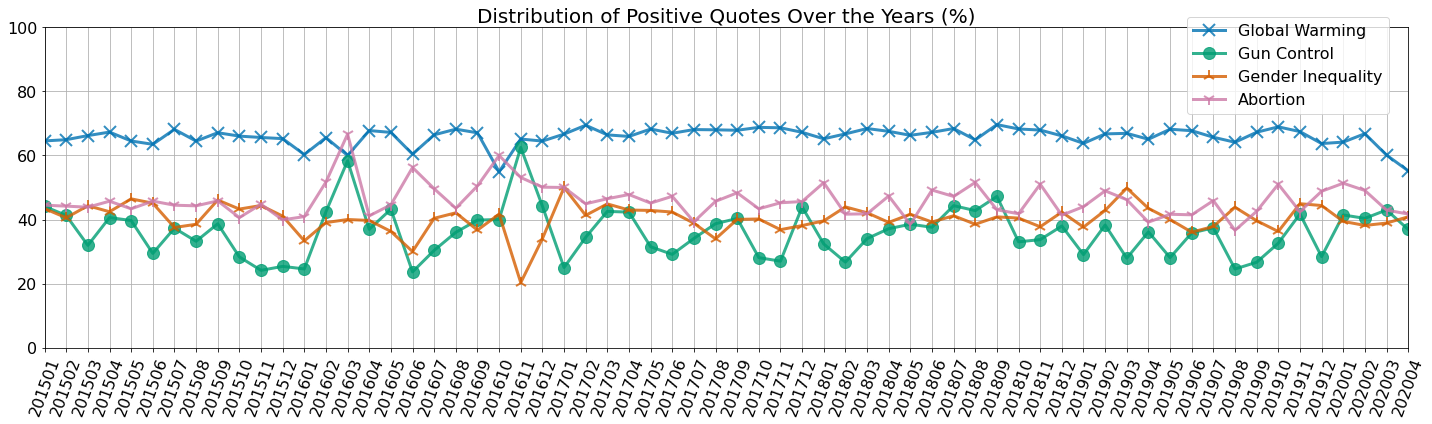

In [896]:
# Plot the frequency of the positive quotes for each topic per month/year
fig = plt.figure(figsize=(20,6))
plt.plot(100*positive_gw.groupby('year-month').count()['quotation']/gw_sent.groupby('year-month').count()['quotation'], linewidth=3, label = 'Global Warming', alpha = 0.8, marker = 'x', markersize=12, markeredgewidth =2)
plt.plot(100*positive_gc.groupby('year-month').count()['quotation']/gc_sent.groupby('year-month').count()['quotation'], linewidth=3, label = 'Gun Control', alpha = 0.8,marker = 'o', markersize=12)
plt.plot(100*positive_gi.groupby('year-month').count()['quotation']/gi_sent.groupby('year-month').count()['quotation'], linewidth=3, label = 'Gender Inequality', alpha = 0.8, marker = '2', markersize=12, markeredgewidth =2)
plt.plot(100*positive_ab.groupby('year-month').count()['quotation']/ab_sent.groupby('year-month').count()['quotation'], linewidth=3, label = 'Abortion', alpha = 0.8, marker='1', markersize=12, markeredgewidth =2)
plt.title('Distribution of Positive Quotes Over the Years (%)', fontsize=20)
plt.grid()

plt.xlim(['201501','202004'])
plt.xticks(rotation=70)
plt.ylim([0,100])

# this controls where you put the legend with bbox_to_anchor
plt.figlegend(ncol = 1,loc = 1, fontsize = 16, bbox_to_anchor=(0.47, 0.46, 0.5, 0.5), numpoints = 1)

# this controls the grid labels size
plt.tick_params(axis='both', which='major', labelsize=16)

# this makes the plot tight
plt.tight_layout()

None

# Save figure
fig.savefig('Figures/pos_quotes_per_year.jpeg', dpi=200)
fig.savefig('Figures/pos_quotes_per_year.pdf')


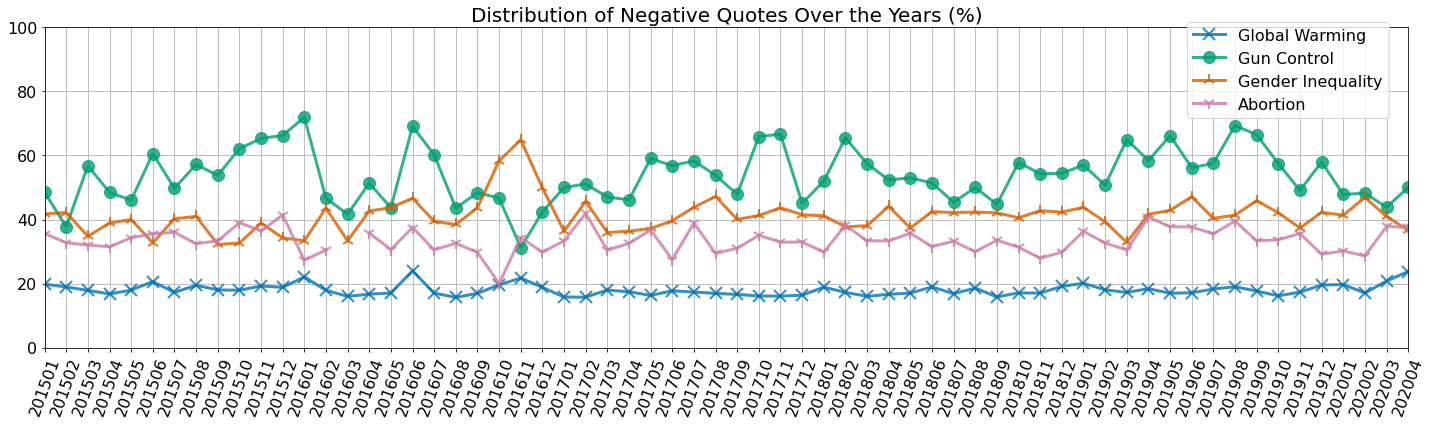

In [897]:
# Plot the frequency of the negative quotes for each topic per month/year
fig = plt.figure(figsize=(20,6))
plt.plot(100*negative_gw.groupby('year-month').count()['quotation']/gw_sent.groupby('year-month').count()['quotation'], linewidth=3, label = 'Global Warming', alpha = 0.8, marker = 'x', markersize=12, markeredgewidth =2)
plt.plot(100*negative_gc.groupby('year-month').count()['quotation']/gc_sent.groupby('year-month').count()['quotation'], linewidth=3, label = 'Gun Control', alpha = 0.8 ,marker = 'o', markersize=12)
plt.plot(100*negative_gi.groupby('year-month').count()['quotation']/gi_sent.groupby('year-month').count()['quotation'], linewidth=3, label = 'Gender Inequality', alpha = 0.8,  marker = '2', markersize=12, markeredgewidth =2)
plt.plot(100*negative_ab.groupby('year-month').count()['quotation']/ab_sent.groupby('year-month').count()['quotation'], linewidth=3, label = 'Abortion', alpha = 0.8,  marker = '1', markersize=12, markeredgewidth =2)
plt.title('Distribution of Negative Quotes Over the Years (%)', fontsize = 20)
plt.grid()
plt.ylim([0,100])
plt.xlim(['201501','202004'])

plt.xticks(rotation=70)

# this controls where you put the legend with bbox_to_anchor
plt.figlegend(ncol = 1,loc = 1, fontsize = 16, bbox_to_anchor=(0.47, 0.45, 0.5, 0.5), numpoints=1)

# this controls the grid labels size
plt.tick_params(axis='both', which='major', labelsize=16)

# this makes the plot tight
plt.tight_layout()

None

# Save figure
fig.savefig('Figures/neg_quotes_per_year.jpeg', dpi=200)
fig.savefig('Figures/neg_quotes_per_year.pdf')



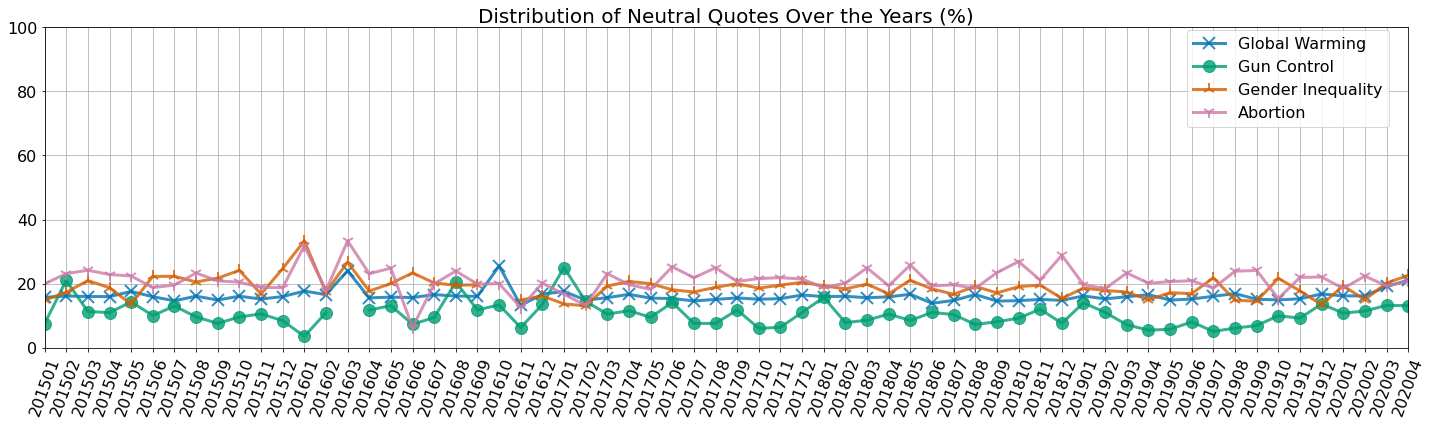

In [898]:
# Plot the frequency of the neutral quotes for each topic per month/year
fig = plt.figure(figsize=(20,6))
plt.plot(100*neutral_gw.groupby('year-month').count()['quotation']/gw_sent.groupby('year-month').count()['quotation'], linewidth=3, label = 'Global Warming', alpha = 0.8, marker = 'x', markersize=12, markeredgewidth =2)
plt.plot(100*neutral_gc.groupby('year-month').count()['quotation']/gc_sent.groupby('year-month').count()['quotation'], linewidth=3, label = 'Gun Control', alpha = 0.8 ,marker = 'o', markersize=12)
plt.plot(100*neutral_gi.groupby('year-month').count()['quotation']/gi_sent.groupby('year-month').count()['quotation'], linewidth=3, label = 'Gender Inequality', alpha = 0.8,  marker = '2', markersize=12, markeredgewidth =2)
plt.plot(100*neutral_ab.groupby('year-month').count()['quotation']/ab_sent.groupby('year-month').count()['quotation'], linewidth=3, label = 'Abortion', alpha = 0.8,  marker = '1', markersize=12, markeredgewidth =2)

plt.title('Distribution of Neutral Quotes Over the Years (%)', fontsize = 20)
plt.grid()
plt.ylim([0,100])
plt.xlim(['201501','202004'])
plt.xticks(rotation=70)

# this controls where you put the legend with bbox_to_anchor
plt.figlegend(ncol = 1,loc = 1, fontsize = 16, bbox_to_anchor=(0.47, 0.43, 0.5, 0.5), numpoints=1)

# this controls the grid labels size
plt.tick_params(axis='both', which='major', labelsize=16)

# this makes the plot tight
plt.tight_layout()
None

# Save figure
fig.savefig('Figures/neu_quotes_per_year.jpeg', dpi=200)
fig.savefig('Figures/neu_quotes_per_year.pdf')



## Analysis over the speaker attributes

In [192]:
#Merging information about speakers with sentimental analysis results
gw_at=gw.merge(gw_sent[['quotation', 'speaker','positive scores', 'negative scores', 'compound scores']],how='left',left_on=['quotation','speaker'],right_on=['quotation','speaker']).copy()
gi_at=gi.merge(gi_sent[['quotation', 'speaker','positive scores', 'negative scores', 'compound scores']],how='left',left_on=['quotation','speaker'],right_on=['quotation','speaker']).copy()
gc_at=gc.merge(gc_sent[['quotation', 'speaker','positive scores', 'negative scores', 'compound scores']],how='left',left_on=['quotation','speaker'],right_on=['quotation','speaker']).copy()
ab_at=ab.merge(ab_sent[['quotation', 'speaker','positive scores', 'negative scores', 'compound scores']],how='left',left_on=['quotation','speaker'],right_on=['quotation','speaker']).copy()

### Under the Gender Lens

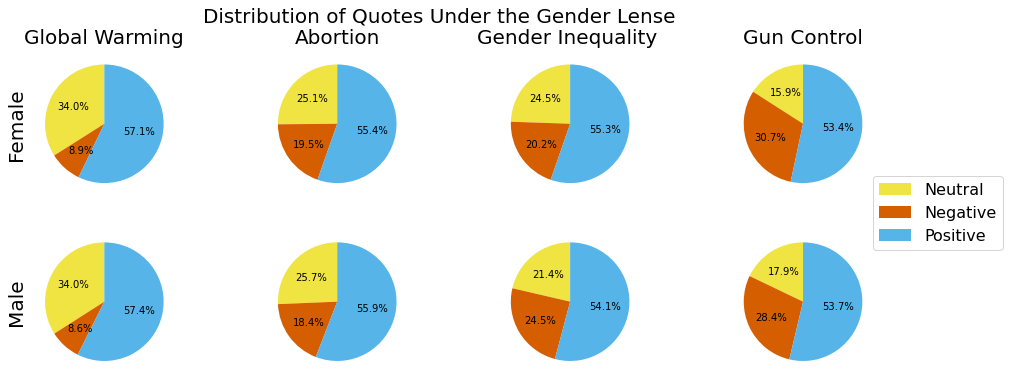

<Figure size 432x288 with 0 Axes>

In [899]:
## Global Warming
# add a gender column with 'female', 'male', or 'other' attributes instead of the IDs  
gw_at['sex']=gw_at['gender'].apply(lambda x: 'male' if x=='[\'Q6581097\']' else 'female').copy()
gw_gen=gw_at[gw_at['sex'].isin(['male','female'])].copy()
# split quotes into positive, negative and neutral
positive_gw_gen=gw_gen[gw_gen['compound scores']>=0.05]
negative_gw_gen=gw_gen[gw_gen['compound scores']<=-0.05]
neutral_gw_gen=gw_gen[np.abs(gw_gen['compound scores'])< 0.05]
# calculate the distribution of the three types of quotes for female and male
sizes_f_gw = [positive_gw_gen.groupby('sex').count()['quotation'].female/gw_gen.groupby('sex').count()['quotation'].female,negative_gw_gen.groupby('sex').count()['quotation'].female/gw_gen.groupby('sex').count()['quotation'].female,neutral_gw_gen.groupby('sex').count()['quotation'].female/neutral_gw_gen.groupby('sex').count()['quotation'].female]
sizes_m_gw = [positive_gw_gen.groupby('sex').count()['quotation'].male/gw_gen.groupby('sex').count()['quotation'].male,negative_gw_gen.groupby('sex').count()['quotation'].male/gw_gen.groupby('sex').count()['quotation'].male,neutral_gw_gen.groupby('sex').count()['quotation'].male/neutral_gw_gen.groupby('sex').count()['quotation'].male]

## Abortion
# add a gender column with 'female', 'male', or 'other' attributes instead of the IDs 
ab_at['sex']=ab_at['gender'].apply(lambda x: 'male' if x=='[\'Q6581097\']' else 'female').copy()
ab_gen=ab_at[ab_at['sex'].isin(['male','female'])].copy()
# split quotes into positive, negative and neutral
positive_ab_gen=ab_gen[ab_gen['compound scores']>=0.05]
negative_ab_gen=ab_gen[ab_gen['compound scores']<=-0.05]
neutral_ab_gen=ab_gen[np.abs(ab_gen['compound scores'])< 0.05]
# calculate the distribution of the three types of quotes for female and male
sizes_f_ab = [positive_ab_gen.groupby('sex').count()['quotation'].female/ab_gen.groupby('sex').count()['quotation'].female,negative_ab_gen.groupby('sex').count()['quotation'].female/ab_gen.groupby('sex').count()['quotation'].female,neutral_ab_gen.groupby('sex').count()['quotation'].female/neutral_ab_gen.groupby('sex').count()['quotation'].female]
sizes_m_ab = [positive_ab_gen.groupby('sex').count()['quotation'].male/ab_gen.groupby('sex').count()['quotation'].male,negative_ab_gen.groupby('sex').count()['quotation'].male/ab_gen.groupby('sex').count()['quotation'].male,neutral_ab_gen.groupby('sex').count()['quotation'].male/neutral_ab_gen.groupby('sex').count()['quotation'].male]

## Gender Inequality
# add a gender column with 'female', 'male', or 'other' attributes instead of the IDs 
gi_at['sex']=gi_at['gender'].apply(lambda x: 'male' if x=='[\'Q6581097\']' else 'female').copy()
gi_gen=gi_at[gi_at['sex'].isin(['male','female'])].copy()
# split quotes into positive, negative and neutral
positive_gi_gen=gi_gen[gi_gen['compound scores']>=0.05]
negative_gi_gen=gi_gen[gi_gen['compound scores']<=-0.05]
neutral_gi_gen=gi_gen[np.abs(gi_gen['compound scores'])< 0.05]
# calculate the distribution of the three types of quotes for female and male
sizes_f_gi = [positive_gi_gen.groupby('sex').count()['quotation'].female/gi_gen.groupby('sex').count()['quotation'].female,negative_gi_gen.groupby('sex').count()['quotation'].female/gi_gen.groupby('sex').count()['quotation'].female,neutral_gi_gen.groupby('sex').count()['quotation'].female/neutral_gi_gen.groupby('sex').count()['quotation'].female]
sizes_m_gi = [positive_gi_gen.groupby('sex').count()['quotation'].male/gi_gen.groupby('sex').count()['quotation'].male,negative_gi_gen.groupby('sex').count()['quotation'].male/gi_gen.groupby('sex').count()['quotation'].male,neutral_gi_gen.groupby('sex').count()['quotation'].male/neutral_gi_gen.groupby('sex').count()['quotation'].male]


## Gun Control
# add a gender column with 'female', 'male', or 'other' attributes instead of the IDs 
gc_at['sex']=gc_at['gender'].apply(lambda x: 'male' if x=='[\'Q6581097\']' else 'female').copy()
gc_gen=gc_at[gc_at['sex'].isin(['male','female'])].copy()
# split quotes into positive, negative and neutral
positive_gc_gen=gc_gen[gc_gen['compound scores']>=0.05]
negative_gc_gen=gc_gen[gc_gen['compound scores']<=-0.05]
neutral_gc_gen=gc_gen[np.abs(gc_gen['compound scores'])< 0.05]
# calculate the distribution of the three types of quotes for female and male
sizes_f_gc = [positive_gc_gen.groupby('sex').count()['quotation'].female/gc_gen.groupby('sex').count()['quotation'].female,negative_gc_gen.groupby('sex').count()['quotation'].female/gc_gen.groupby('sex').count()['quotation'].female,neutral_gc_gen.groupby('sex').count()['quotation'].female/neutral_gc_gen.groupby('sex').count()['quotation'].female]
sizes_m_gc = [positive_gc_gen.groupby('sex').count()['quotation'].male/gc_gen.groupby('sex').count()['quotation'].male,negative_gc_gen.groupby('sex').count()['quotation'].male/gc_gen.groupby('sex').count()['quotation'].male,neutral_gc_gen.groupby('sex').count()['quotation'].male/neutral_gc_gen.groupby('sex').count()['quotation'].male]

# Pie chart
labels = ['Neutral', 'Negative','Positive']
fig, axs=plt.subplots(2,4,figsize=(16,6))

# plot for Global Warming split into female and male
axs[0,0].pie(sizes_f_gw, autopct='%1.1f%%', startangle=90, colors = ['C4', 'C2', 'C5'], textprops={'fontsize': 10})
axs[1,0].pie(sizes_m_gw,  autopct='%1.1f%%', startangle=90, colors = ['C4', 'C2', 'C5'], textprops={'fontsize': 10})
# set local title
axs[0,0].set_title('Global Warming', fontsize = 20)

# set the ylabels for all the pie charts
axs[0,0].set_ylabel('Female', fontsize = 20)
axs[1,0].set_ylabel('Male', fontsize = 20)

# plot for Abortion split into female and male
axs[0,1].pie(sizes_f_ab,  autopct='%1.1f%%', startangle=90, colors = ['C4', 'C2', 'C5'], textprops={'fontsize': 10})
axs[1,1].pie(sizes_m_ab,  autopct='%1.1f%%', startangle=90,colors = ['C4', 'C2', 'C5'], textprops={'fontsize': 10})
# set local title
axs[0,1].set_title('Abortion' , fontsize = 20)

# plot for Gender Inequality split into female and male
axs[0,2].pie(sizes_f_gi, autopct='%1.1f%%', startangle=90, colors = ['C4', 'C2', 'C5'], textprops={'fontsize': 10})
axs[1,2].pie(sizes_m_gi,  autopct='%1.1f%%', startangle=90, colors = ['C4', 'C2', 'C5'], textprops={'fontsize': 10})
# set local title
axs[0,2].set_title('Gender Inequality ', fontsize = 20)

# plot for Gun Control split into female and male
axs[0,3].pie(sizes_f_gc, autopct='%1.1f%%', startangle=90, colors = ['C4', 'C2', 'C5'], textprops={'fontsize': 10})
axs[1,3].pie(sizes_m_gc, autopct='%1.1f%%', startangle=90,colors = ['C4', 'C2', 'C5'], textprops={'fontsize': 10})
# set local title
axs[0,3].set_title('Gun Control' , fontsize = 20)

# include legend with the labels corresponding to the slices of the pie chart
plt.legend(labels, loc = 1, bbox_to_anchor=(1.4, 0.9, 0.5, 0.5), fontsize = 16)

# set global title
plt.suptitle('Distribution of Quotes Under the Gender Lens', fontsize= 20)

plt.show()

plt.tight_layout()

None

# save
fig.savefig('Figures/dist_quotes_gender.jpeg', dpi = 200)
fig.savefig('Figures/dist_quotes_gender.pdf')



### Splitting over attributes: academic degree, nationality, religion

In [168]:
#academic degrees: the corresponding ID for the four levels of academic degrees
bach=['Q1765120','Q163727','Q787674','Q798137','Q10752757','Q2085288','Q4838827','Q56760985']
mas=['Q191701','Q950900','Q183816','Q4175466','Q1907865','Q6785201','Q2091008','Q3297864', 'Q18523811']
phd=['Q19610320', 'Q11415564', 'Q1771785', 'Q17744738', 'Q19610212', 'Q752297', 'Q1540185','Q959320', 'Q17281072', 'Q849697', 'Q12101789', 'Q18745564', 'Q3033568', 'Q1984623', 'Q1984623', 'Q6518699']
doc=['Q913404' ]

#encoding academic degree
    # for global warming
gw_at_deg = gw_at.dropna(subset=['academic_degree']).copy()
gw_at_deg['degree']=gw_at_deg['academic_degree'].apply(lambda x: 'doctor' if len(set(x.strip('[]').replace('\'','').split(' '))&set(doc))>0 else 'phd' if len(set(x.strip('[]').replace('\'','').split(' '))&set(phd))>0 else 'master' if len(set(x.strip('[]').replace('\'','').split(' '))&set(mas))>0 else 'bachelor' if len(set(x.strip('[]').replace('\'','').split(' '))&set(bach))>0 else None)
gw_at_deg=gw_at_deg.dropna(subset=['degree']).copy()
    # for gun control
gc_at_deg=gc_at.dropna(subset=['academic_degree']).copy()
gc_at_deg['degree']=gc_at_deg['academic_degree'].apply(lambda x: 'doctor' if len(set(x.strip('[]').replace('\'','').split(' '))&set(doc))>0 else 'phd' if len(set(x.strip('[]').replace('\'','').split(' '))&set(phd))>0 else 'master' if len(set(x.strip('[]').replace('\'','').split(' '))&set(mas))>0 else 'bachelor' if len(set(x.strip('[]').replace('\'','').split(' '))&set(bach))>0 else None)
gc_at_deg=gc_at_deg.dropna(subset=['degree']).copy()
    # for gender inequality
gi_at_deg=gi_at.dropna(subset=['academic_degree']).copy()
gi_at_deg['degree']=gi_at_deg['academic_degree'].apply(lambda x: 'doctor' if len(set(x.strip('[]').replace('\'','').split(' '))&set(doc))>0 else 'phd' if len(set(x.strip('[]').replace('\'','').split(' '))&set(phd))>0 else 'master' if len(set(x.strip('[]').replace('\'','').split(' '))&set(mas))>0 else 'bachelor' if len(set(x.strip('[]').replace('\'','').split(' '))&set(bach))>0 else None)
gi_at_deg=gi_at_deg.dropna(subset=['degree']).copy()
    # for abortion
ab_at_deg=ab_at.dropna(subset=['academic_degree']).copy()
ab_at_deg['degree']=ab_at_deg['academic_degree'].apply(lambda x: 'doctor' if len(set(x.strip('[]').replace('\'','').split(' '))&set(doc))>0 else 'phd' if len(set(x.strip('[]').replace('\'','').split(' '))&set(phd))>0 else 'master' if len(set(x.strip('[]').replace('\'','').split(' '))&set(mas))>0 else 'bachelor' if len(set(x.strip('[]').replace('\'','').split(' '))&set(bach))>0 else None)
ab_at_deg=ab_at_deg.dropna(subset=['degree']).copy()

#encoding nationality (most frequent)
    # for global warming
gw_at_nat=gw_at.dropna(subset=['nationality']).copy()
gw_at_nat['nation']=gw_at_nat['nationality'].apply(lambda x: 'USA' if x.strip('[]').replace('\'','')=='Q30' else 'UK' if x.strip('[]').replace('\'','')=='Q145' else 'Australia' if x.strip('[]').replace('\'','')=='Q408' else 'Canada' if x.strip('[]').replace('\'','')=='Q16' else 'India' if x.strip('[]').replace('\'','')=='Q668' else 'Germany' if x.strip('[]').replace('\'','')=='Q183' else 'New Zeland' if x.strip('[]').replace('\'','')=='Q664' else 'France' if x.strip('[]').replace('\'','')=='Q143' else 'Ireland' if x.strip('[]').replace('\'','')=='Q27'  else 'None')
gw_at_nat=gw_at_nat.dropna(subset=['nationality']).copy()
    # for gun control
gc_at_nat=gc_at.dropna(subset=['nationality']).copy()
gc_at_nat['nation']=gc_at_nat['nationality'].apply(lambda x: 'USA' if x.strip('[]').replace('\'','')=='Q30' else 'UK' if x.strip('[]').replace('\'','')=='Q145' else 'Australia' if x.strip('[]').replace('\'','')=='Q408' else 'Canada' if x.strip('[]').replace('\'','')=='Q16' else 'India' if x.strip('[]').replace('\'','')=='Q668' else 'Germany' if x.strip('[]').replace('\'','')=='Q183' else 'New Zeland' if x.strip('[]').replace('\'','')=='Q664' else 'France' if x.strip('[]').replace('\'','')=='Q143' else 'Ireland' if x.strip('[]').replace('\'','')=='Q27'  else 'None')
gc_at_nat=gc_at_nat.dropna(subset=['nationality']).copy()
    # for gender inequality
gi_at_nat=gi_at.dropna(subset=['nationality']).copy()
gi_at_nat['nation']=gi_at_nat['nationality'].apply(lambda x: 'USA' if x.strip('[]').replace('\'','')=='Q30' else 'UK' if x.strip('[]').replace('\'','')=='Q145' else 'Australia' if x.strip('[]').replace('\'','')=='Q408' else 'Canada' if x.strip('[]').replace('\'','')=='Q16' else 'India' if x.strip('[]').replace('\'','')=='Q668' else 'Germany' if x.strip('[]').replace('\'','')=='Q183' else 'New Zeland' if x.strip('[]').replace('\'','')=='Q664' else 'France' if x.strip('[]').replace('\'','')=='Q143' else 'Ireland' if x.strip('[]').replace('\'','')=='Q27'  else 'None')
gi_at_nat=gi_at_nat.dropna(subset=['nationality']).copy()
    # for abortion
ab_at_nat=ab_at.dropna(subset=['nationality']).copy()
ab_at_nat['nation']=ab_at_nat['nationality'].apply(lambda x: 'USA' if x.strip('[]').replace('\'','')=='Q30' else 'UK' if x.strip('[]').replace('\'','')=='Q145' else 'Australia' if x.strip('[]').replace('\'','')=='Q408' else 'Canada' if x.strip('[]').replace('\'','')=='Q16' else 'India' if x.strip('[]').replace('\'','')=='Q668' else 'Germany' if x.strip('[]').replace('\'','')=='Q183' else 'New Zeland' if x.strip('[]').replace('\'','')=='Q664' else 'France' if x.strip('[]').replace('\'','')=='Q143' else 'Ireland' if x.strip('[]').replace('\'','')=='Q27'  else 'None')
ab_at_nat=ab_at_nat.dropna(subset=['nationality']).copy()

#religions: the corresponding ID for the seven religions
agn=['Q288928']
cat=['Q1841','Q9592','Q6423963','Q178169','Q93191','Q75809','Q1351880','Q33203','Q23540','Q5415672','Q922480']
ath=['Q7066']
christ=['Q5043']
hind=['Q9089','Q748','Q9581']
jud=['Q9268']
isl =['Q432','Q483654'] 

#encoding religion (most frequent)
    # for global warming
gw_at_rel=gw_at.dropna(subset=['religion']).copy()
gw_at_rel['rel']=gw_at_rel['religion'].apply(lambda x: 'agnostic' if len(set(x.strip('[]').replace('\'','').split(' '))&set(agn))>0 else 'catholic' if len(set(x.strip('[]').replace('\'','').split(' '))&set(cat))>0 else 'atheist' if len(set(x.strip('[]').replace('\'','').split(' '))&set(ath))>0 else 'christian' if len(set(x.strip('[]').replace('\'','').split(' '))&set(christ))>0 else 'hinduism' if len(set(x.strip('[]').replace('\'','').split(' '))&set(hind))>0 else 'jewish' if len(set(x.strip('[]').replace('\'','').split(' '))&set(jud))>0 else 'islam' if len(set(x.strip('[]').replace('\'','').split(' '))&set(isl))>0 else None)
gw_at_rel=gw_at_rel.dropna(subset=['rel']).copy()
    # for gun control
gc_at_rel=gc_at.dropna(subset=['religion']).copy()
gc_at_rel['rel']=gc_at_rel['religion'].apply(lambda x: 'agnostic' if len(set(x.strip('[]').replace('\'','').split(' '))&set(agn))>0 else 'catholic' if len(set(x.strip('[]').replace('\'','').split(' '))&set(cat))>0 else 'atheist' if len(set(x.strip('[]').replace('\'','').split(' '))&set(ath))>0 else 'christian' if len(set(x.strip('[]').replace('\'','').split(' '))&set(christ))>0 else 'hinduism' if len(set(x.strip('[]').replace('\'','').split(' '))&set(hind))>0 else 'jewish' if len(set(x.strip('[]').replace('\'','').split(' '))&set(jud))>0 else 'islam' if len(set(x.strip('[]').replace('\'','').split(' '))&set(isl))>0 else None)
gc_at_rel=gc_at_rel.dropna(subset=['rel']).copy()
    # for gender inequality
gi_at_rel=gi_at.dropna(subset=['religion']).copy()
gi_at_rel['rel']=gi_at_rel['religion'].apply(lambda x: 'agnostic' if len(set(x.strip('[]').replace('\'','').split(' '))&set(agn))>0 else 'catholic' if len(set(x.strip('[]').replace('\'','').split(' '))&set(cat))>0 else 'atheist' if len(set(x.strip('[]').replace('\'','').split(' '))&set(ath))>0 else 'christian' if len(set(x.strip('[]').replace('\'','').split(' '))&set(christ))>0 else 'hinduism' if len(set(x.strip('[]').replace('\'','').split(' '))&set(hind))>0 else 'jewish' if len(set(x.strip('[]').replace('\'','').split(' '))&set(jud))>0 else 'islam' if len(set(x.strip('[]').replace('\'','').split(' '))&set(isl))>0 else None)
gi_at_rel=gi_at_rel.dropna(subset=['rel']).copy()
    # for abortion
ab_at_rel=ab_at.dropna(subset=['religion']).copy()
ab_at_rel['rel']=ab_at_rel['religion'].apply(lambda x: 'agnostic' if len(set(x.strip('[]').replace('\'','').split(' '))&set(agn))>0 else 'catholic' if len(set(x.strip('[]').replace('\'','').split(' '))&set(cat))>0 else 'atheist' if len(set(x.strip('[]').replace('\'','').split(' '))&set(ath))>0 else 'christian' if len(set(x.strip('[]').replace('\'','').split(' '))&set(christ))>0 else 'hinduism' if len(set(x.strip('[]').replace('\'','').split(' '))&set(hind))>0 else 'jewish' if len(set(x.strip('[]').replace('\'','').split(' '))&set(jud))>0 else 'islam' if len(set(x.strip('[]').replace('\'','').split(' '))&set(isl))>0 else None)
ab_at_rel=ab_at_rel.dropna(subset=['rel']).copy()

ddd=pd.DataFrame ([i.strip('[]').replace('\'','') for i in gw.groupby('ethnic_group').count().sort_values(by='quotation',ascending=False).head(20).index],columns=['ethnic'])
#md=ddd.merge(meta,how='left',left_on='ethnic',right_on='QID')


### Religion

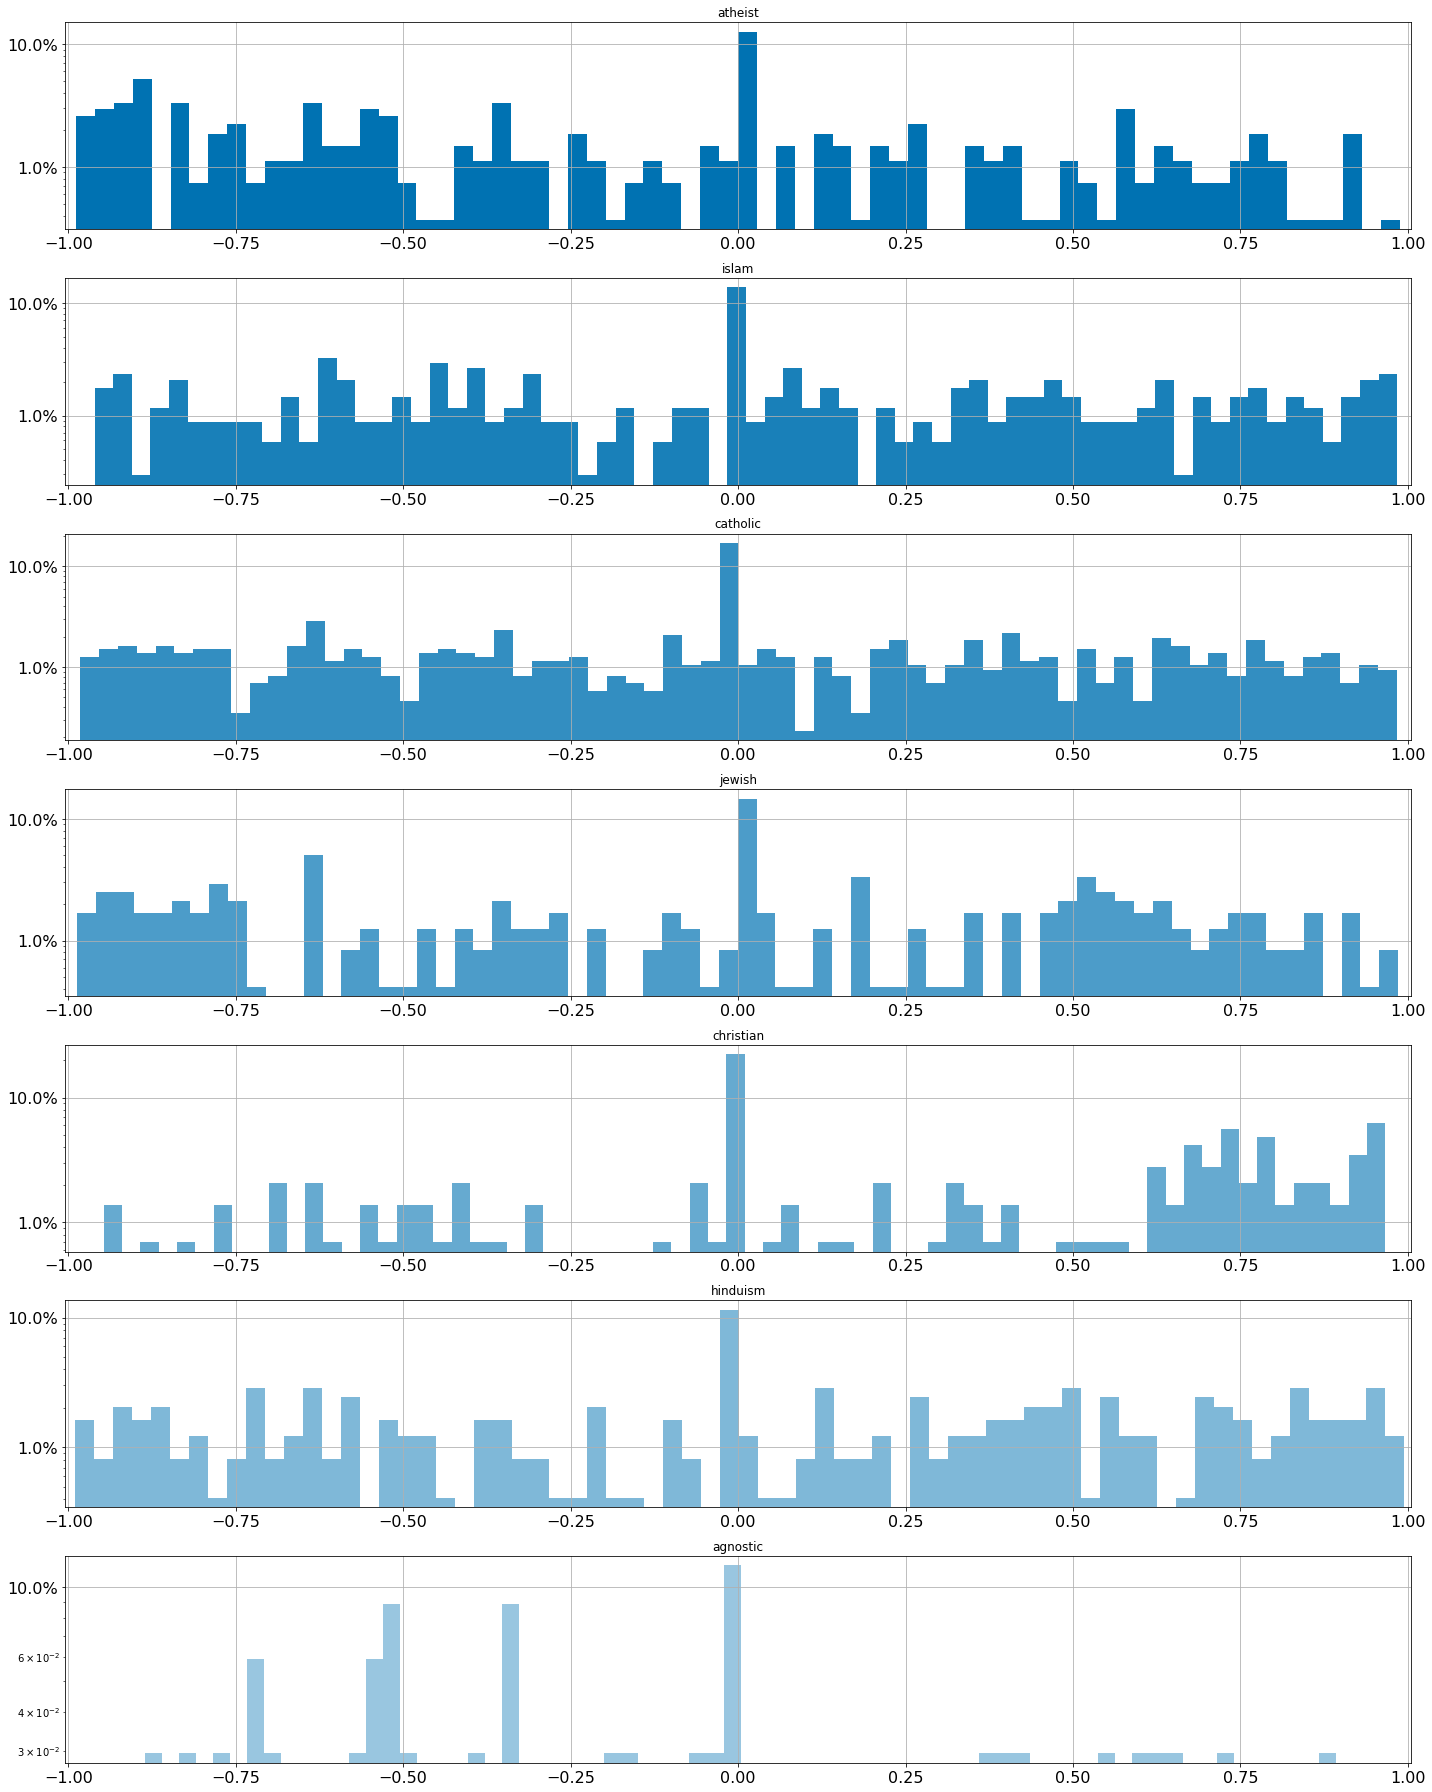

In [169]:
# Gender Inequality: observing distrubutions of compound score

fig, axs = plt.subplots(7,figsize=(20,25))
alpha_score = 1

for i in range(0,7):
    religion = gi_at_rel['rel'].unique()[i]
    weight = np.ones(gi_at_rel[gi_at_rel['rel'] == religion]['compound scores'].shape[0])/gi_at_rel[gi_at_rel['rel'] == religion]['compound scores'].shape[0]
    axs[i].hist(gi_at_rel[gi_at_rel['rel'] == religion]['compound scores'], alpha =alpha_score, weights = weight, bins = 70)
    axs[i].title.set_text(religion)
    alpha_score -= 0.1

    
    axs[i].grid()
    axs[i].set_yscale('log')
    axs[i].set_xlim([-1.005,1.005])
    
    # set yaxis to percentage
    axs[i].yaxis.set_major_formatter(PercentFormatter(1))

    axs[i].tick_params(axis='both', which='major', labelsize=16)
    
    # this makes the plot tight
    fig.tight_layout()
    


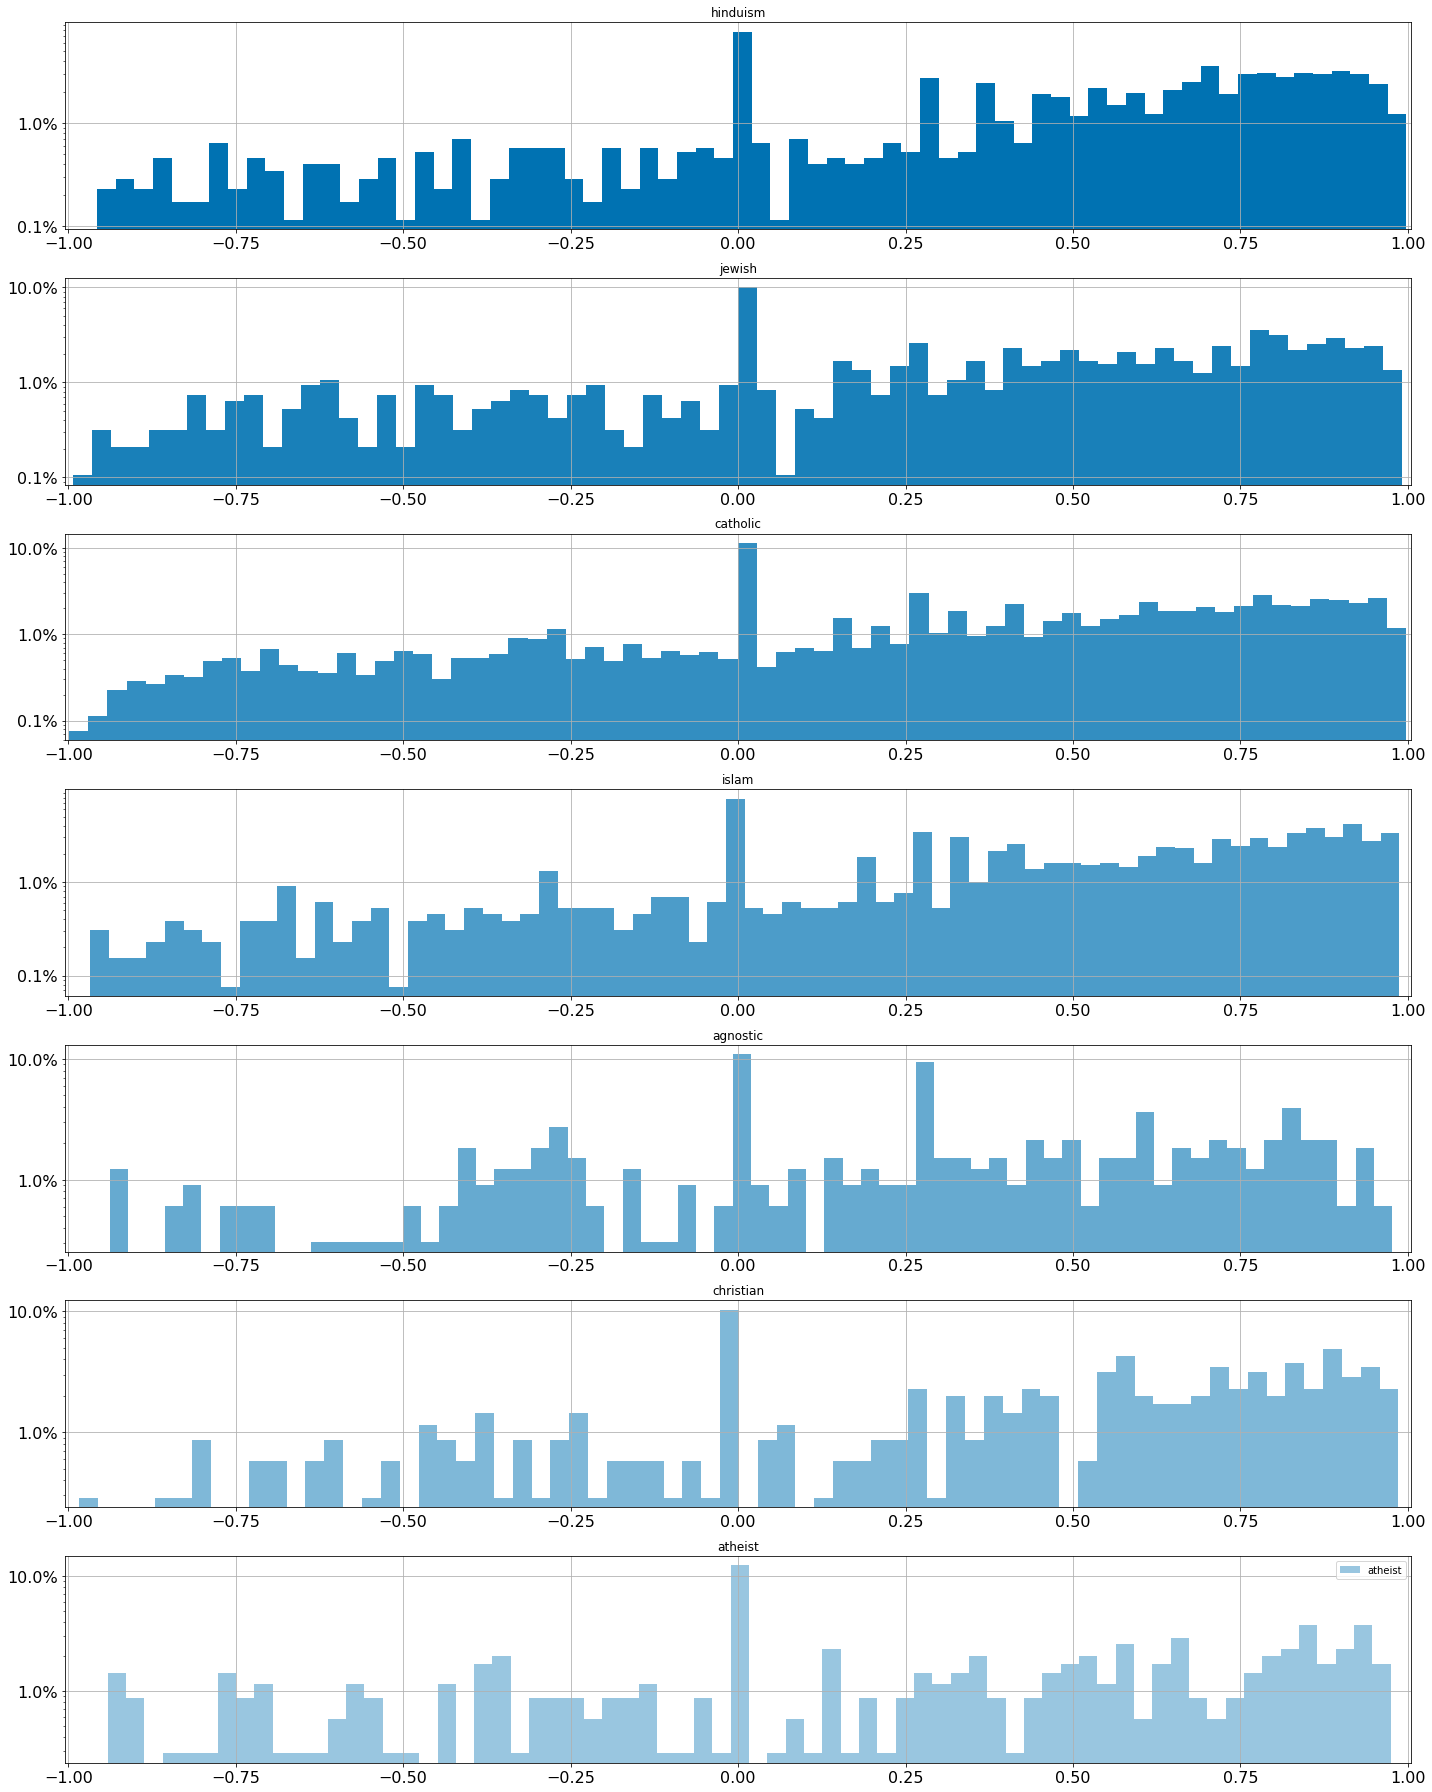

In [170]:
# Global Warming: observing distrubutions of compound score
fig, axs = plt.subplots(7,figsize=(20,25))
alpha_score = 1

for i in range(0,7):
    religion = gw_at_rel['rel'].unique()[i]
    weight = np.ones(gw_at_rel[gw_at_rel['rel'] == religion]['compound scores'].shape[0])/gw_at_rel[gw_at_rel['rel'] == religion]['compound scores'].shape[0]
    axs[i].hist(gw_at_rel[gw_at_rel['rel'] == religion]['compound scores'], alpha =alpha_score, weights = weight, bins = 70)
    axs[i].title.set_text(religion)
    alpha_score -= 0.1

    
    axs[i].grid()
    axs[i].set_yscale('log')
    axs[i].set_xlim([-1.005,1.005])
    
    # set yaxis to percentage
    axs[i].yaxis.set_major_formatter(PercentFormatter(1))

    axs[i].tick_params(axis='both', which='major', labelsize=16)
    
    # this makes the plot tight
    fig.tight_layout()
    
    
plt.legend(gi_at_rel['rel'].unique())

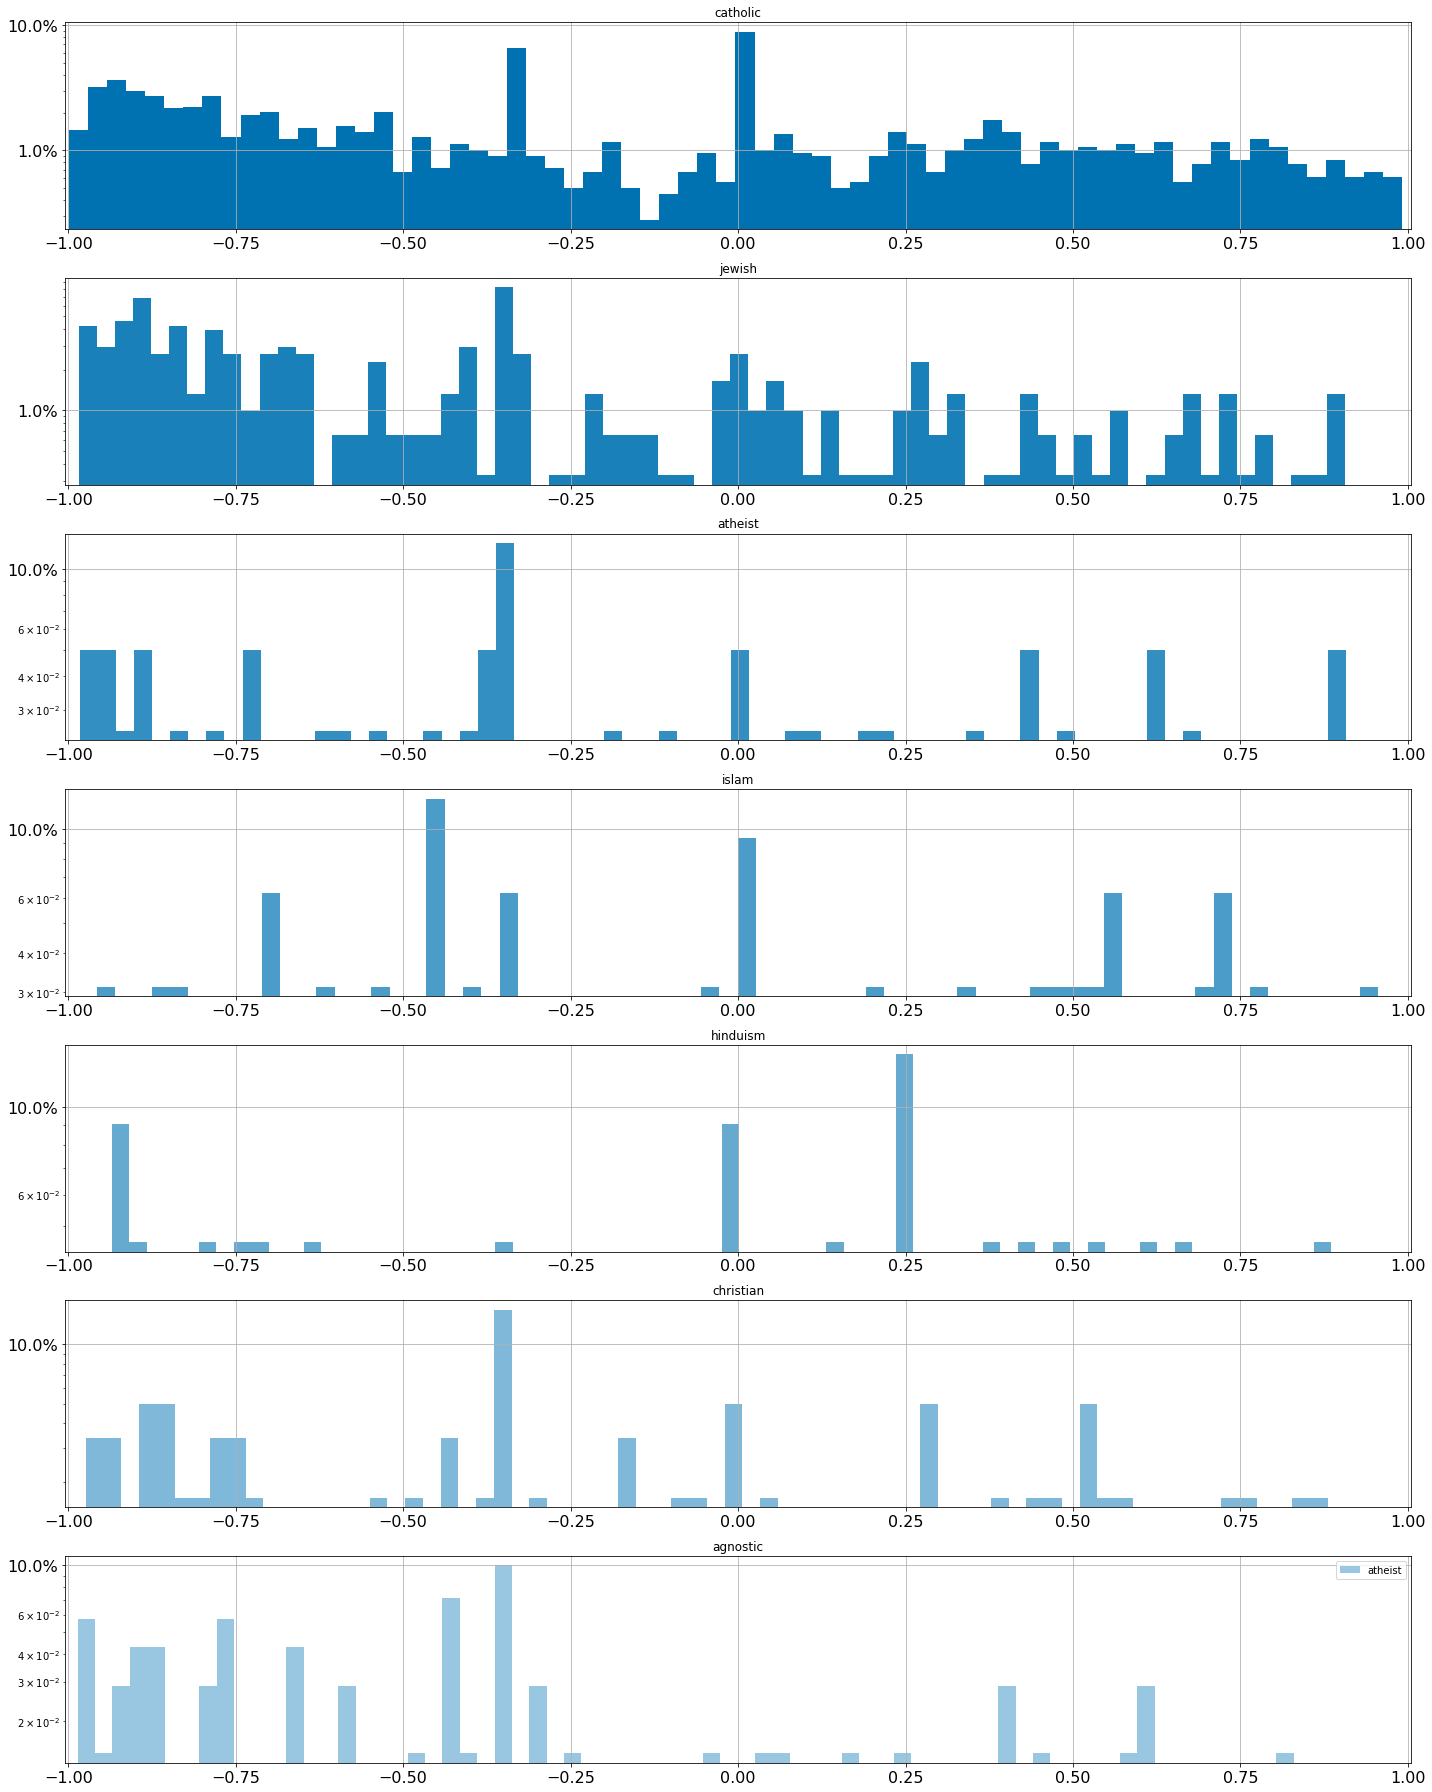

In [171]:
# Gun Control: observing distrubutions of compound score
fig, axs = plt.subplots(7,figsize=(20,25))
alpha_score = 1

for i in range(0,7):
    religion = gc_at_rel['rel'].unique()[i]
    weight = np.ones(gc_at_rel[gc_at_rel['rel'] == religion]['compound scores'].shape[0])/gc_at_rel[gc_at_rel['rel'] == religion]['compound scores'].shape[0]
    axs[i].hist(gc_at_rel[gc_at_rel['rel'] == religion]['compound scores'], alpha =alpha_score, weights = weight, bins = 70)
    axs[i].title.set_text(religion)
    alpha_score -= 0.1

    
    axs[i].grid()
    axs[i].set_yscale('log')
    axs[i].set_xlim([-1.005,1.005])
    
    # set yaxis to percentage
    axs[i].yaxis.set_major_formatter(PercentFormatter(1))

    axs[i].tick_params(axis='both', which='major', labelsize=16)
    
    # this makes the plot tight
    fig.tight_layout()
    
    
plt.legend(gi_at_rel['rel'].unique())

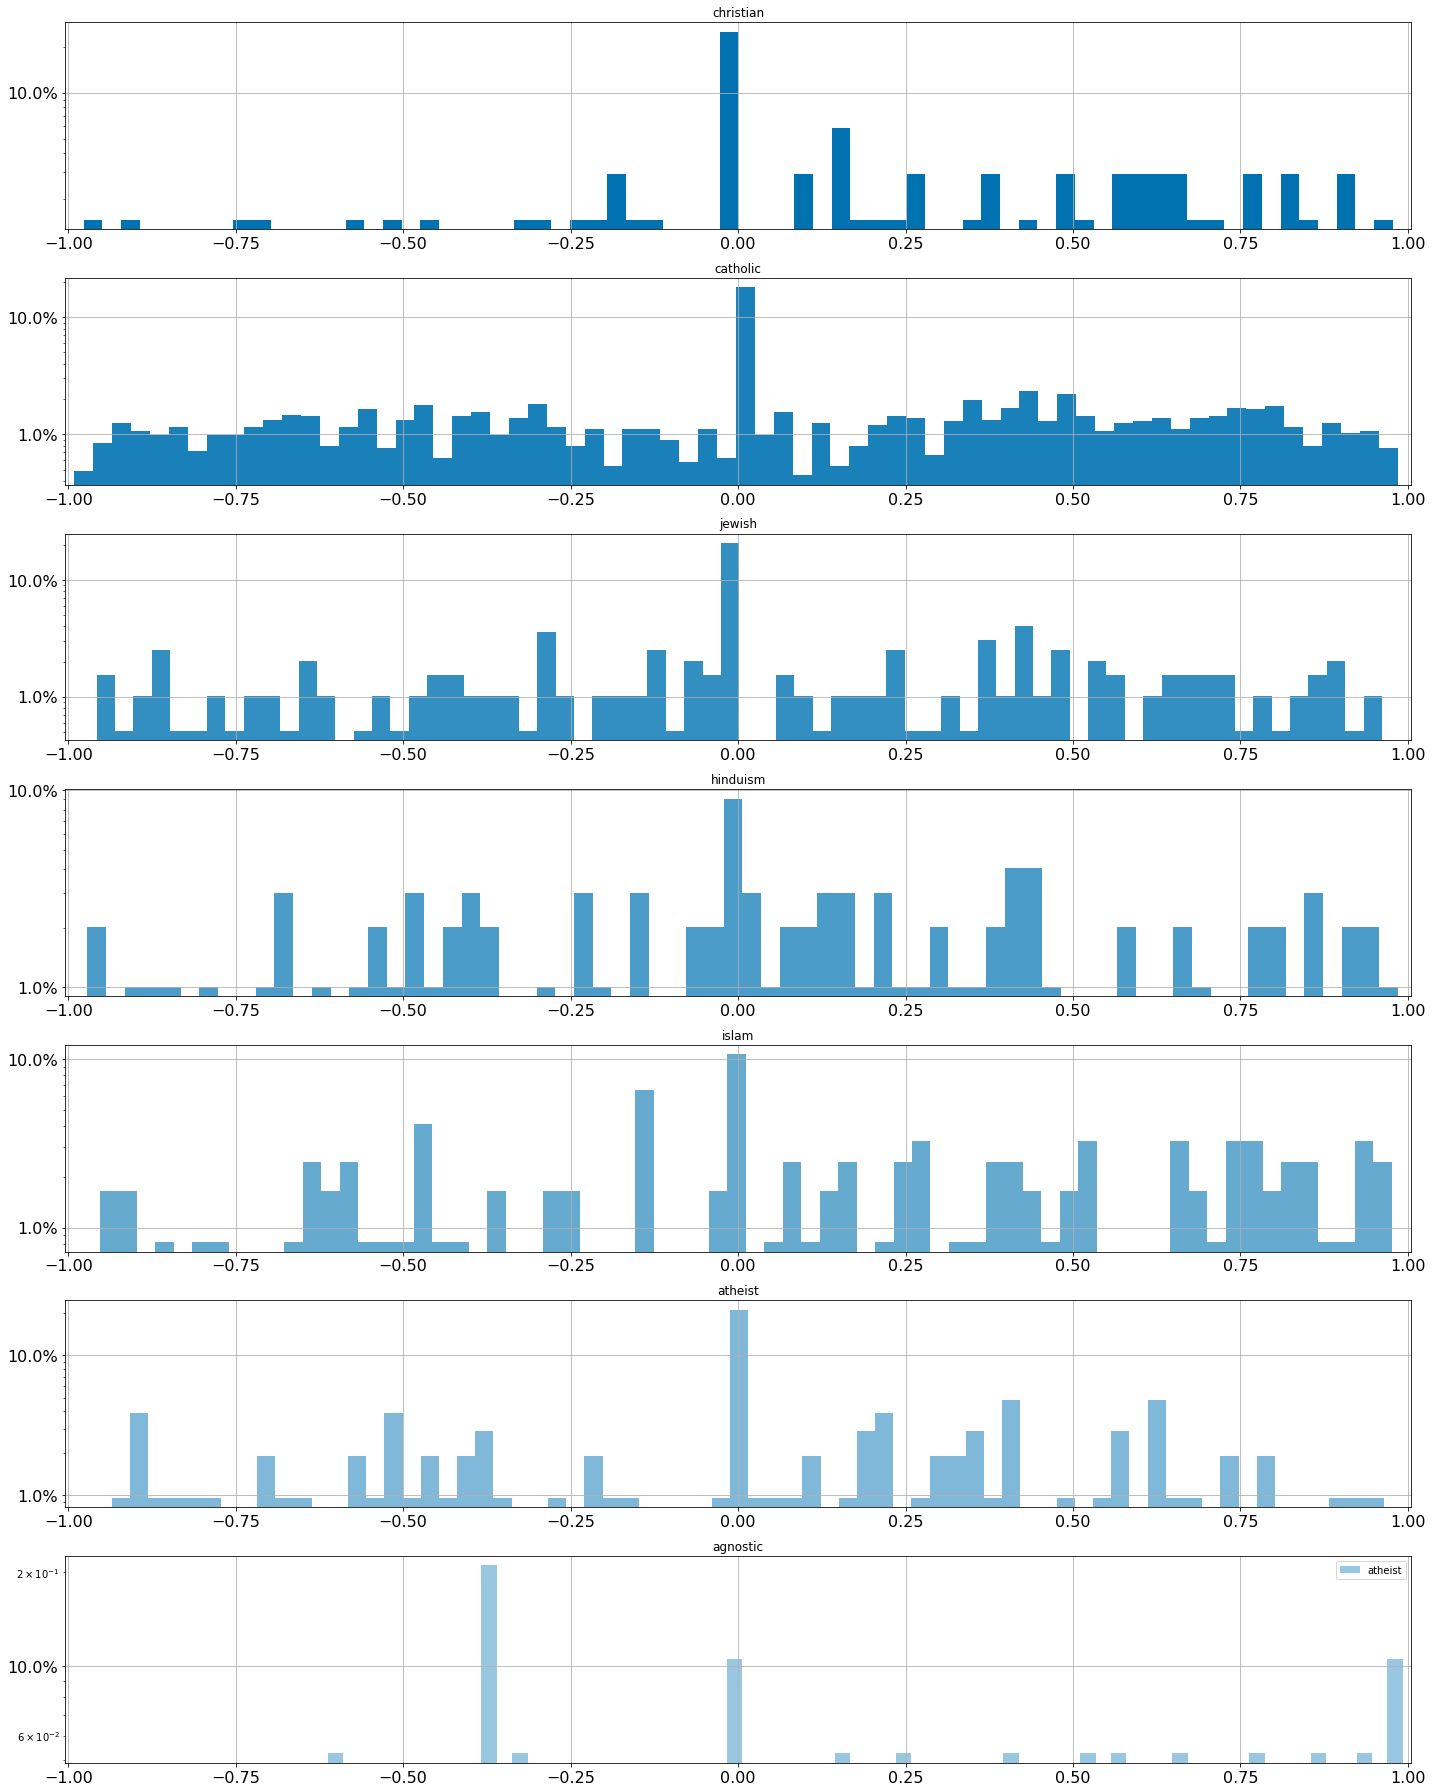

In [172]:
# Abortion: observing distrubutions of compound score
fig, axs = plt.subplots(7,figsize=(20,25))
alpha_score = 1

for i in range(0,7):
    religion = ab_at_rel['rel'].unique()[i]
    weight = np.ones(ab_at_rel[ab_at_rel['rel'] == religion]['compound scores'].shape[0])/ab_at_rel[ab_at_rel['rel'] == religion]['compound scores'].shape[0]
    axs[i].hist(ab_at_rel[ab_at_rel['rel'] == religion]['compound scores'], alpha =alpha_score, weights = weight, bins = 70)
    axs[i].title.set_text(religion)
    alpha_score -= 0.1

    
    axs[i].grid()
    axs[i].set_yscale('log')
    axs[i].set_xlim([-1.005,1.005])
    
    # set yaxis to percentage
    axs[i].yaxis.set_major_formatter(PercentFormatter(1))

    axs[i].tick_params(axis='both', which='major', labelsize=16)
    
    # this makes the plot tight
    fig.tight_layout()
    
    
plt.legend(gi_at_rel['rel'].unique())

### Nationality

In [173]:
gi_at_nat.head()
gi_at_nat['nation'].unique()

array(['USA', 'Australia', 'None', 'Canada', 'UK', 'Ireland', 'Germany',
       'New Zeland', 'India'], dtype=object)

C:\Users\tihon\AppData\Local\Temp/ipykernel_5452/577394484.py:14: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  axs[i].set_ylim([0, 10**3])


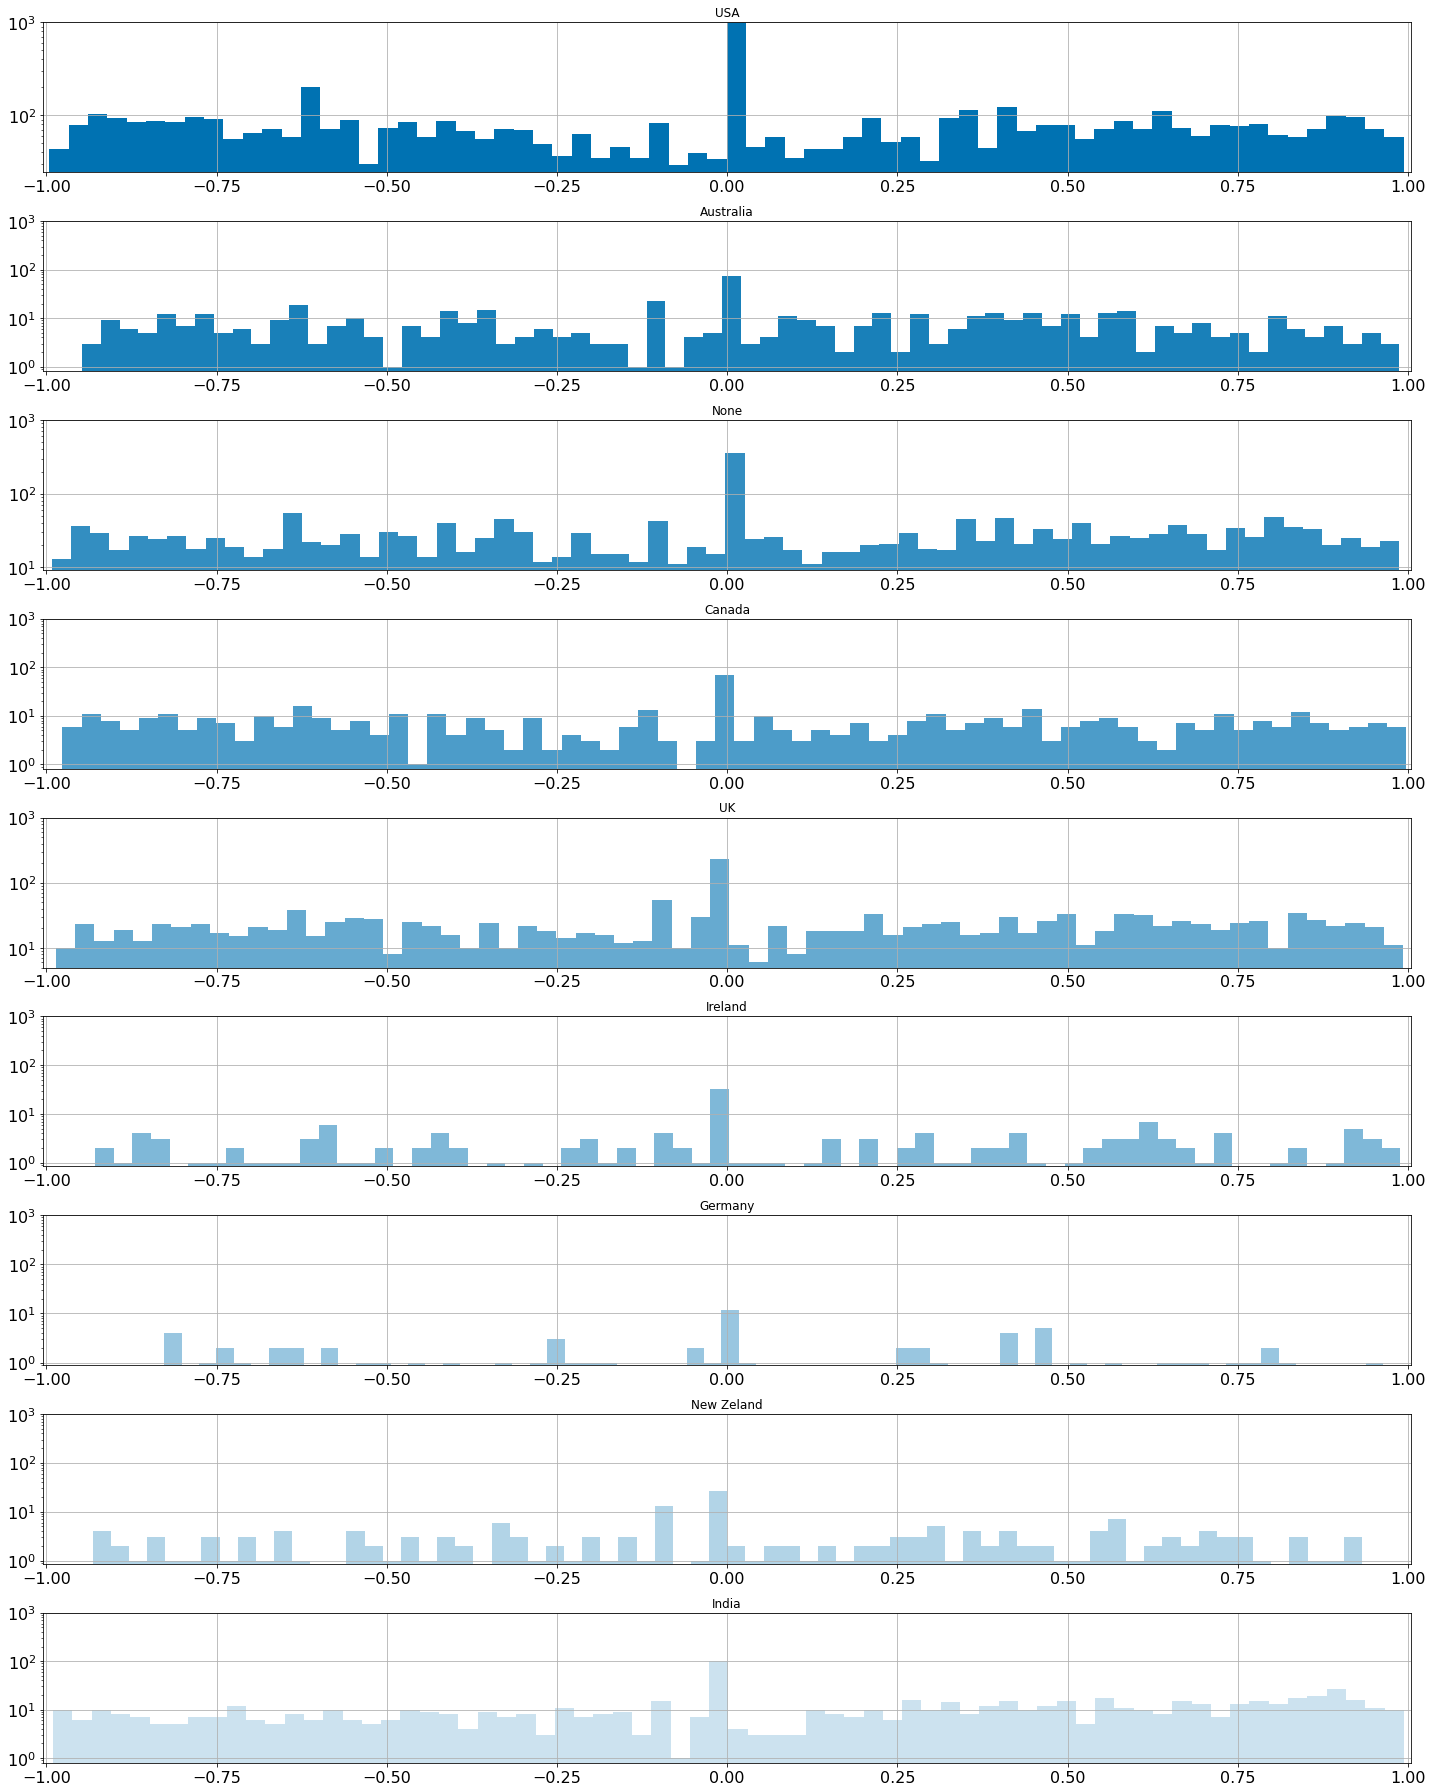

In [174]:
fig, axs = plt.subplots(9,figsize=(20,25))
alpha_score = 1

for i in range(0,9):
    nation = gi_at_nat['nation'].unique()[i]
    weight = np.ones(gi_at_nat[gi_at_nat['nation'] == nation]['compound scores'].shape[0])/gi_at_nat[gi_at_nat['nation'] == nation]['compound scores'].shape[0]
    axs[i].hist(gi_at_nat[gi_at_nat['nation'] == nation]['compound scores'], alpha =alpha_score,  bins = 70)
    axs[i].title.set_text(nation)
    alpha_score -= 0.1
    
    axs[i].grid()
    axs[i].set_yscale('log')
    axs[i].set_xlim([-1.005,1.005])
    axs[i].set_ylim([0, 10**3])
    
    # set yaxis to percentage
   # axs[i].yaxis.set_major_formatter(PercentFormatter(1))

    axs[i].tick_params(axis='both', which='major', labelsize=16)
    
    # this makes the plot tight
    fig.tight_layout()

C:\Users\tihon\AppData\Local\Temp/ipykernel_5452/264008967.py:14: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  axs[i].set_ylim([0, 10**4])


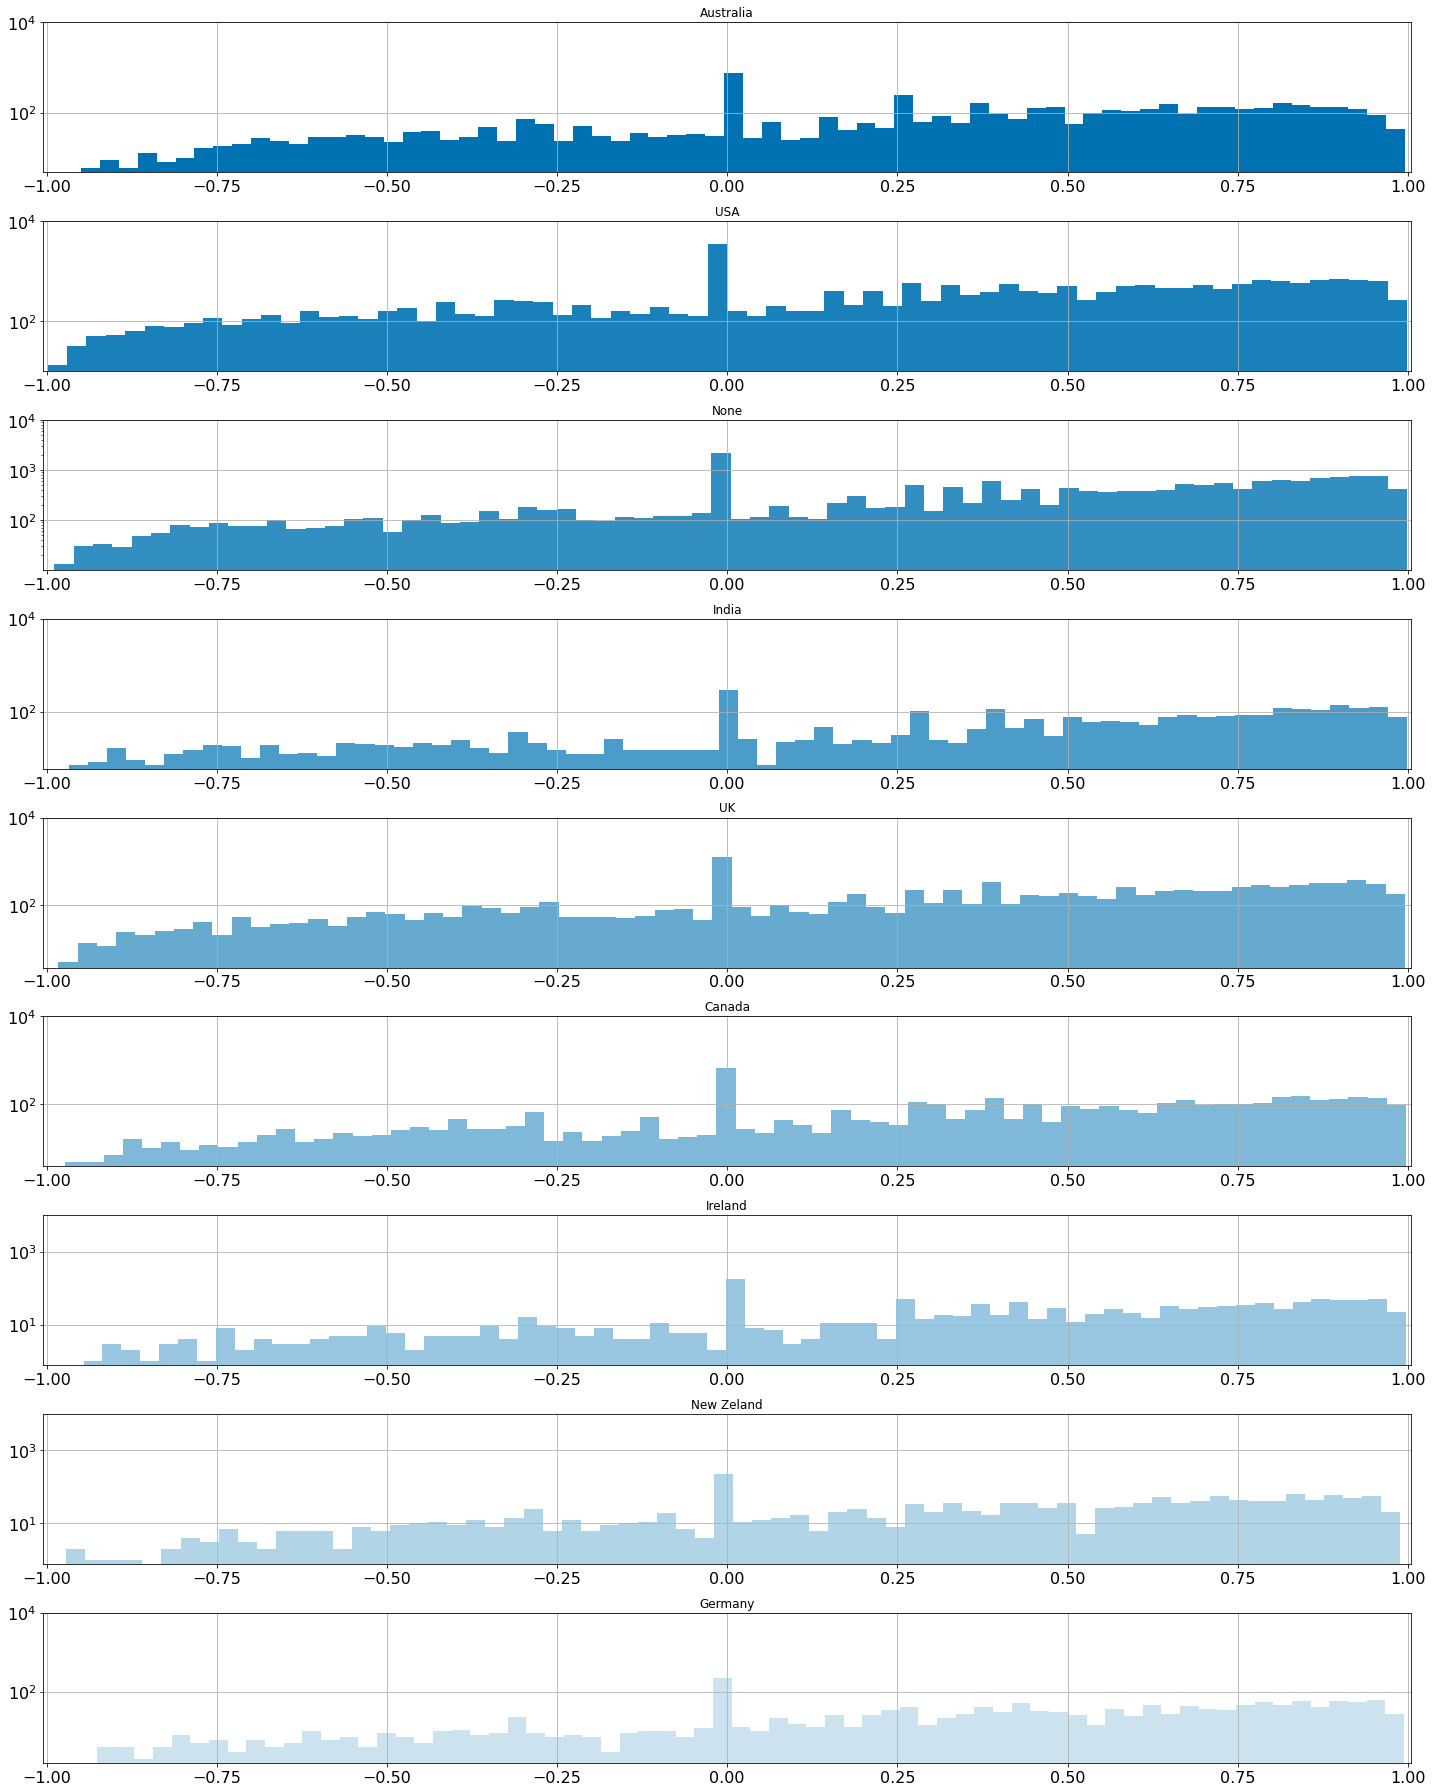

In [175]:
fig, axs = plt.subplots(9,figsize=(20,25))
alpha_score = 1

for i in range(0,9):
    nation = gw_at_nat['nation'].unique()[i]
    weight = np.ones(gw_at_nat[gw_at_nat['nation'] == nation]['compound scores'].shape[0])/gw_at_nat[gw_at_nat['nation'] == nation]['compound scores'].shape[0]
    axs[i].hist(gw_at_nat[gw_at_nat['nation'] == nation]['compound scores'], alpha =alpha_score,  bins = 70)
    axs[i].title.set_text(nation)
    alpha_score -= 0.1
    
    axs[i].grid()
    axs[i].set_yscale('log')
    axs[i].set_xlim([-1.005,1.005])
    axs[i].set_ylim([0, 10**4])
    
    # set yaxis to percentage
   # axs[i].yaxis.set_major_formatter(PercentFormatter(1))

    axs[i].tick_params(axis='both', which='major', labelsize=16)
    
    # this makes the plot tight
    fig.tight_layout()

C:\Users\tihon\AppData\Local\Temp/ipykernel_5452/1189315360.py:14: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  axs[i].set_ylim([0, 10**3])


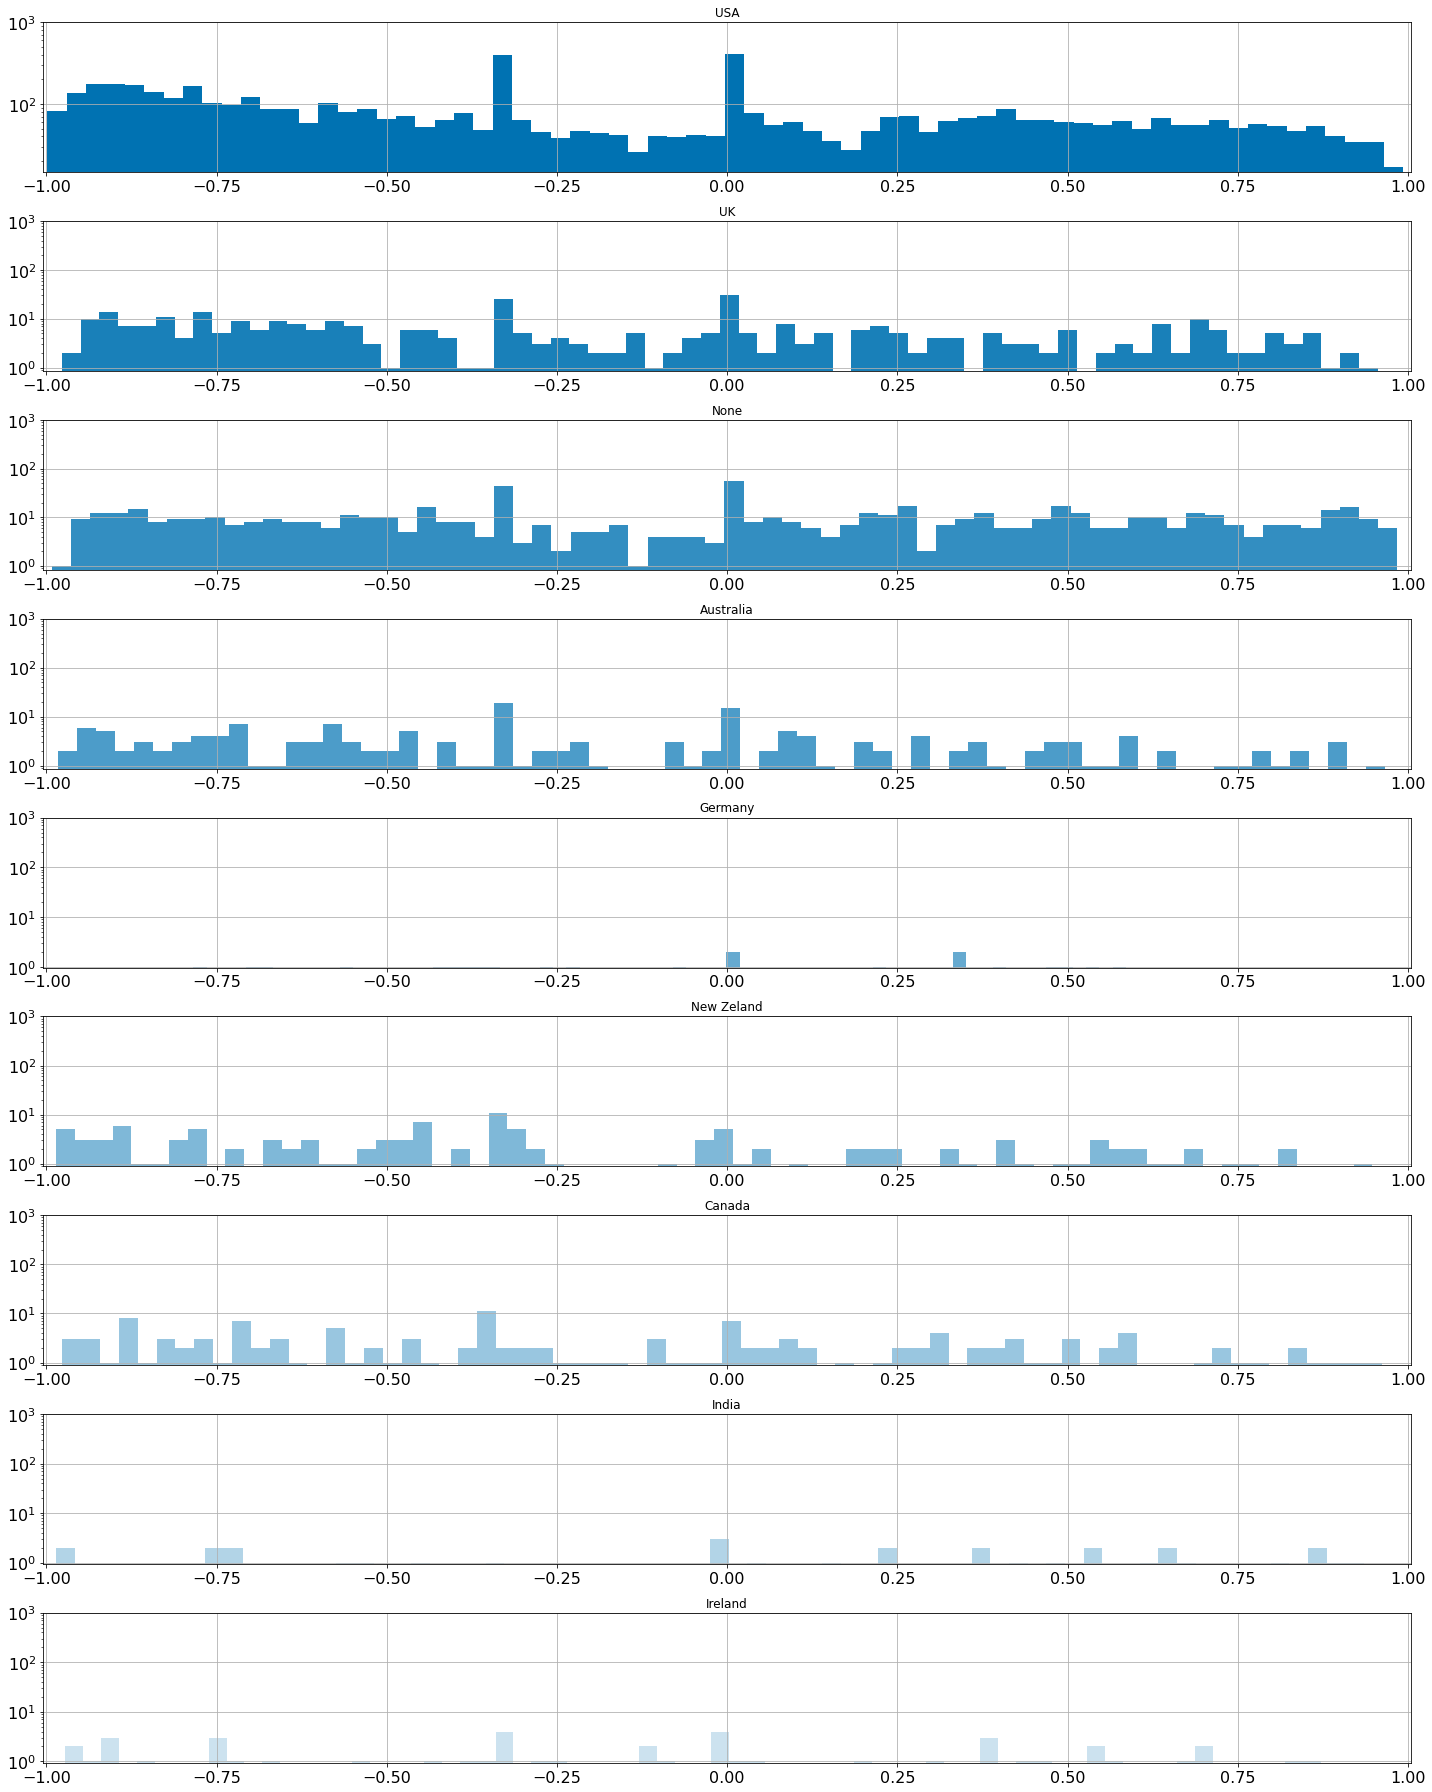

In [176]:
fig, axs = plt.subplots(9,figsize=(20,25))
alpha_score = 1

for i in range(0,9):
    nation = gc_at_nat['nation'].unique()[i]
    weight = np.ones(gc_at_nat[gc_at_nat['nation'] == nation]['compound scores'].shape[0])/gc_at_nat[gc_at_nat['nation'] == nation]['compound scores'].shape[0]
    axs[i].hist(gc_at_nat[gc_at_nat['nation'] == nation]['compound scores'], alpha =alpha_score,  bins = 70)
    axs[i].title.set_text(nation)
    alpha_score -= 0.1
    
    axs[i].grid()
    axs[i].set_yscale('log')
    axs[i].set_xlim([-1.005,1.005])
    axs[i].set_ylim([0, 10**3])
    
    # set yaxis to percentage
   # axs[i].yaxis.set_major_formatter(PercentFormatter(1))

    axs[i].tick_params(axis='both', which='major', labelsize=16)
    
    # this makes the plot tight
    fig.tight_layout()

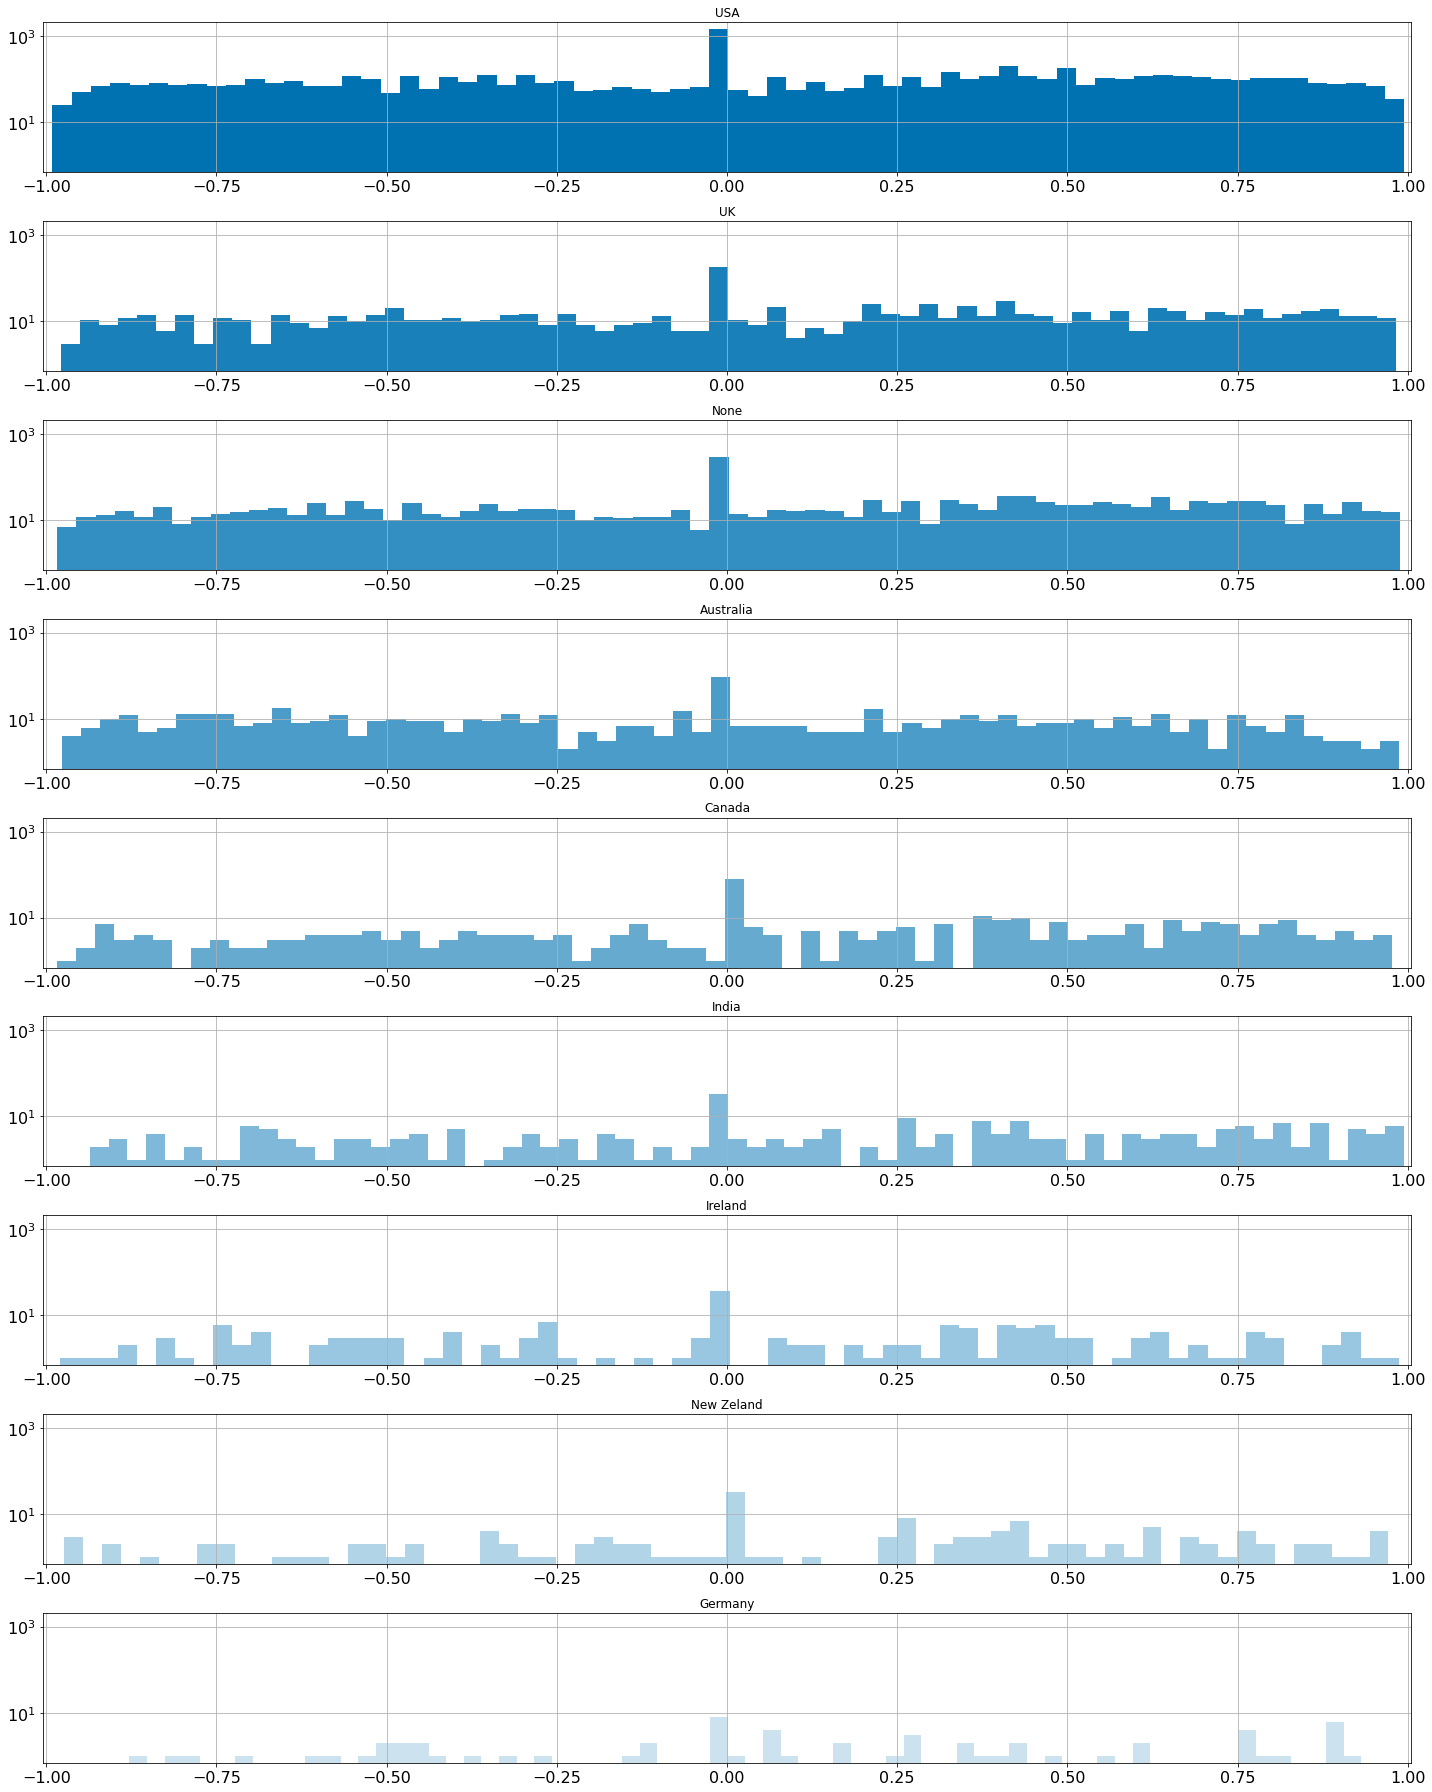

In [177]:
fig, axs = plt.subplots(9,figsize=(20,25), sharey = True)
alpha_score = 1

for i in range(0,9):
    nation = ab_at_nat['nation'].unique()[i]
    weight = np.ones(ab_at_nat[ab_at_nat['nation'] == nation]['compound scores'].shape[0])/ab_at_nat[ab_at_nat['nation'] == nation]['compound scores'].shape[0]
    axs[i].hist(ab_at_nat[ab_at_nat['nation'] == nation]['compound scores'], alpha =alpha_score,  bins = 70)
    axs[i].title.set_text(nation)
    alpha_score -= 0.1
    
    axs[i].grid()
    axs[i].set_yscale('log')
    axs[i].set_xlim([-1.005,1.005])

    
    # set yaxis to percentage
   # axs[i].yaxis.set_major_formatter(PercentFormatter(1))

    axs[i].tick_params(axis='both', which='major', labelsize=16)
    
    # this makes the plot tight
    fig.tight_layout()

### Education

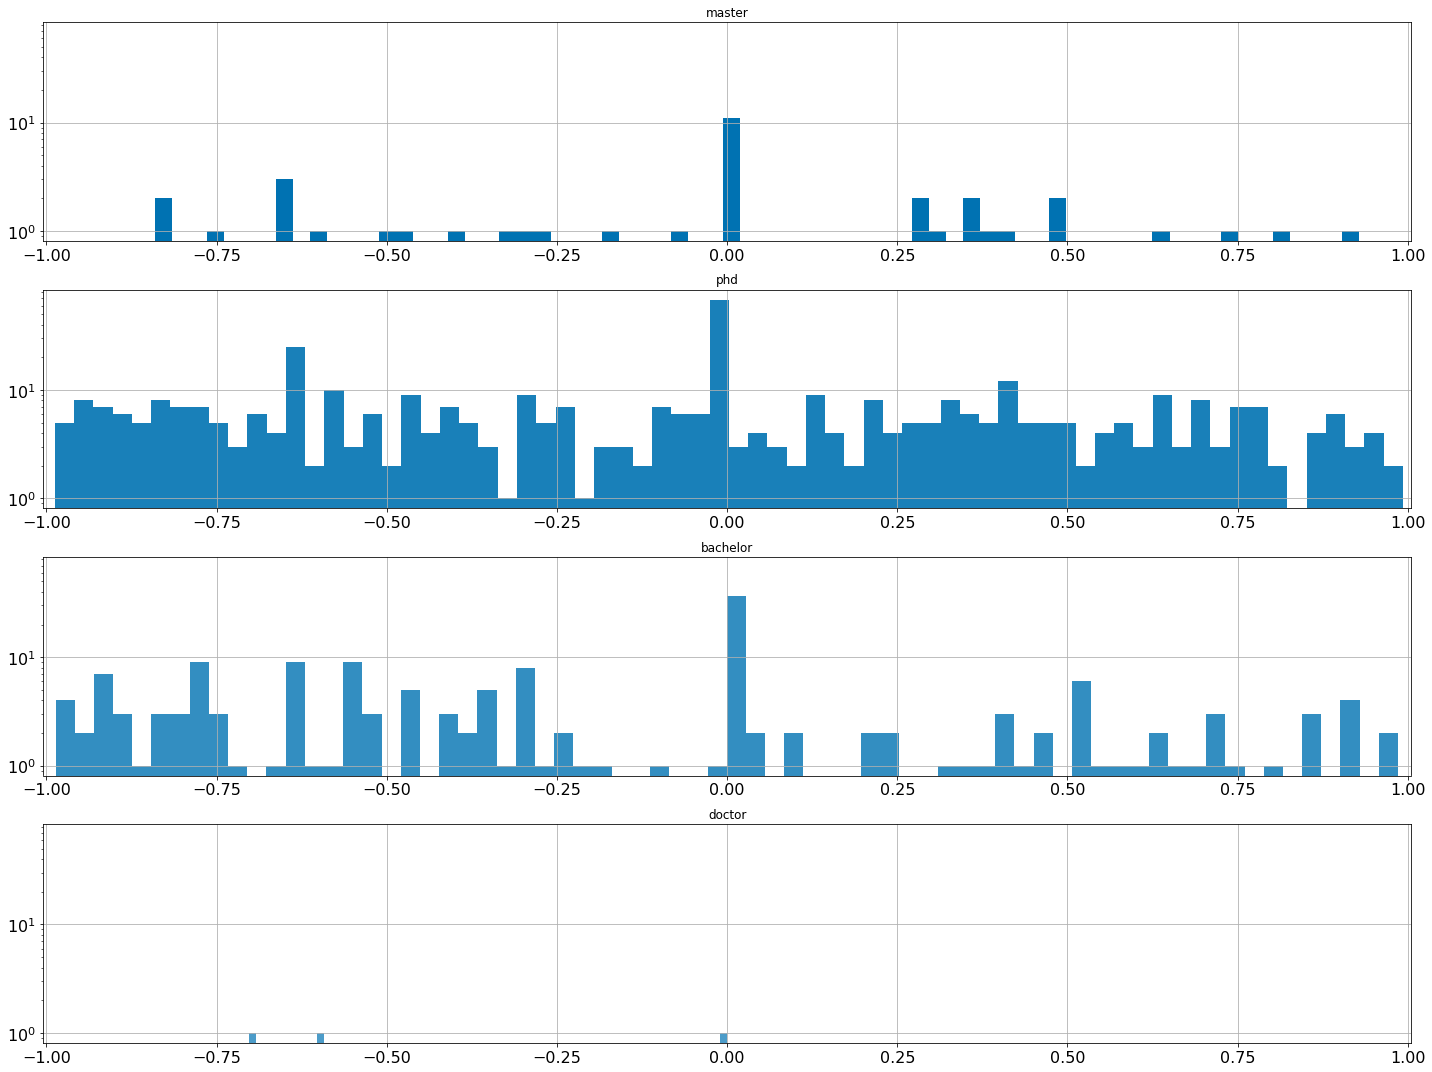

In [269]:

fig, axs = plt.subplots(4,figsize=(20,15), sharey = True)
alpha_score = 1

for i in range(0,4):
    degree = gi_at_deg['degree'].unique()[i]
    weight = np.ones(gi_at_deg[gi_at_deg['degree'] == degree]['compound scores'].shape[0])/gi_at_deg[gi_at_deg['degree'] == degree]['compound scores'].shape[0]
    axs[i].hist(gi_at_deg[gi_at_deg['degree'] == degree]['compound scores'], alpha =alpha_score,  bins = 70)
    axs[i].title.set_text(degree)
    alpha_score -= 0.1
    
    axs[i].grid()
    axs[i].set_yscale('log')
    axs[i].set_xlim([-1.005,1.005])
   # axs[i].set_ylim([0, 10**])
    
    # set yaxis to percentage
   # axs[i].yaxis.set_major_formatter(PercentFormatter(1))

    axs[i].tick_params(axis='both', which='major', labelsize=16)
    
    # this makes the plot tight
    fig.tight_layout()

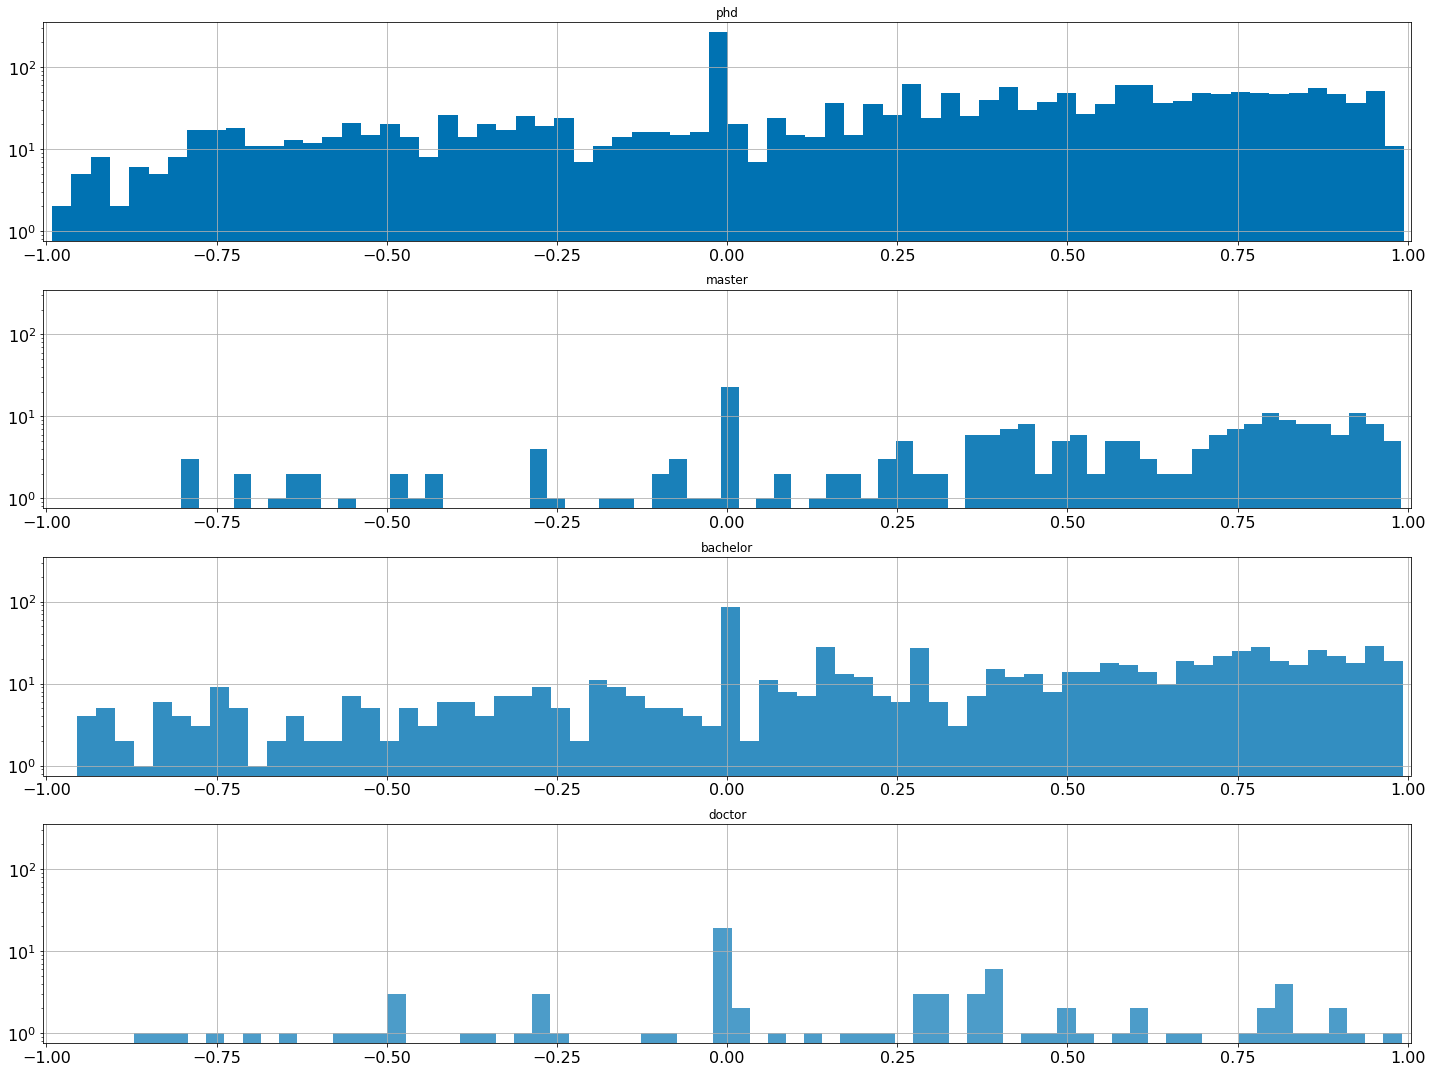

In [268]:
fig, axs = plt.subplots(4,figsize=(20,15), sharey = True)
alpha_score = 1

for i in range(0,4):
    degree = gw_at_deg['degree'].unique()[i]
    weight = np.ones(gw_at_deg[gw_at_deg['degree'] == degree]['compound scores'].shape[0])/gw_at_deg[gw_at_deg['degree'] == degree]['compound scores'].shape[0]
    axs[i].hist(gw_at_deg[gw_at_deg['degree'] == degree]['compound scores'], alpha =alpha_score,  bins = 70)
    axs[i].title.set_text(degree)
    alpha_score -= 0.1
    
    axs[i].grid()
    axs[i].set_yscale('log')
    axs[i].set_xlim([-1.005,1.005])
   # axs[i].set_ylim([0, 10**])
    
    # set yaxis to percentage
   # axs[i].yaxis.set_major_formatter(PercentFormatter(1))

    axs[i].tick_params(axis='both', which='major', labelsize=16)
    
    # this makes the plot tight
    fig.tight_layout()

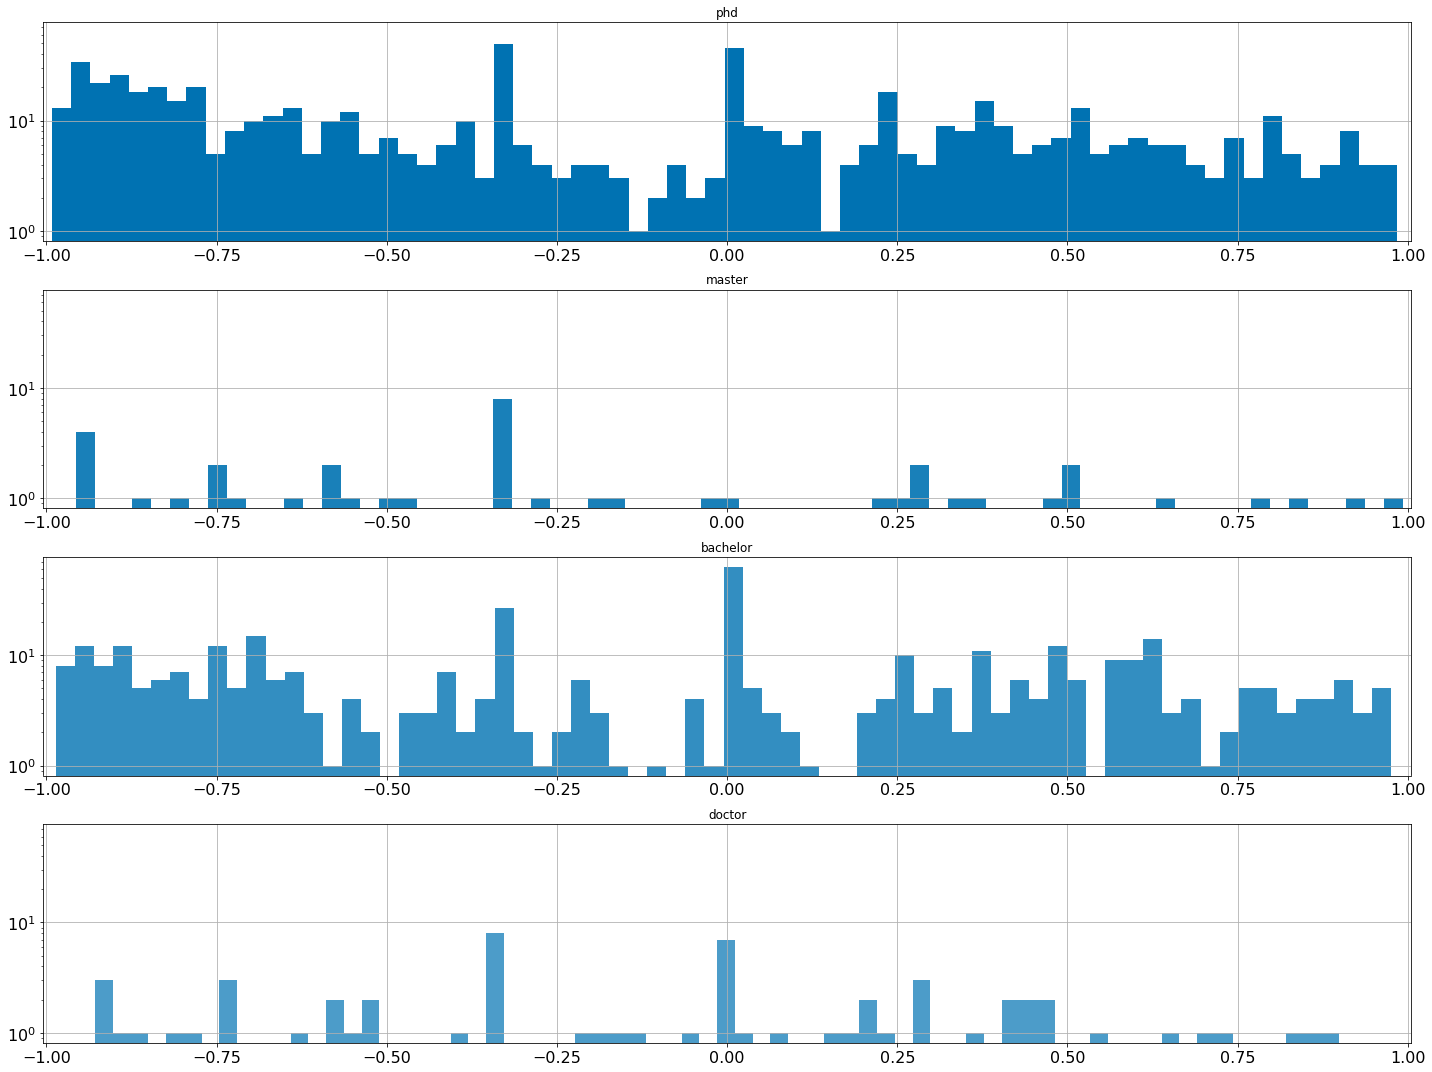

In [271]:

fig, axs = plt.subplots(4,figsize=(20,15), sharey = True)
alpha_score = 1

for i in range(0,4):
    degree = gc_at_deg['degree'].unique()[i]
    weight = np.ones(gc_at_deg[gc_at_deg['degree'] == degree]['compound scores'].shape[0])/gc_at_deg[gc_at_deg['degree'] == degree]['compound scores'].shape[0]
    axs[i].hist(gc_at_deg[gc_at_deg['degree'] == degree]['compound scores'], alpha =alpha_score,  bins = 70)
    axs[i].title.set_text(degree)
    alpha_score -= 0.1
    
    axs[i].grid()
    axs[i].set_yscale('log')
    axs[i].set_xlim([-1.005,1.005])
   # axs[i].set_ylim([0, 10**])
    
    # set yaxis to percentage
   # axs[i].yaxis.set_major_formatter(PercentFormatter(1))

    axs[i].tick_params(axis='both', which='major', labelsize=16)
    
    # this makes the plot tight
    fig.tight_layout()

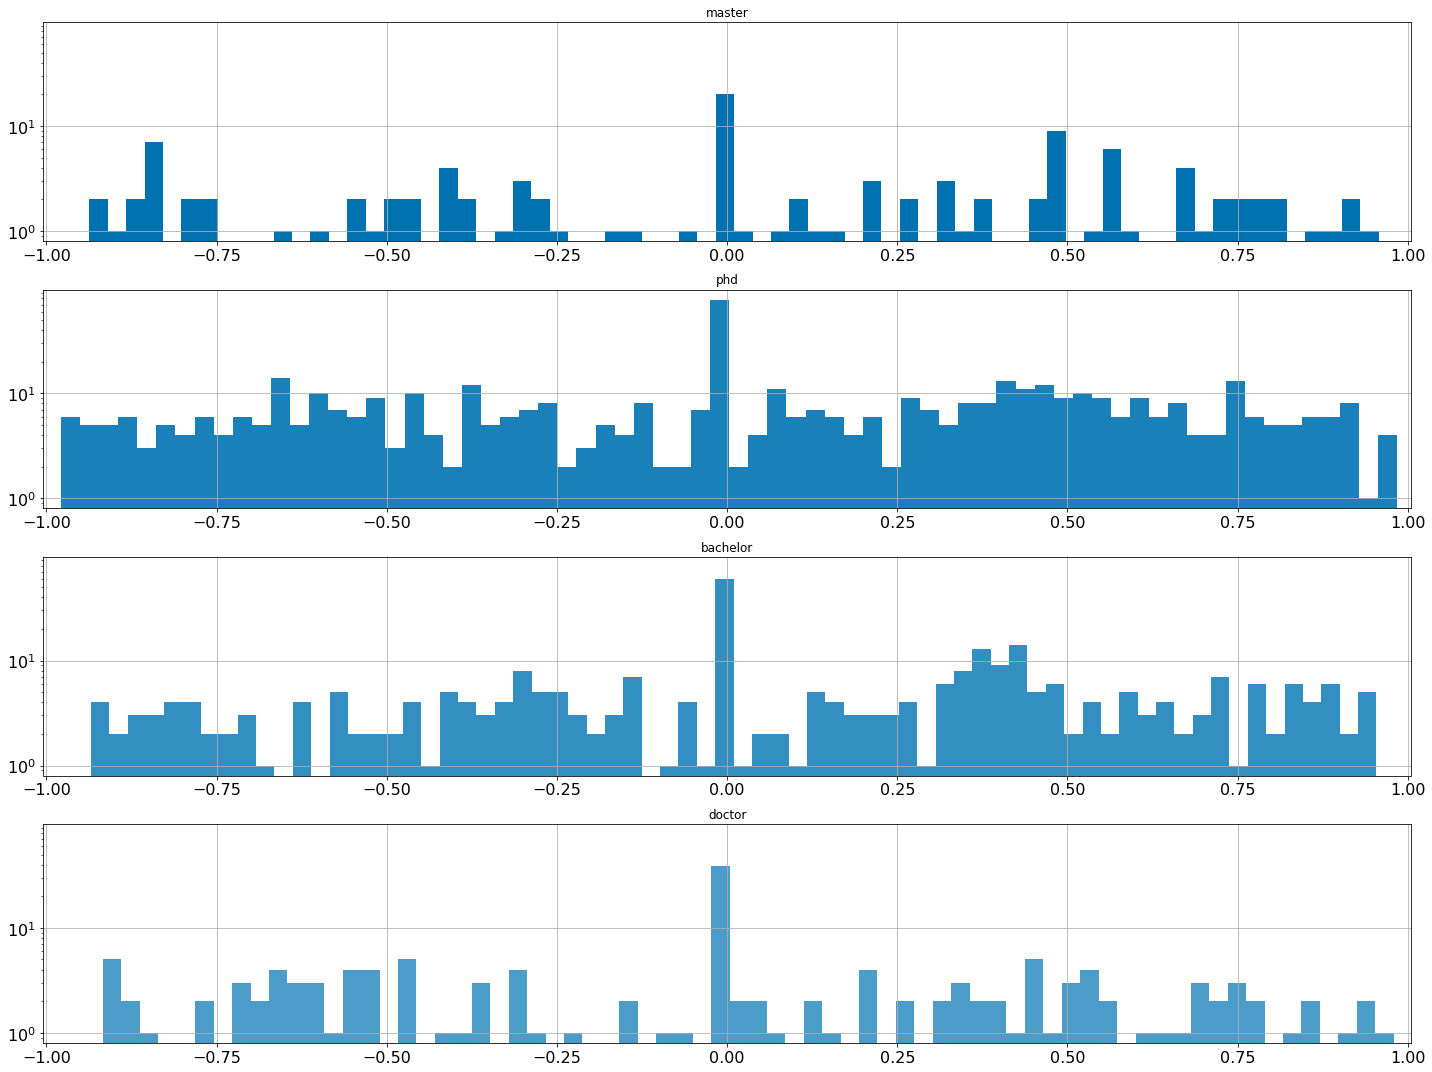

In [272]:

fig, axs = plt.subplots(4,figsize=(20,15), sharey = True)
alpha_score = 1

for i in range(0,4):
    degree = ab_at_deg['degree'].unique()[i]
    weight = np.ones(ab_at_deg[ab_at_deg['degree'] == degree]['compound scores'].shape[0])/ab_at_deg[ab_at_deg['degree'] == degree]['compound scores'].shape[0]
    axs[i].hist(ab_at_deg[ab_at_deg['degree'] == degree]['compound scores'], alpha =alpha_score,  bins = 70)
    axs[i].title.set_text(degree)
    alpha_score -= 0.1
    
    axs[i].grid()
    axs[i].set_yscale('log')
    axs[i].set_xlim([-1.005,1.005])
   # axs[i].set_ylim([0, 10**])
    
    # set yaxis to percentage
   # axs[i].yaxis.set_major_formatter(PercentFormatter(1))

    axs[i].tick_params(axis='both', which='major', labelsize=16)
    
    # this makes the plot tight
    fig.tight_layout()

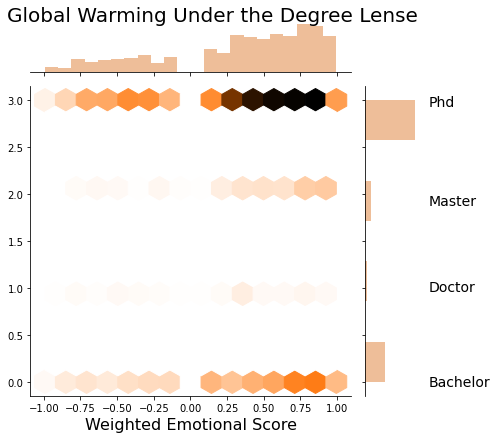

In [900]:
# econode the degree attributes to numbers to be able to plot

enc = LabelEncoder()
enc.fit( gw_at_deg['degree'])
degrees_num= enc.transform( gw_at_deg[np.abs(gw_at_deg['compound scores'] ) >=0.1]['degree'])

g=sns.jointplot(gw_at_deg[np.abs(gw_at_deg['compound scores'] ) >=0.1]['compound scores'],degrees_num, kind="hex", color = 'C2')           
g.ax_joint.set_xlabel('Weighted Emotional Score', fontsize=16)                        

# include the proper labels on the right of the graphs since jointplots do not allow us to change the ylabels
g.fig.text( 1, 0.78,'Phd', fontsize=14)
g.fig.text( 1, 0.55,'Master', fontsize=14)
g.fig.text( 1, 0.35,'Doctor', fontsize=14)
g.fig.text( 1, 0.13,'Bachelor', fontsize=14)

g.fig.tight_layout()
g.fig.suptitle('Global Warming Under the Degree Lens', y = 1.01,fontsize = 20)

None

# save
g.savefig('Figures/gw_deg.jpeg', dpi = 200)
g.savefig('Figures/gw_deg.pdf')



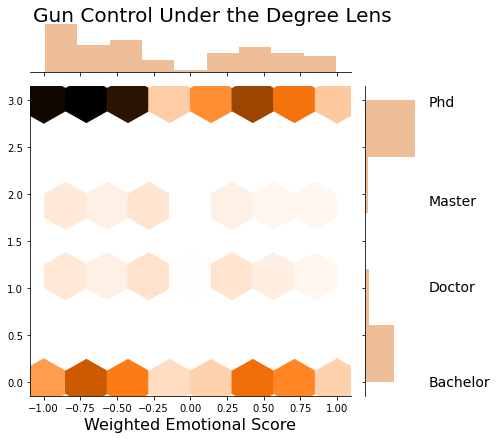

In [901]:
# econode the degree attributes to numbers to be able to plot

enc = LabelEncoder()
enc.fit( gc_at_deg['degree'])
degrees_num= enc.transform( gc_at_deg[np.abs(gc_at_deg['compound scores'] ) >=0.1]['degree'])

g=sns.jointplot(gc_at_deg[np.abs(gc_at_deg['compound scores'] ) >=0.1]['compound scores'],degrees_num, kind="hex", color = 'C2')           
g.ax_joint.set_xlabel('Weighted Emotional Score', fontsize=16)                        

# include the proper labels on the right of the graphs since jointplots do not allow us to change the ylabels
g.fig.text( 1, 0.78,'Phd', fontsize=14)
g.fig.text( 1, 0.55,'Master', fontsize=14)
g.fig.text( 1, 0.35,'Doctor', fontsize=14)
g.fig.text( 1, 0.13,'Bachelor', fontsize=14)

g.fig.tight_layout()
g.fig.suptitle('Gun Control Under the Degree Lens', y = 1.01,fontsize = 20)

None

# save
g.savefig('Figures/gc_deg.jpeg', dpi = 200)
g.savefig('Figures/gc_deg.pdf')




C:\ProgramData\Anaconda3\envs\ada\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


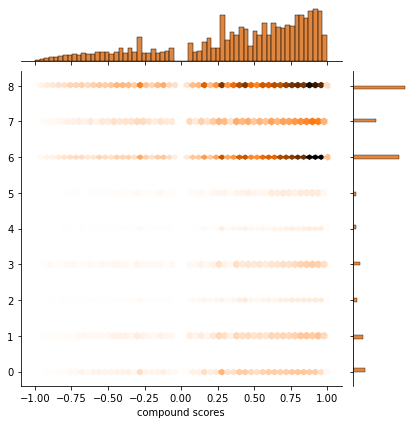

In [278]:
# econode the degree attributes to numbers to be able to plot

enc = LabelEncoder()
enc.fit( gi_at_deg['degree'])
degrees_num= enc.transform( gi_at_deg[np.abs(gi_at_deg['compound scores'] ) >=0.1]['degree'])

g=sns.jointplot(gi_at_deg[np.abs(gi_at_deg['compound scores'] ) >=0.1]['compound scores'],degrees_num, kind="hex", color = 'C2')           
g.ax_joint.set_xlabel('Weighted Emotional Score', fontsize=16)                        

# include the proper labels on the right of the graphs since jointplots do not allow us to change the ylabels
g.fig.text( 1, 0.78,'Phd', fontsize=14)
g.fig.text( 1, 0.55,'Master', fontsize=14)
g.fig.text( 1, 0.35,'Doctor', fontsize=14)
g.fig.text( 1, 0.13,'Bachelor', fontsize=14)

g.fig.tight_layout()
g.fig.suptitle('Gender Inequality Under the Degree Lens', y = 1.01,fontsize = 20)

None

# save
g.savefig('Figures/gi_deg.jpeg', dpi = 200)
g.savefig('Figures/gi_deg.pdf')


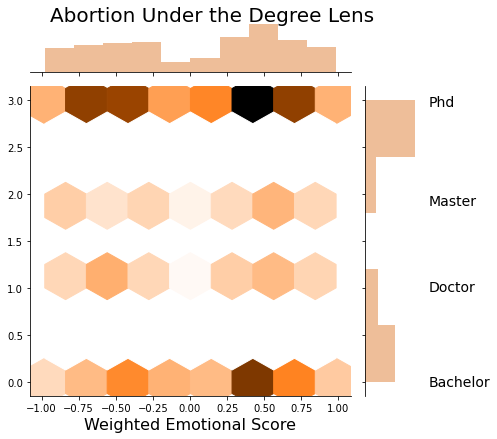

In [902]:
# econode the degree attributes to numbers to be able to plot

enc = LabelEncoder()
enc.fit( ab_at_deg['degree'])
degrees_num= enc.transform( ab_at_deg[np.abs(ab_at_deg['compound scores'] ) >=0.1]['degree'])

g=sns.jointplot(ab_at_deg[np.abs(ab_at_deg['compound scores'] ) >=0.1]['compound scores'],degrees_num, kind="hex", color = 'C2')           
g.ax_joint.set_xlabel('Weighted Emotional Score', fontsize=16)                        

# include the proper labels on the right of the graphs since jointplots do not allow us to change the ylabels
g.fig.text( 1, 0.78,'Phd', fontsize=14)
g.fig.text( 1, 0.55,'Master', fontsize=14)
g.fig.text( 1, 0.35,'Doctor', fontsize=14)
g.fig.text( 1, 0.13,'Bachelor', fontsize=14)

g.fig.tight_layout()
g.fig.suptitle('Abortion Under the Degree Lens', y = 1.01,fontsize = 20)

None

g.savefig('Figures/ab_deg.jpeg', dpi = 200)
g.savefig('Figures/ab_deg.pdf')



### Under the religion lens

Text(0.5, 1.01, 'Global Warming Under the Religion Lens')

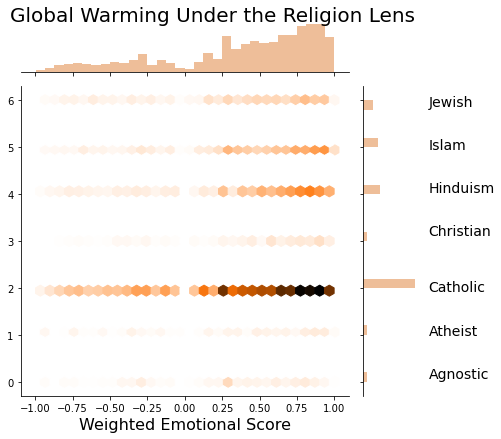

In [905]:

enc = LabelEncoder()
enc.fit( gw_at_rel['rel'])
rel_num= enc.transform( gw_at_rel[np.abs(gw_at_rel['compound scores'] ) >=0.05]['rel'])


g=sns.jointplot(gw_at_rel[np.abs(gw_at_rel['compound scores'] ) >=0.05]['compound scores'], rel_num, kind="hex", color = 'C2', alpha = 1)
g.ax_joint.set_xlabel('Weighted Emotional Score', fontsize=16) 
 
g.fig.text( 1, 0.78,'Jewish', fontsize=14)
g.fig.text( 1, 0.68,'Islam', fontsize=14)
g.fig.text( 1, 0.58,'Hinduism', fontsize=14)
g.fig.text( 1, 0.48,'Christian', fontsize=14)
g.fig.text( 1, 0.35,'Catholic', fontsize=14)
g.fig.text( 1, 0.25,'Atheist', fontsize=14)
g.fig.text( 1, 0.15,'Agnostic', fontsize=14)
g.fig.tight_layout()
g.fig.suptitle('Global Warming Under the Religion Lens', y = 1.01,fontsize = 20)

g.savefig('Figures/gw_rel.jpeg', dpi = 200)
g.savefig('Figures/gw_rel.pdf')
              

Text(0.5, 1.01, 'Gun Control Under the Religion Lens')

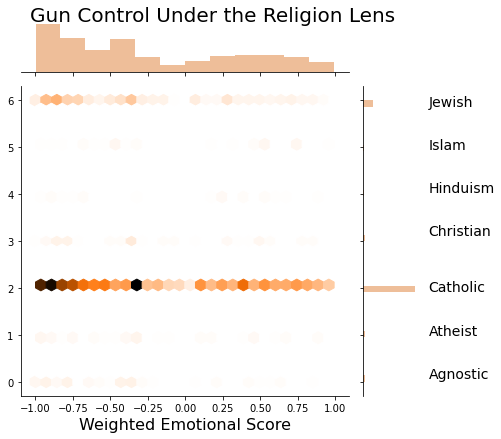

In [906]:
enc = LabelEncoder()
enc.fit( gc_at_rel['rel'])
rel_num= enc.transform( gc_at_rel[np.abs(gc_at_rel['compound scores'] ) >=0.05]['rel'])


g=sns.jointplot(gc_at_rel[np.abs(gc_at_rel['compound scores'] ) >=0.05]['compound scores'], rel_num, kind="hex", color = 'C2', alpha = 1)
g.ax_joint.set_xlabel('Weighted Emotional Score', fontsize=16) 
 
g.fig.text( 1, 0.78,'Jewish', fontsize=14)
g.fig.text( 1, 0.68,'Islam', fontsize=14)
g.fig.text( 1, 0.58,'Hinduism', fontsize=14)
g.fig.text( 1, 0.48,'Christian', fontsize=14)
g.fig.text( 1, 0.35,'Catholic', fontsize=14)
g.fig.text( 1, 0.25,'Atheist', fontsize=14)
g.fig.text( 1, 0.15,'Agnostic', fontsize=14)
g.fig.tight_layout()
g.fig.suptitle('Gun Control Under the Religion Lens', y = 1.01,fontsize = 20)

g.savefig('gc_rel.jpeg', dpi = 200)
g.savefig('gc_rel.pdf')
              

Text(0.5, 1.01, 'Gender Inequality Under the Religion Lens')

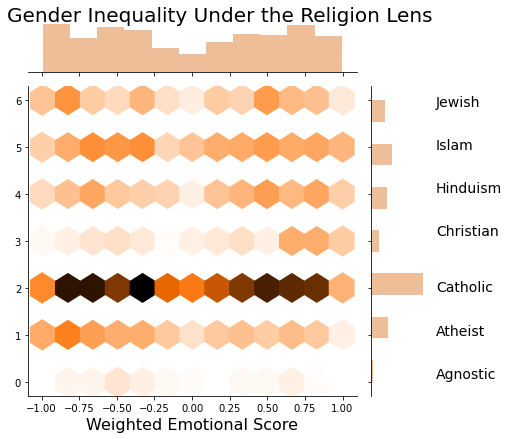

In [907]:
enc = LabelEncoder()
enc.fit( gi_at_rel['rel'])
rel_num= enc.transform( gi_at_rel[np.abs(gi_at_rel['compound scores'] ) >=0.05]['rel'])


g=sns.jointplot(gi_at_rel[np.abs(gi_at_rel['compound scores'] ) >=0.05]['compound scores'], rel_num, kind="hex", color = 'C2', alpha = 1)
g.ax_joint.set_xlabel('Weighted Emotional Score', fontsize=16) 
 
g.fig.text( 1, 0.78,'Jewish', fontsize=14)
g.fig.text( 1, 0.68,'Islam', fontsize=14)
g.fig.text( 1, 0.58,'Hinduism', fontsize=14)
g.fig.text( 1, 0.48,'Christian', fontsize=14)
g.fig.text( 1, 0.35,'Catholic', fontsize=14)
g.fig.text( 1, 0.25,'Atheist', fontsize=14)
g.fig.text( 1, 0.15,'Agnostic', fontsize=14)
g.fig.tight_layout()
g.fig.suptitle('Gender Inequality Under the Religion Lens', y = 1.01,fontsize = 20)

g.savefig('Figures/gi_rel.jpeg', dpi = 200)
g.savefig('Figures/gi_rel.pdf')
              

Text(0.5, 1.01, 'Abortion Under the Religion Lens')

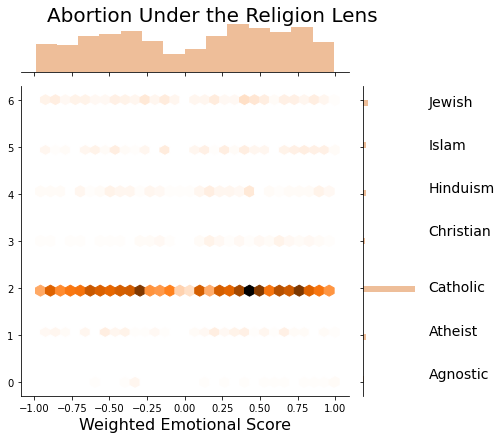

In [908]:
enc = LabelEncoder()
enc.fit( ab_at_rel['rel'])
rel_num= enc.transform( ab_at_rel[np.abs(ab_at_rel['compound scores'] ) >=0.05]['rel'])


g=sns.jointplot(ab_at_rel[np.abs(ab_at_rel['compound scores'] ) >=0.05]['compound scores'], rel_num, kind="hex", color = 'C2', alpha = 1)
g.ax_joint.set_xlabel('Weighted Emotional Score', fontsize=16) 
 
g.fig.text( 1, 0.78,'Jewish', fontsize=14)
g.fig.text( 1, 0.68,'Islam', fontsize=14)
g.fig.text( 1, 0.58,'Hinduism', fontsize=14)
g.fig.text( 1, 0.48,'Christian', fontsize=14)
g.fig.text( 1, 0.35,'Catholic', fontsize=14)
g.fig.text( 1, 0.25,'Atheist', fontsize=14)
g.fig.text( 1, 0.15,'Agnostic', fontsize=14)
g.fig.tight_layout()
g.fig.suptitle('Abortion Under the Religion Lens', y = 1.01,fontsize = 20)

g.savefig('Figures/ab_rel.jpeg', dpi = 200)
g.savefig('Figures/ab_rel.pdf')
              

### Under the nationality lens

Text(0.5, 1.01, 'Global Warming Under the Nationality Lens')

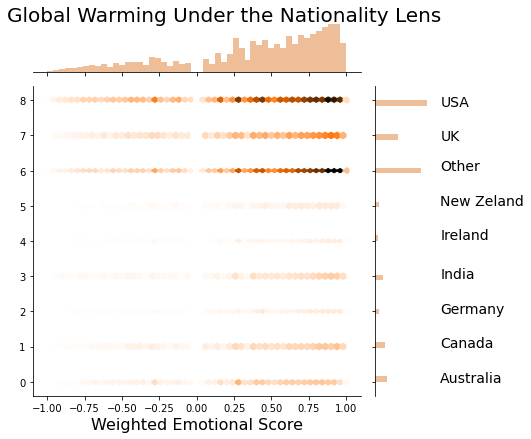

In [909]:
enc = LabelEncoder()
enc.fit( gw_at_nat['nation'])
nat_num= enc.transform( gw_at_nat[ (np.abs(gw_at_nat['compound scores'] ) >=0.05)]['nation'])


g=sns.jointplot(gw_at_nat[np.abs(gw_at_nat['compound scores'] ) >=0.05]['compound scores'], nat_num, kind="hex", color = 'C2', alpha = 1)
g.ax_joint.set_xlabel('Weighted Emotional Score', fontsize=16)                       
          
g.fig.text( 1, 0.78,'USA', fontsize=14)
g.fig.text( 1, 0.7,'UK', fontsize=14)
g.fig.text( 1, 0.63,'Other', fontsize=14)
g.fig.text( 1, 0.55,'New Zeland', fontsize=14)
g.fig.text( 1, 0.47,'Ireland', fontsize=14)
g.fig.text( 1, 0.38,'India', fontsize=14)
g.fig.text( 1, 0.3,'Germany', fontsize=14)
g.fig.text( 1, 0.22,'Canada', fontsize=14)
g.fig.text( 1, 0.14,'Australia', fontsize=14)   
    
g.fig.tight_layout()
g.fig.suptitle('Global Warming Under the Nationality Lens', y = 1.01,fontsize = 20)  

g.savefig('Figures/gw_nat.jpeg', dpi = 200)
g.savefig('Figures/gw_nat.pdf')

Text(0.5, 1.01, 'Gun Control Under the Nationality Lens')

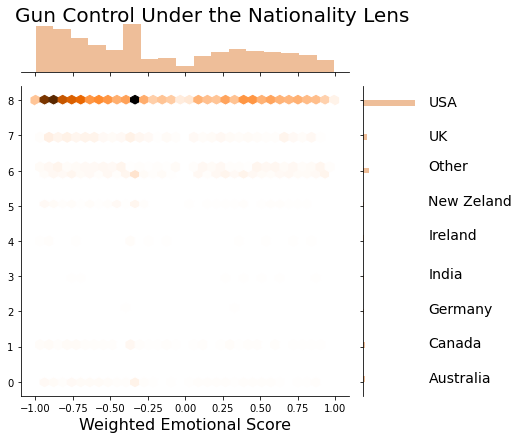

In [910]:
enc = LabelEncoder()
enc.fit( gc_at_nat['nation'])
nat_num= enc.transform( gc_at_nat[ (np.abs(gc_at_nat['compound scores'] ) >=0.05)]['nation'])


g=sns.jointplot(gc_at_nat[np.abs(gc_at_nat['compound scores'] ) >=0.05]['compound scores'], nat_num, kind="hex", color = 'C2', alpha = 1)
g.ax_joint.set_xlabel('Weighted Emotional Score', fontsize=16)                       
          
g.fig.text( 1, 0.78,'USA', fontsize=14)
g.fig.text( 1, 0.7,'UK', fontsize=14)
g.fig.text( 1, 0.63,'Other', fontsize=14)
g.fig.text( 1, 0.55,'New Zeland', fontsize=14)
g.fig.text( 1, 0.47,'Ireland', fontsize=14)
g.fig.text( 1, 0.38,'India', fontsize=14)
g.fig.text( 1, 0.3,'Germany', fontsize=14)
g.fig.text( 1, 0.22,'Canada', fontsize=14)
g.fig.text( 1, 0.14,'Australia', fontsize=14)   
    
g.fig.tight_layout()
g.fig.suptitle('Gun Control Under the Nationality Lens', y = 1.01,fontsize = 20)  

g.savefig('gc_nat.jpeg', dpi = 200)
g.savefig('gc_nat.pdf')

Text(0.5, 1.01, 'Gender Inequality Under the Nationality Lens')

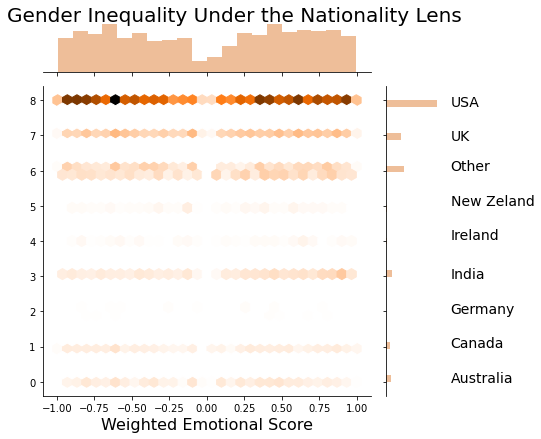

In [911]:
enc = LabelEncoder()
enc.fit( gi_at_nat['nation'])
nat_num= enc.transform( gi_at_nat[ (np.abs(gi_at_nat['compound scores'] ) >=0.05)]['nation'])


g=sns.jointplot(gi_at_nat[np.abs(gi_at_nat['compound scores'] ) >=0.05]['compound scores'], nat_num, kind="hex", color = 'C2', alpha = 1)
g.ax_joint.set_xlabel('Weighted Emotional Score', fontsize=16)                       
          
g.fig.text( 1, 0.78,'USA', fontsize=14)
g.fig.text( 1, 0.7,'UK', fontsize=14)
g.fig.text( 1, 0.63,'Other', fontsize=14)
g.fig.text( 1, 0.55,'New Zeland', fontsize=14)
g.fig.text( 1, 0.47,'Ireland', fontsize=14)
g.fig.text( 1, 0.38,'India', fontsize=14)
g.fig.text( 1, 0.3,'Germany', fontsize=14)
g.fig.text( 1, 0.22,'Canada', fontsize=14)
g.fig.text( 1, 0.14,'Australia', fontsize=14)   
    
g.fig.tight_layout()
g.fig.suptitle('Gender Inequality Under the Nationality Lens', y = 1.01,fontsize = 20)     

g.savefig('gi_nat.jpeg', dpi = 200)
g.savefig('gi_nat.pdf')


Text(0.5, 1.01, 'Abortion Under the Nationality Lens')

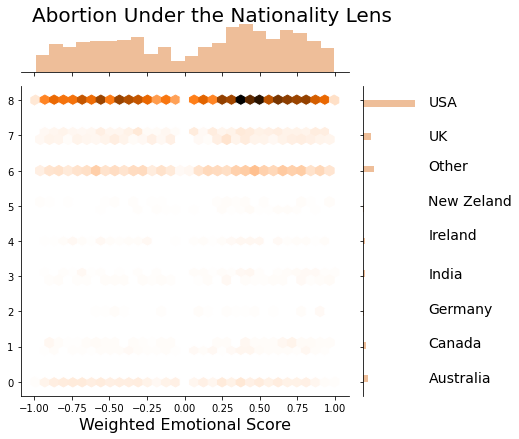

In [912]:
enc = LabelEncoder()
enc.fit( ab_at_nat['nation'])
nat_num= enc.transform( ab_at_nat[ (np.abs(ab_at_nat['compound scores'] ) >=0.05)]['nation'])


g=sns.jointplot(ab_at_nat[np.abs(ab_at_nat['compound scores'] ) >=0.05]['compound scores'], nat_num, kind="hex", color = 'C2', alpha = 1)
g.ax_joint.set_xlabel('Weighted Emotional Score', fontsize=16)                       
          
g.fig.text( 1, 0.78,'USA', fontsize=14)
g.fig.text( 1, 0.7,'UK', fontsize=14)
g.fig.text( 1, 0.63,'Other', fontsize=14)
g.fig.text( 1, 0.55,'New Zeland', fontsize=14)
g.fig.text( 1, 0.47,'Ireland', fontsize=14)
g.fig.text( 1, 0.38,'India', fontsize=14)
g.fig.text( 1, 0.3,'Germany', fontsize=14)
g.fig.text( 1, 0.22,'Canada', fontsize=14)
g.fig.text( 1, 0.14,'Australia', fontsize=14)   
    
g.fig.tight_layout()
g.fig.suptitle('Abortion Under the Nationality Lens', y = 1.01,fontsize = 20)  

g.savefig('ab_nat.jpeg', dpi = 200)
g.savefig('ab_nat.pdf')

### Year of birth

##### Global warming

In [914]:
gw_at_birth=gw_at.copy()
gw_at_birth['birth_year']=pd.cut(gw_at_birth['year_of_birth'], [1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990,2000], labels=['1910-s','1920-s','1930-s','1940-s','1950-s','1960-s','1970-s','1980-s','1990-s'])
gw_at_birth=gw_at_birth.dropna(subset=['birth_year']).copy()

KeyError: 'year_of_birth'

In [913]:
enc = LabelEncoder()
enc.fit(gw_at_birth['birth_year'])
degrees_num=  enc.transform(gw_at_birth[np.abs(gw_at_birth['compound scores'] ) >=0.05]['birth_year']) #enc.transform(

sns.jointplot(gw_at_birth[np.abs(gw_at_birth['compound scores'] ) >=0.05]['compound scores'], degrees_num, kind="hex", color = 'C2', alpha = 1)
None

NameError: name 'gw_at_birth' is not defined

##### Abortion

In [281]:
ab_at_birth=ab_at.copy()
ab_at_birth['birth_year']=pd.cut(ab_at_birth['year_of_birth'], [1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990,2000], labels=['1910-s','1920-s','1930-s','1940-s','1950-s','1960-s','1970-s','1980-s','1990-s'])
ab_at_birth=ab_at_birth.dropna(subset=['birth_year']).copy()

C:\ProgramData\Anaconda3\envs\ada\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


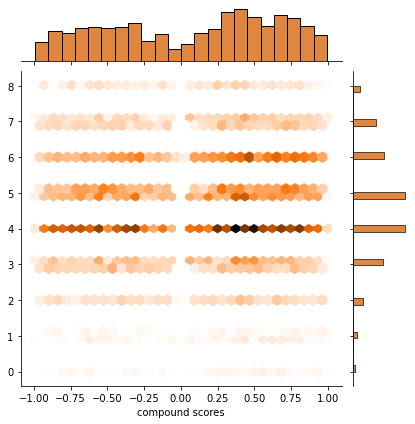

In [282]:
enc = LabelEncoder()
enc.fit(ab_at_birth['birth_year'])
degrees_num=  enc.transform(ab_at_birth[np.abs(ab_at_birth['compound scores'] ) >=0.05]['birth_year']) #enc.transform(

p = sns.jointplot(ab_at_birth[np.abs(ab_at_birth['compound scores'] ) >=0.05]['compound scores'], degrees_num, kind="hex", color = 'C2', alpha = 1) 
None

##### Gun control

In [283]:
gc_at_birth=gc_at.copy()
gc_at_birth['birth_year']=pd.cut(gc_at_birth['year_of_birth'], [1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990,2000], labels=['1910-s','1920-s','1930-s','1940-s','1950-s','1960-s','1970-s','1980-s','1990-s'])
gc_at_birth=gc_at_birth.dropna(subset=['birth_year']).copy()

C:\ProgramData\Anaconda3\envs\ada\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


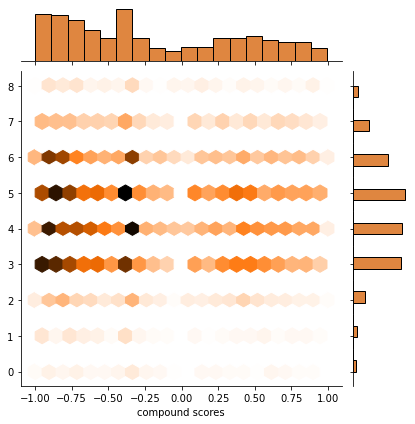

In [284]:
enc = LabelEncoder()
enc.fit(gc_at_birth['birth_year'])
degrees_num=  enc.transform(gc_at_birth[np.abs(gc_at_birth['compound scores'] ) >=0.05]['birth_year']) #enc.transform(

p = sns.jointplot(gc_at_birth[np.abs(gc_at_birth['compound scores'] ) >=0.05]['compound scores'], degrees_num, kind="hex", color = 'C2', alpha = 1) 
None

##### Gender inequality

In [285]:
gi_at_birth=gi_at.copy()
gi_at_birth['birth_year']=pd.cut(gi_at_birth['year_of_birth'], [1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990,2000], labels=['1910-s','1920-s','1930-s','1940-s','1950-s','1960-s','1970-s','1980-s','1990-s'])
gi_at_birth=gi_at_birth.dropna(subset=['birth_year']).copy()

C:\ProgramData\Anaconda3\envs\ada\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


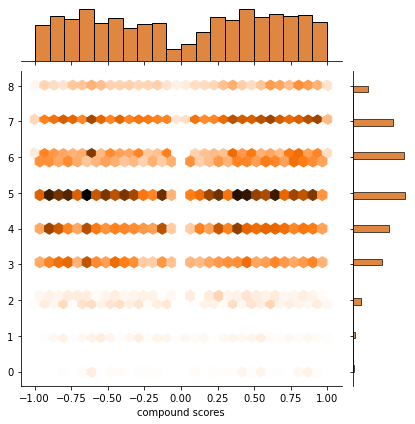

In [286]:
enc = LabelEncoder()
enc.fit(gi_at_birth['birth_year'])
degrees_num=  enc.transform(gi_at_birth[np.abs(gi_at_birth['compound scores'] ) >=0.05]['birth_year']) #enc.transform(

p = sns.jointplot(gi_at_birth[np.abs(gi_at_birth['compound scores'] ) >=0.05]['compound scores'], degrees_num, kind="hex", color = 'C2', alpha = 1) 
None